In [1]:
import tensorflow as tf
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import pickle
import cv2
import pandas as pd
from tqdm import tqdm
import datetime as dt
import statistics as stat
from joblib import load, dump
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(device_lib.list_local_devices())

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11843175566726751547
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4930941747
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5525930538579172613
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
with open('Models/model_fine_labels.json', 'r') as j_file:
    loaded_model_json = j_file.read()
model1 = tf.keras.models.model_from_json(loaded_model_json)
model1.load_weights("Models/model_fine_labels.h5")

In [4]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
gaussian_noise_9 (GaussianNo (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
gaussian_noise_10 (GaussianN (None, 26, 26, 64)       

In [5]:
def loadPreprocess():
    ### Load In Data
    (trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()
    trainY = tf.keras.utils.to_categorical(trainY)
    testY = tf.keras.utils.to_categorical(testY)
    return [trainX/255, trainY, testX/255, testY]


def returnClassIndex(trainY,class_index):
    labels = np.argmax(trainY, axis = 1)
    return [ i for i in range(len(labels)) if labels[i] == class_index]

trainX, trainY, testX, testY = loadPreprocess()
extractor  = tf.keras.Model(inputs = model1.input,
                         outputs = model1.get_layer(model1.layers[-3].name).output
                        )
model1.compile(optimizer = tf.keras.optimizers.Adam(), 
               loss = "categorical_crossentropy",  metrics= ['accuracy']
              )
### Predictions
#p = model1.predict(trainX,  verbose = 1)
print("Model Evaluation")
model1.evaluate(testX, testY, verbose =1)
print("Extracting Features")
f = extractor.predict(trainX, verbose =1)
ftest = extractor.predict(testX, verbose =1)

Model Evaluation
10000/10000 [==============================] - 4s 412us/sample - loss: 0.5875 - accuracy: 0.8282
Extracting Features
10000/10000 [==============================] - 2s 177us/sample


In [6]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters = 10, n_init = 50)
k.fit(f)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
dump(k, "shallow_models/kmean.joblib")

['shallow_models/kmean.joblib']

In [ ]:
from sklearn.metrics import accuracy_score
kpred = k.predict(ftest)
acc = accuracy_score(np.argmax(testY, axis = 1 ), kpred) 

In [67]:
%matplotlib inline
def plot_class_predictions(preds,idx):
    classes =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship',
               'truck']
    print("Class #{}".format(idx))
    c, f = np.unique(preds, return_counts = True)
    fig = plt.figure( figsize = (30,20))
    font = {'family' : 'sans',
            'weight' : 'bold',
            'size'   : 40}
    matplotlib.rc('font', **font)
    ax = fig.add_axes([0,0,1,1 ])
    ax.set_title("{} Predictions".format(classes[idx]))
    ax.set_xlabel("Clases")
    ax.set_ylabel("Frequecy Of Predictions")
    ax.set_xticks(c)
    ax.bar(c,f)

Class #0


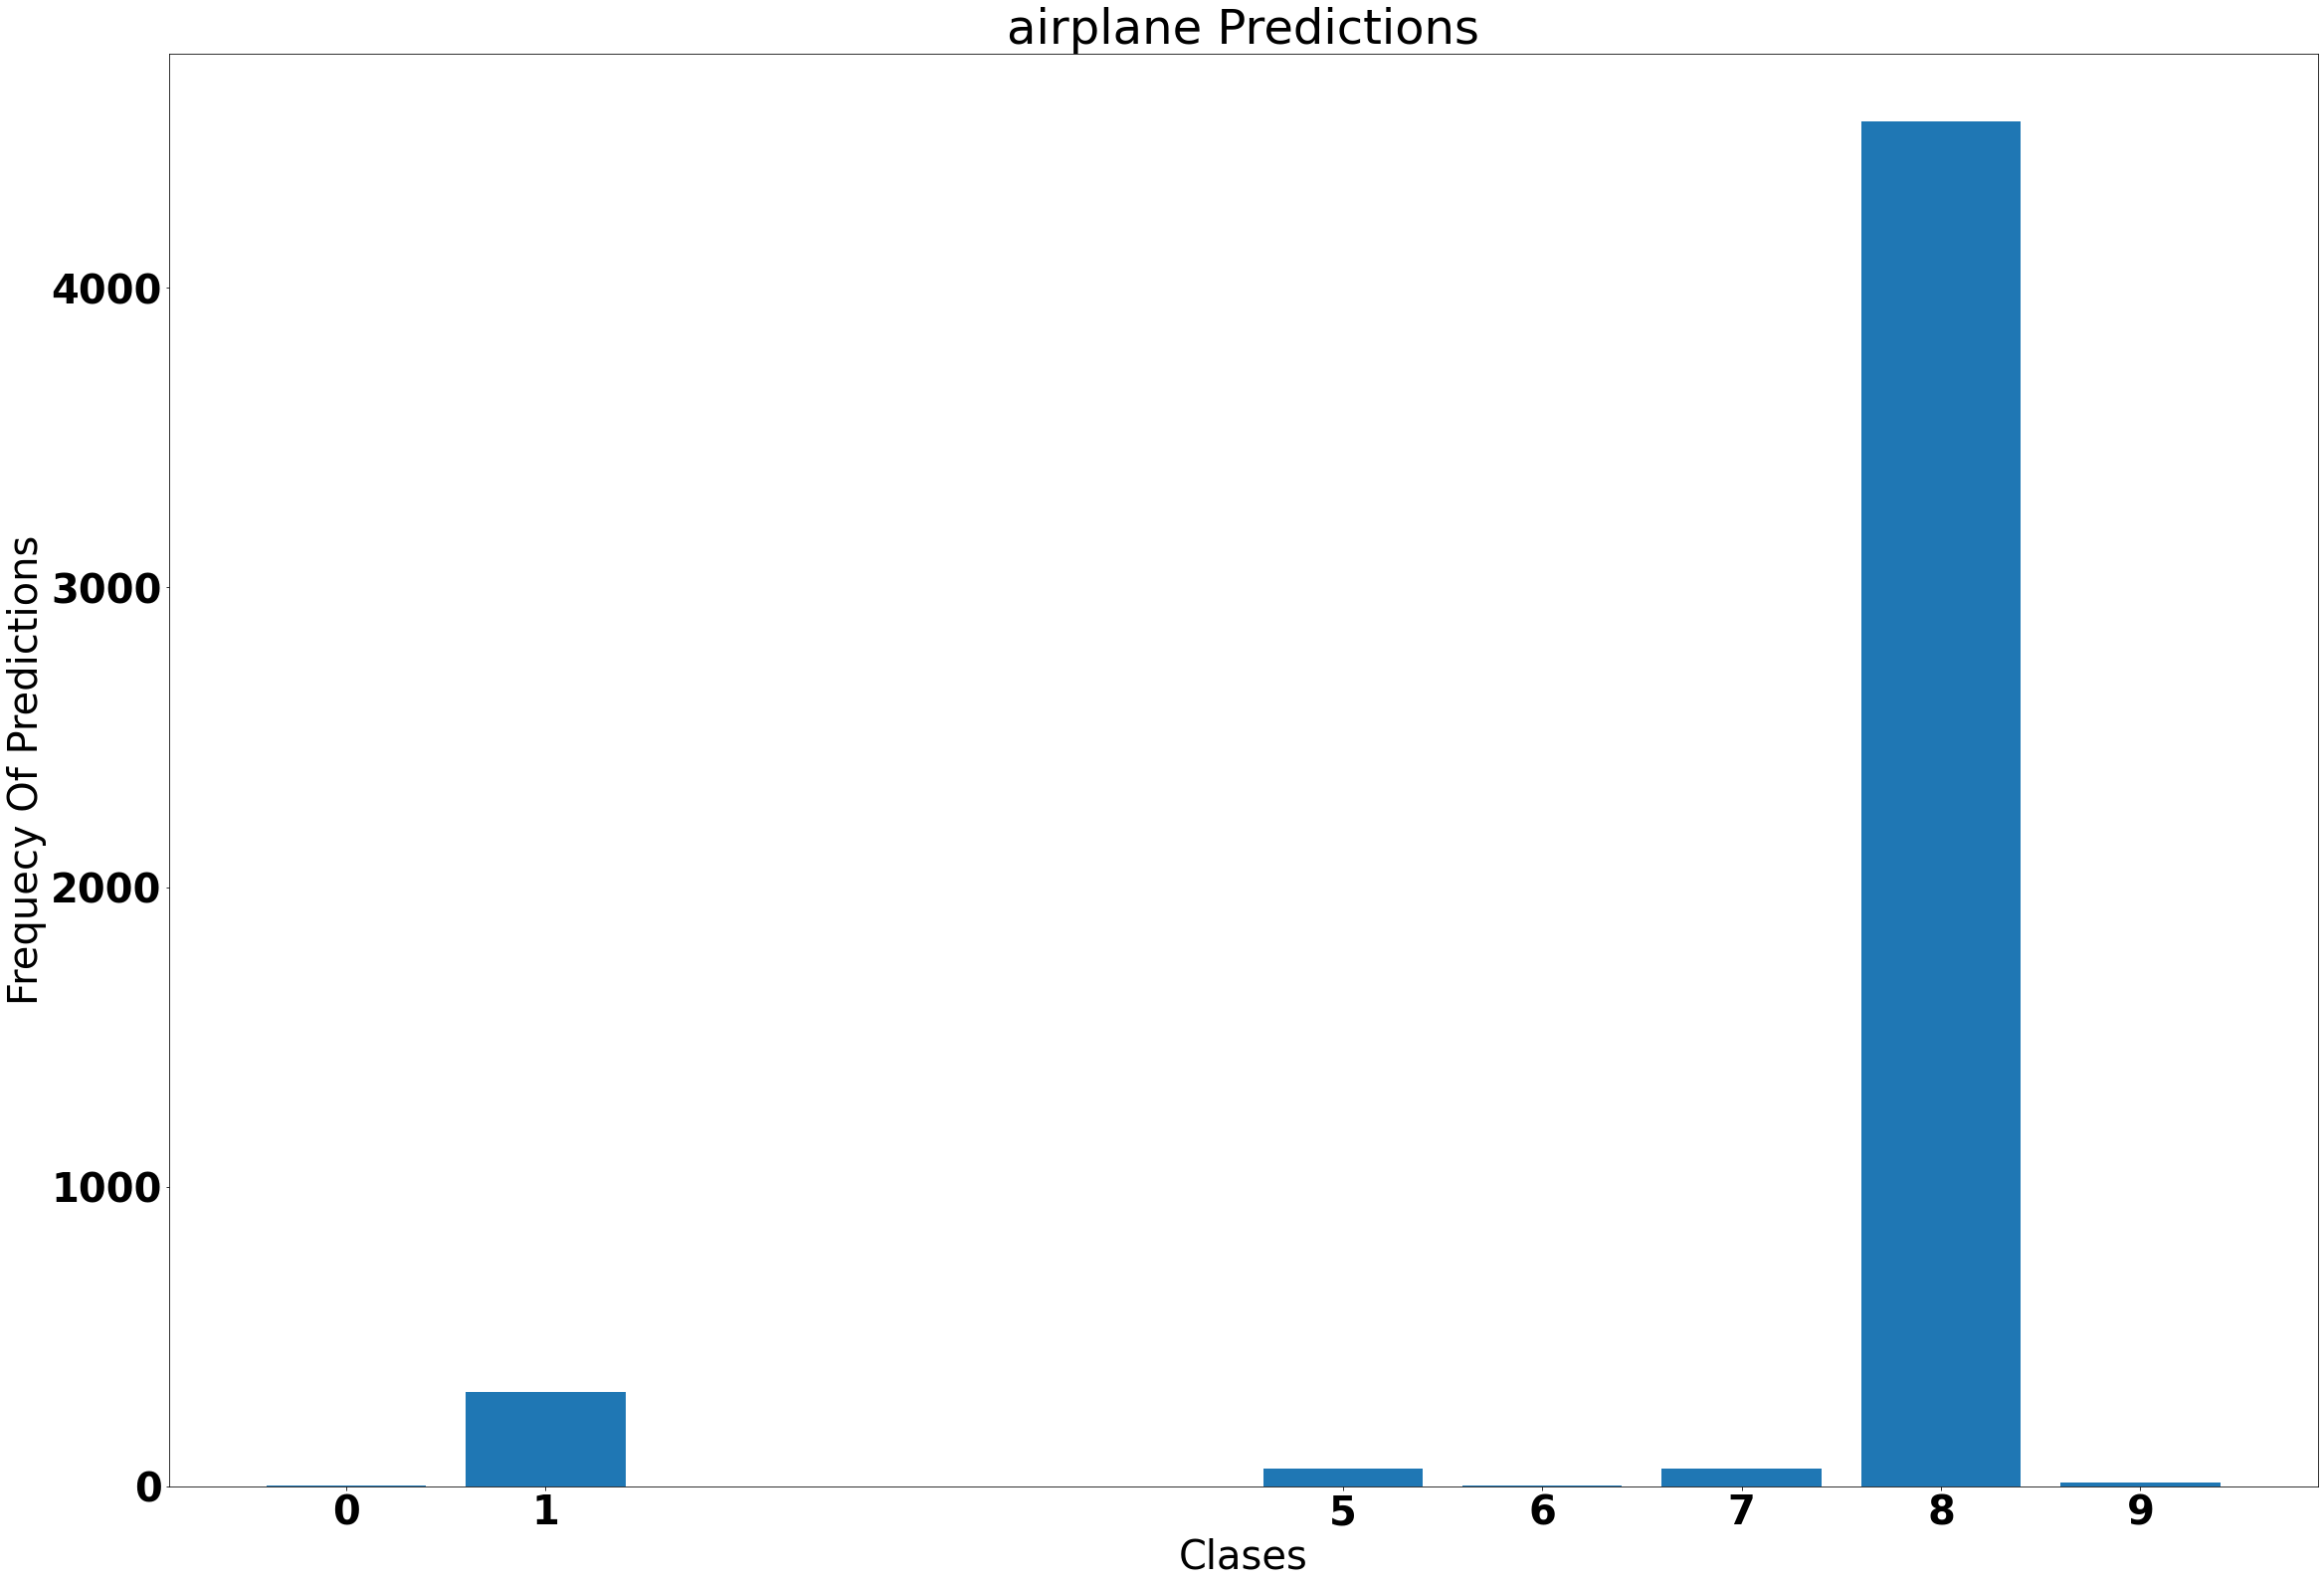

In [68]:
idx = 0
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #1


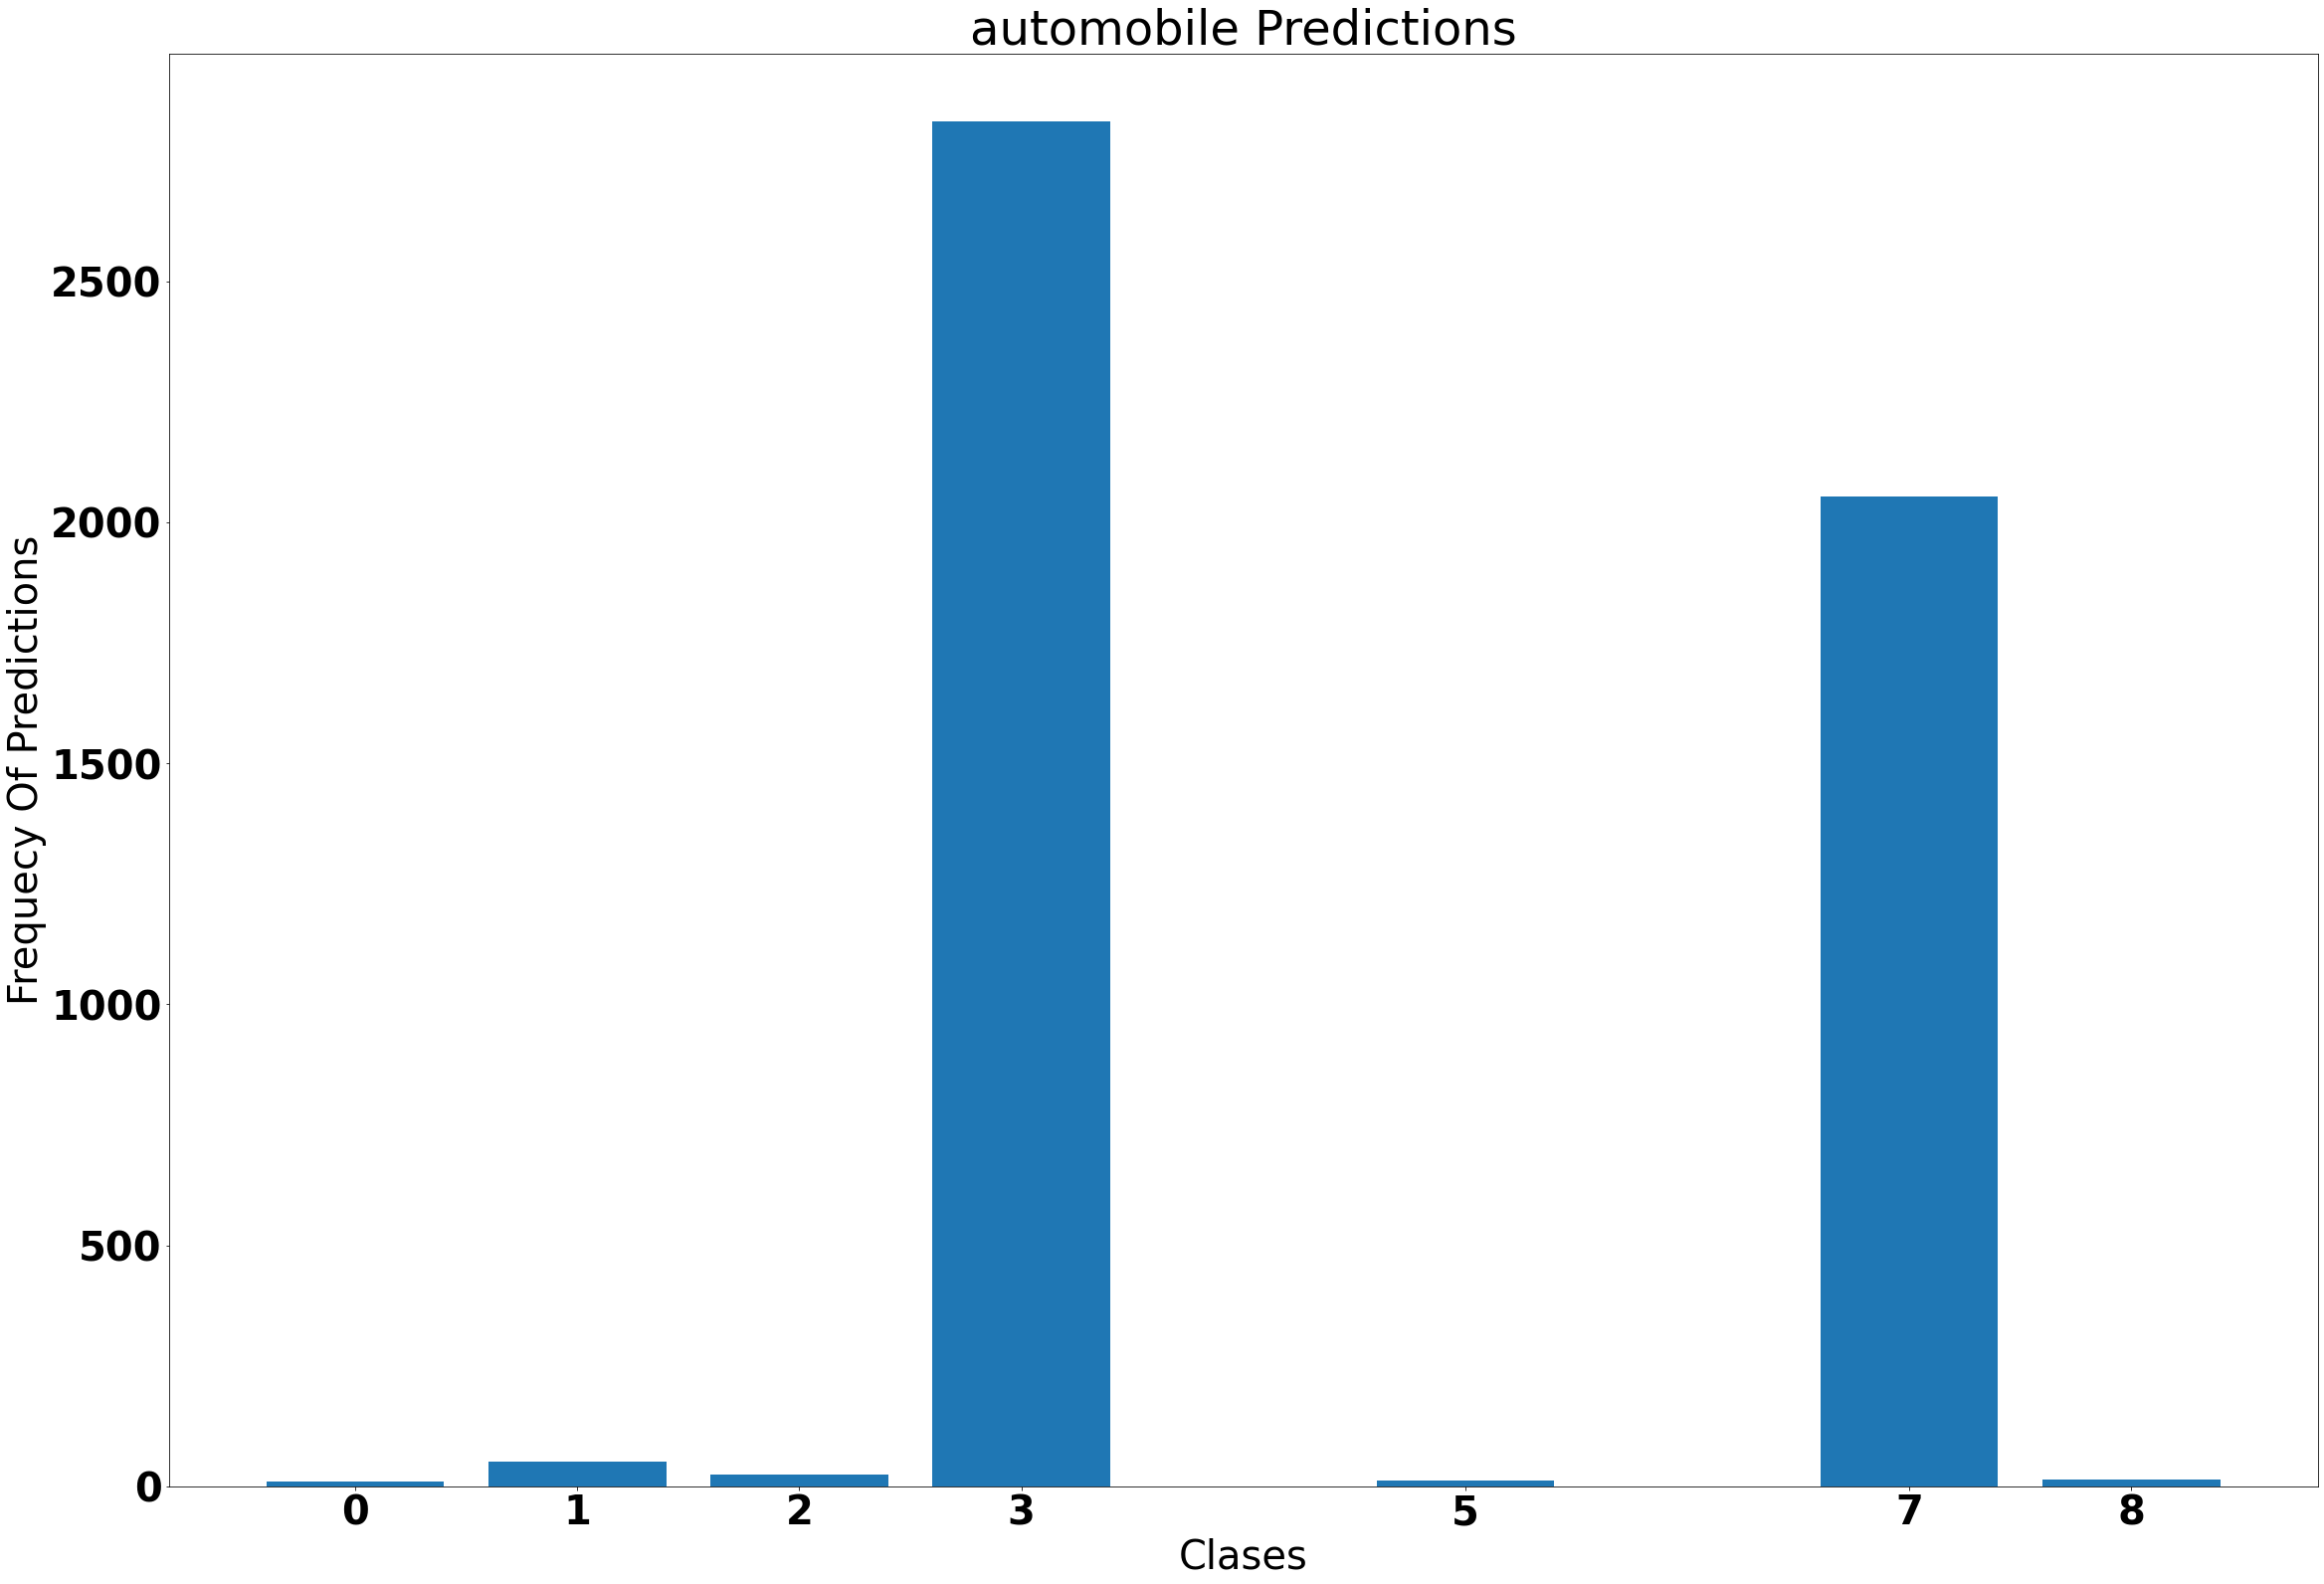

In [69]:
idx = 1
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #2


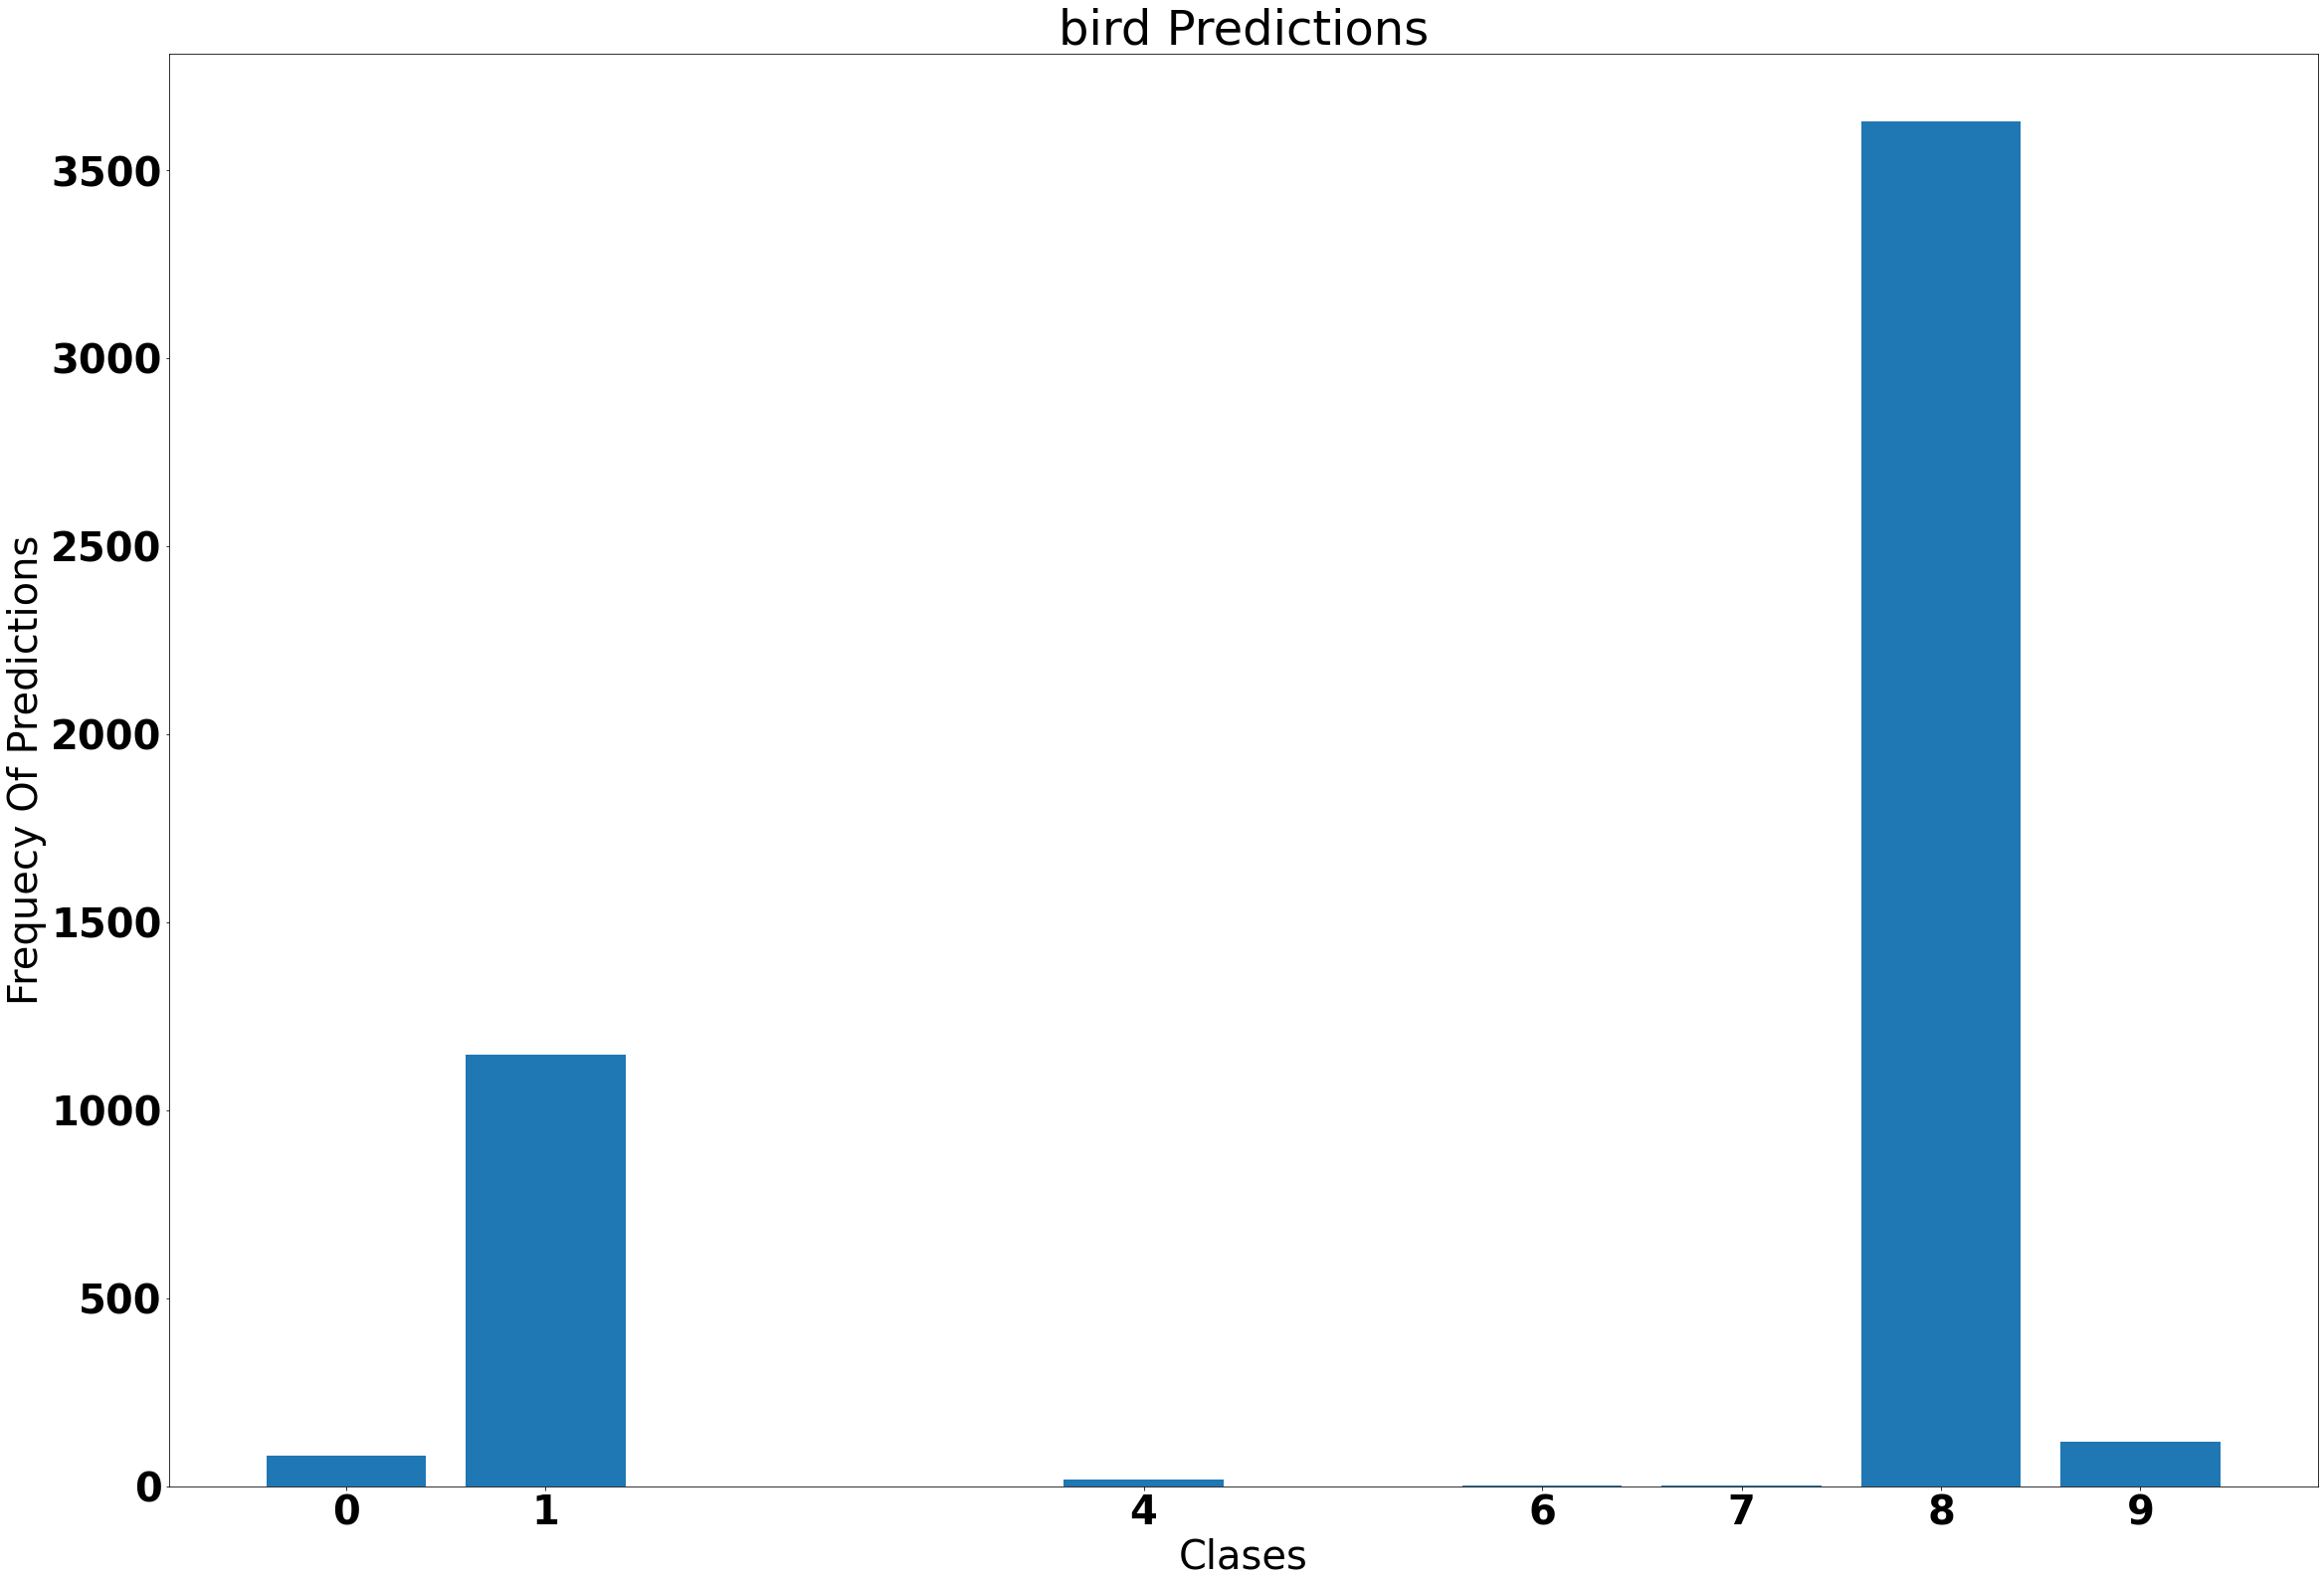

In [70]:
idx = 2
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #3


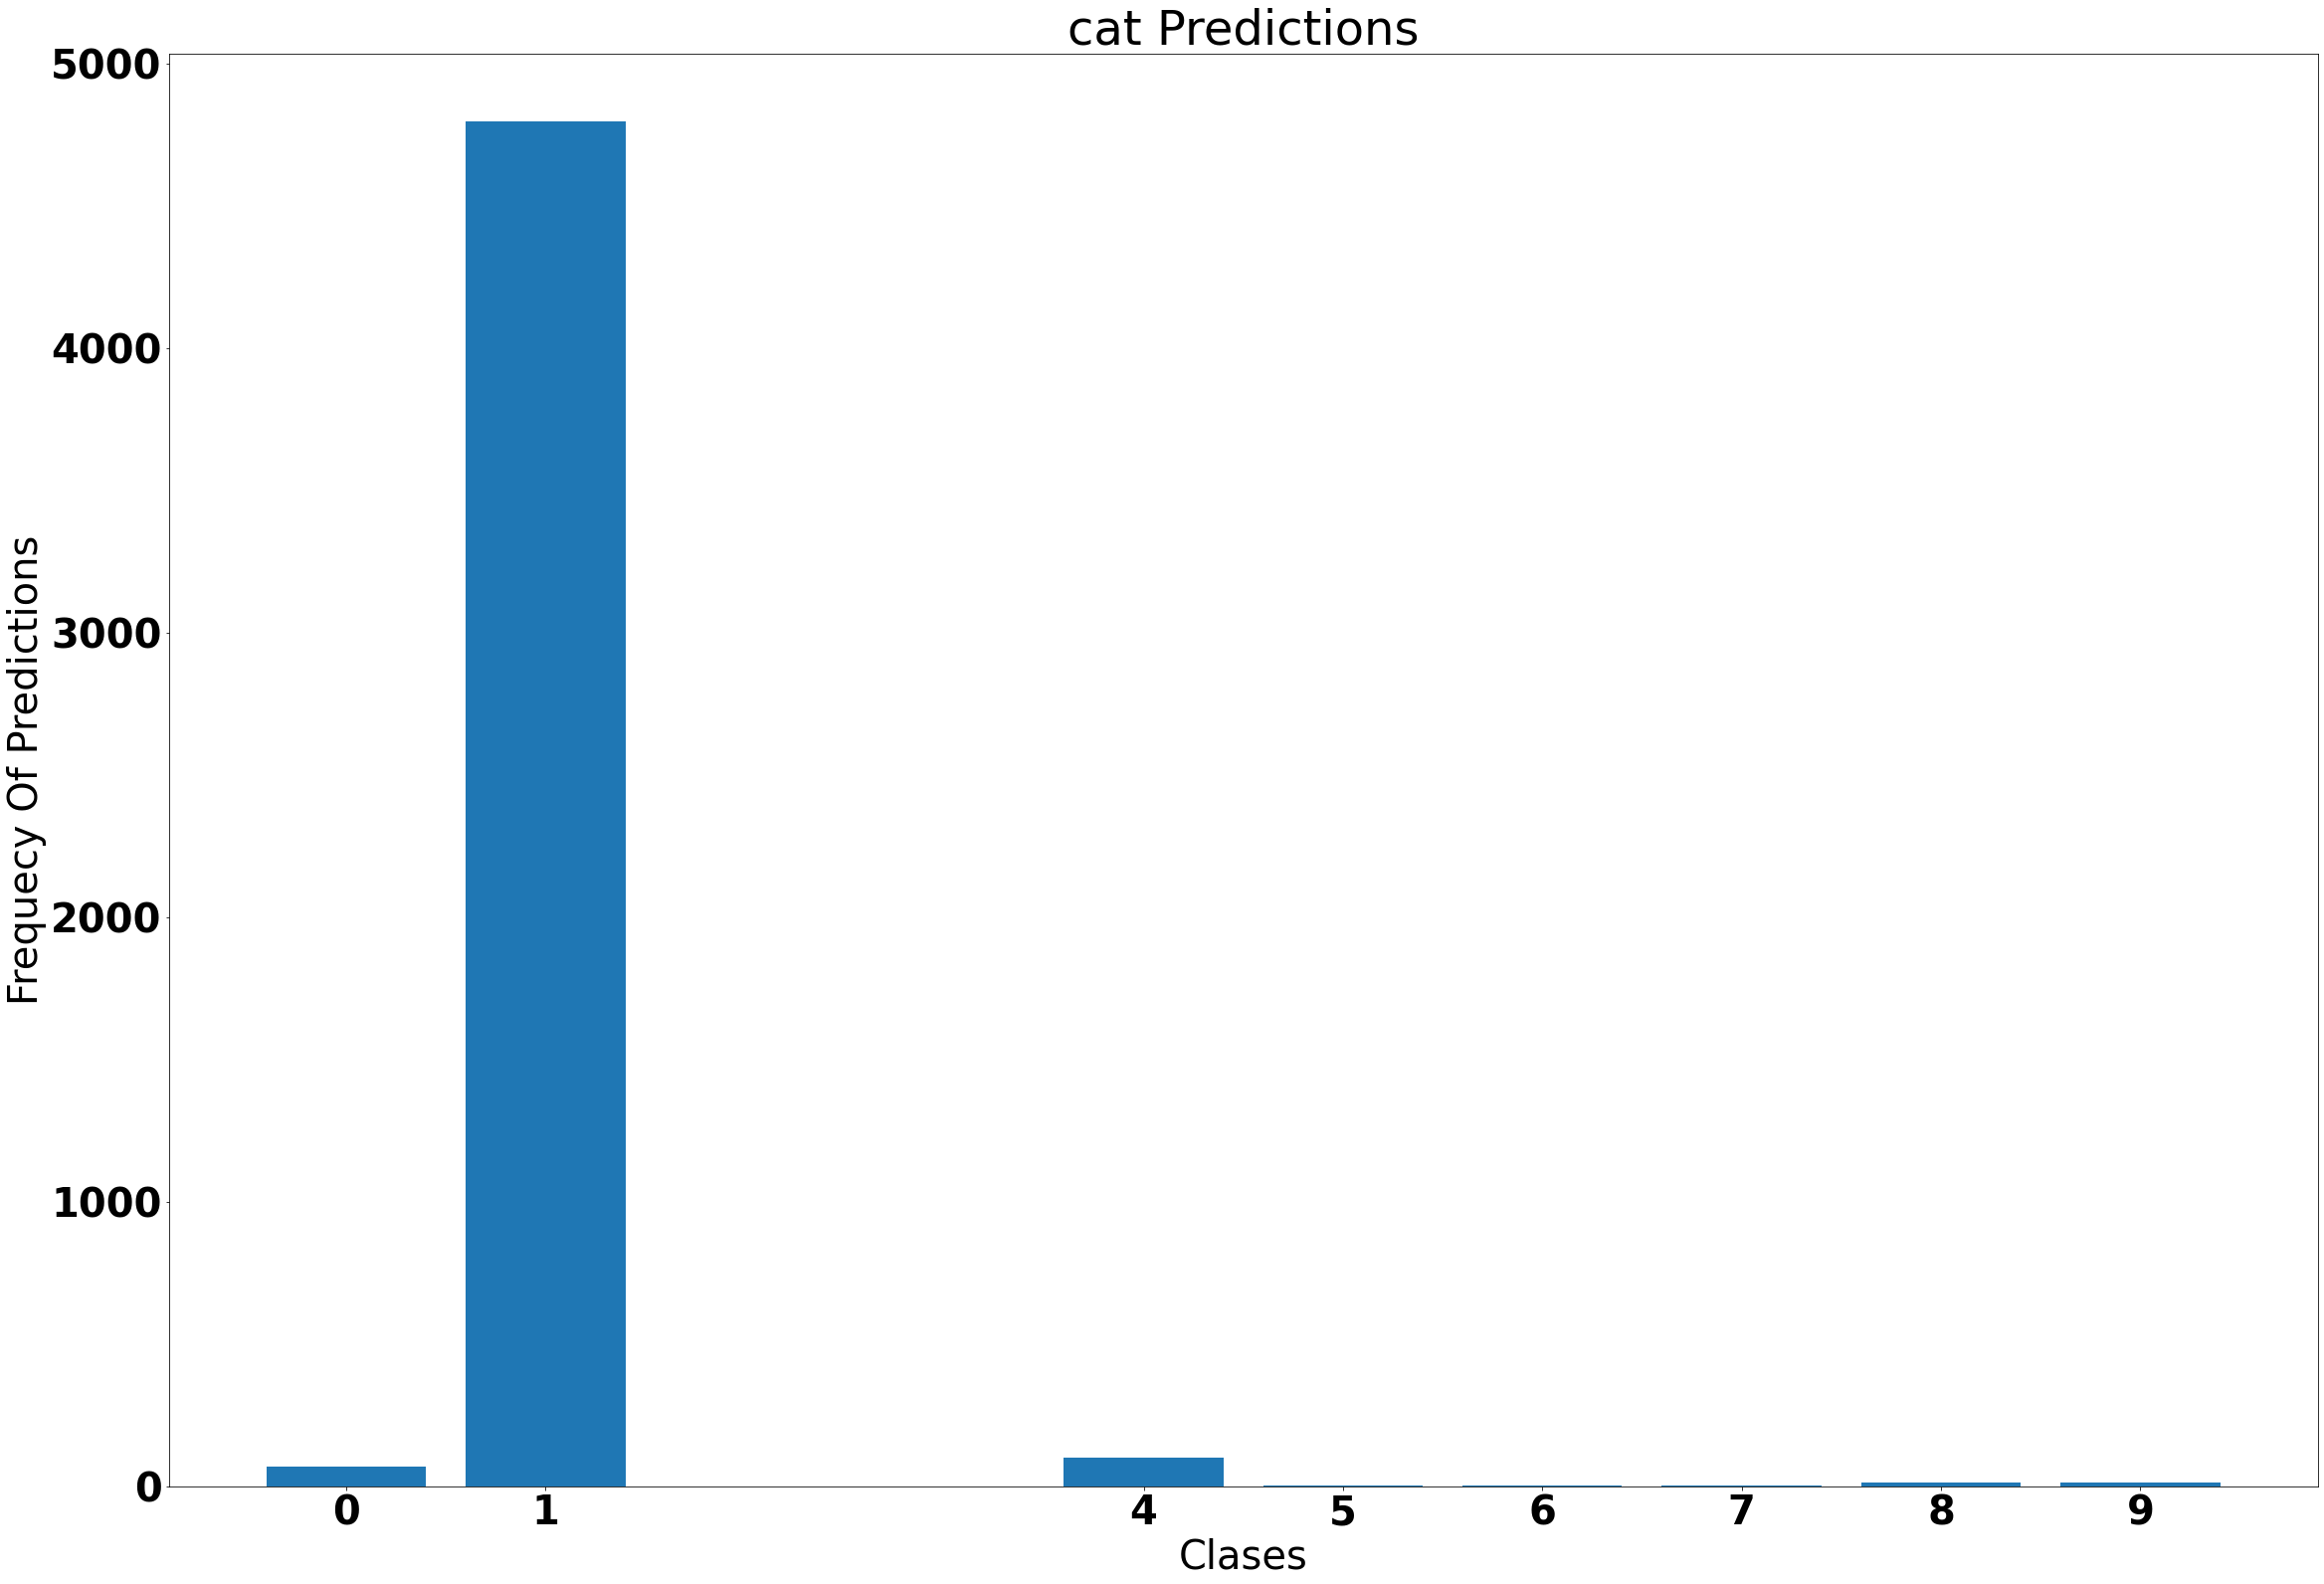

In [71]:
idx = 3
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #4


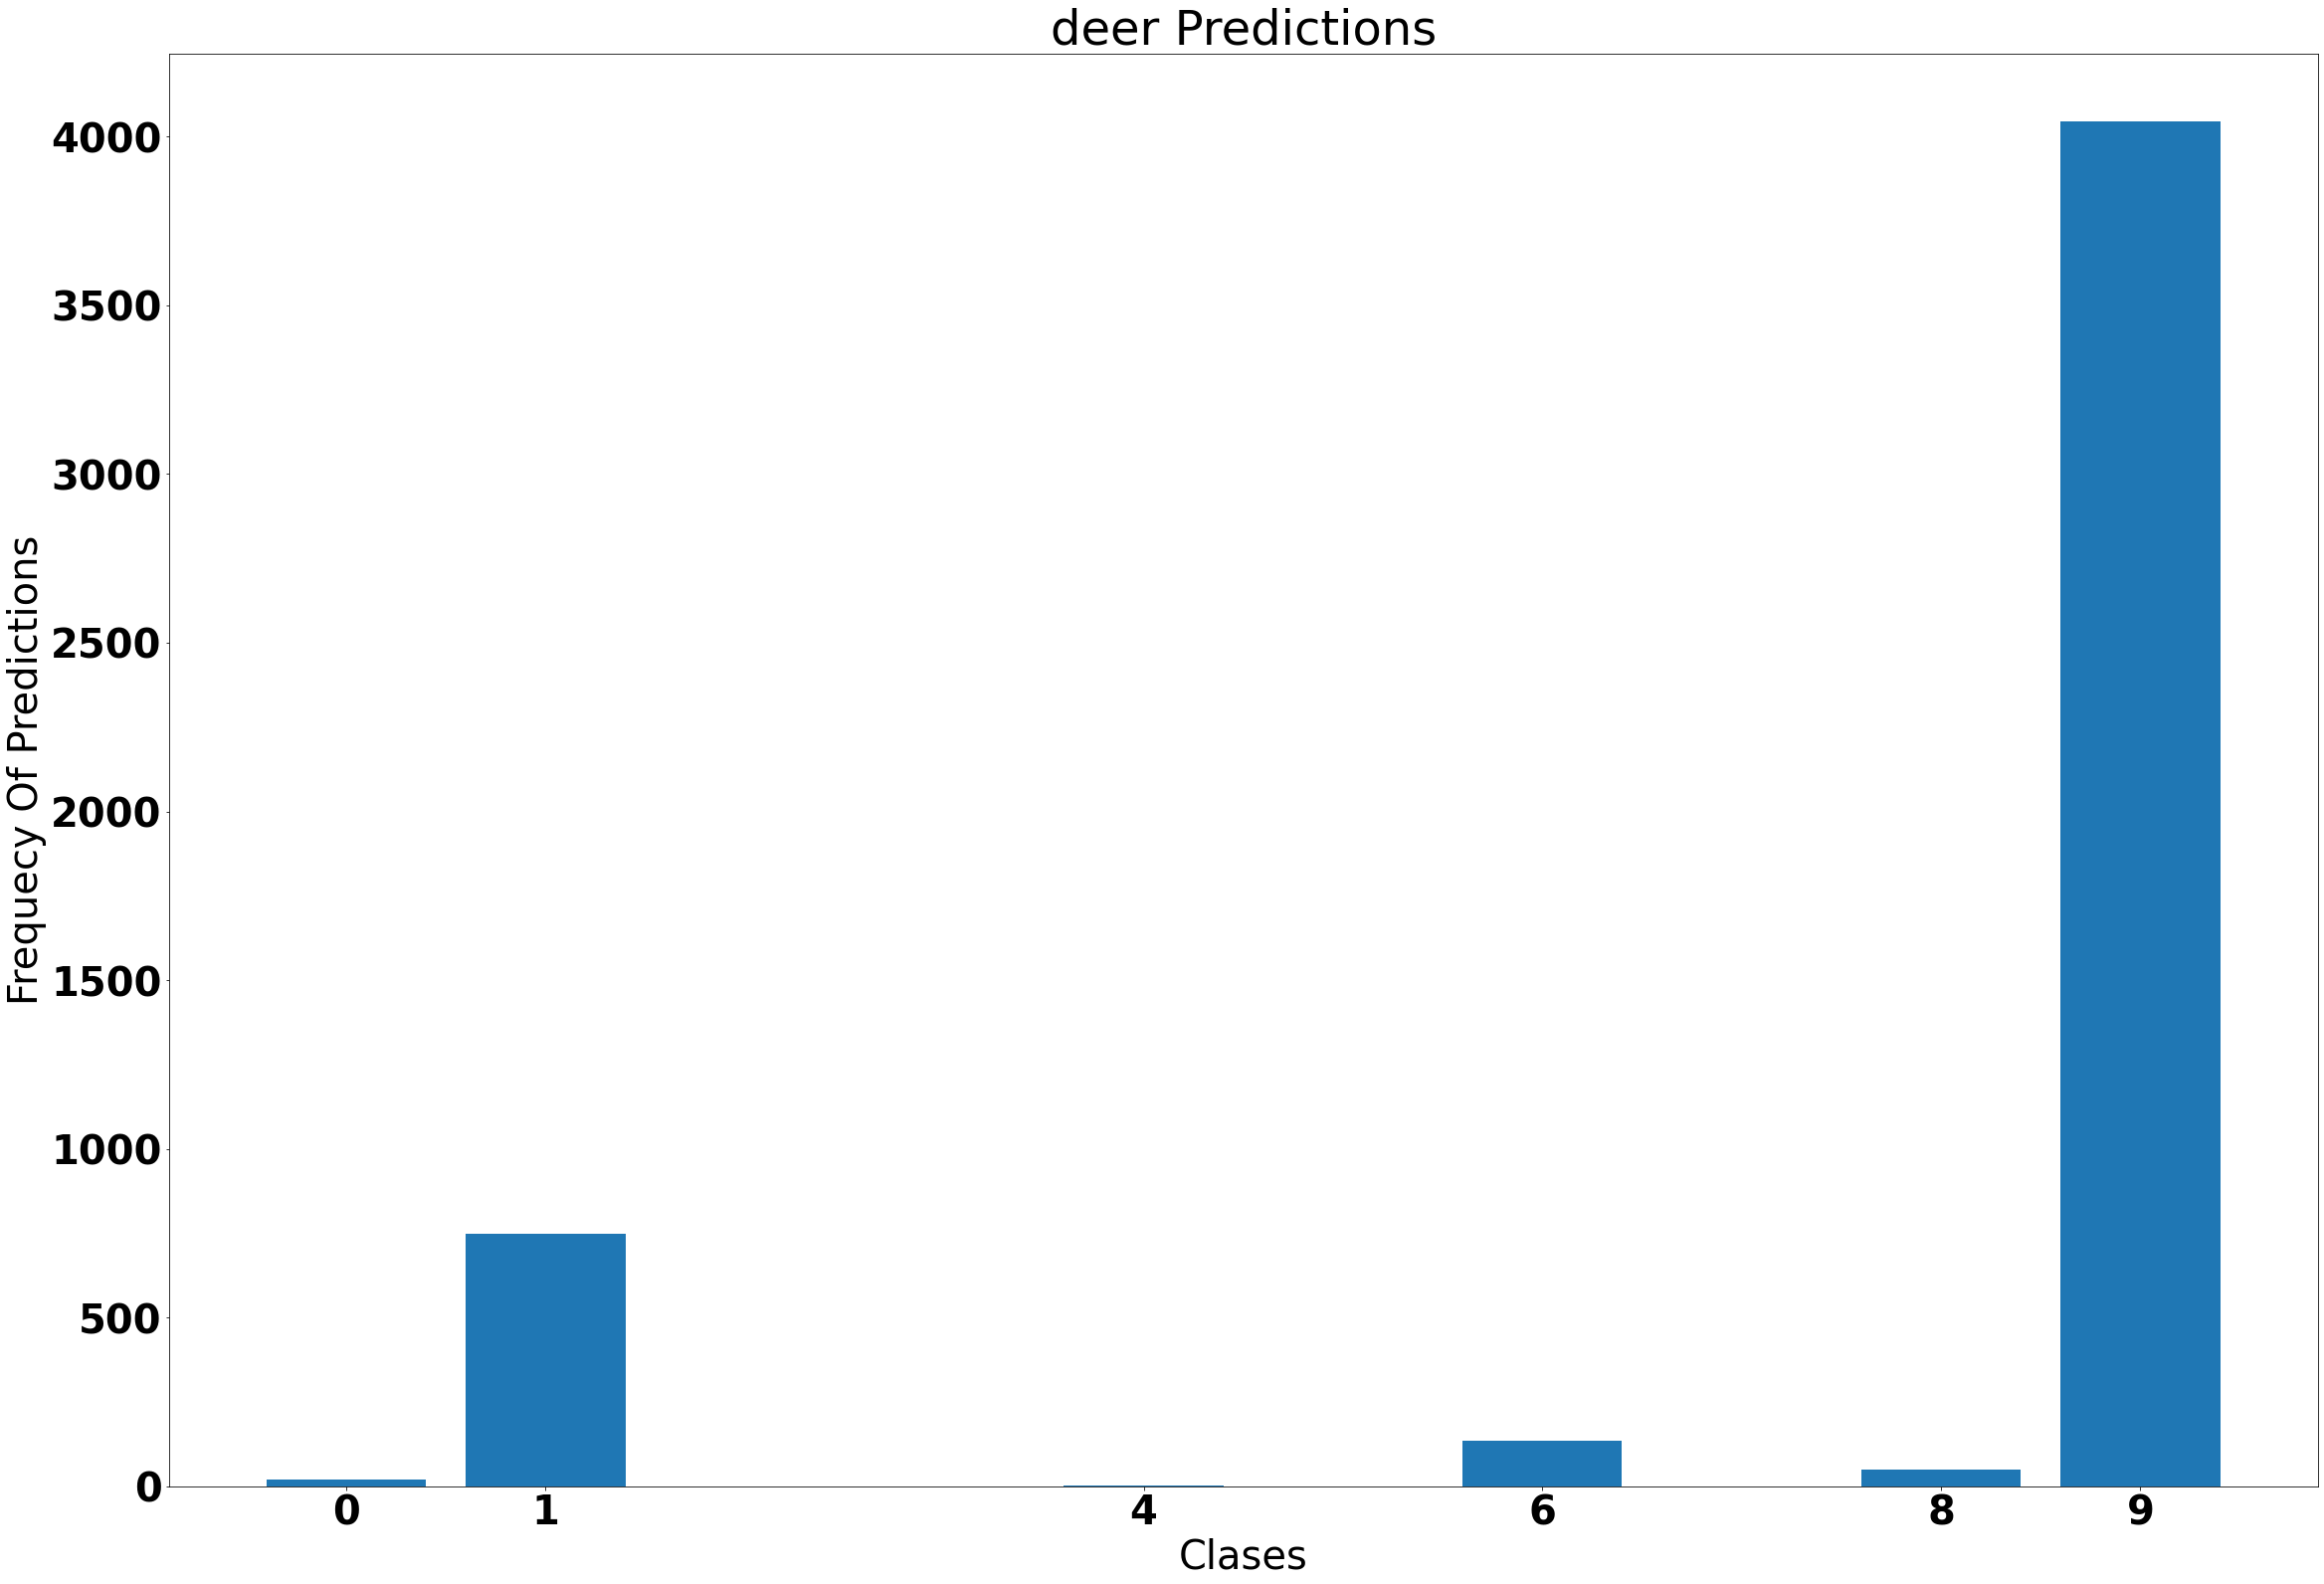

In [72]:
idx = 4
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #5


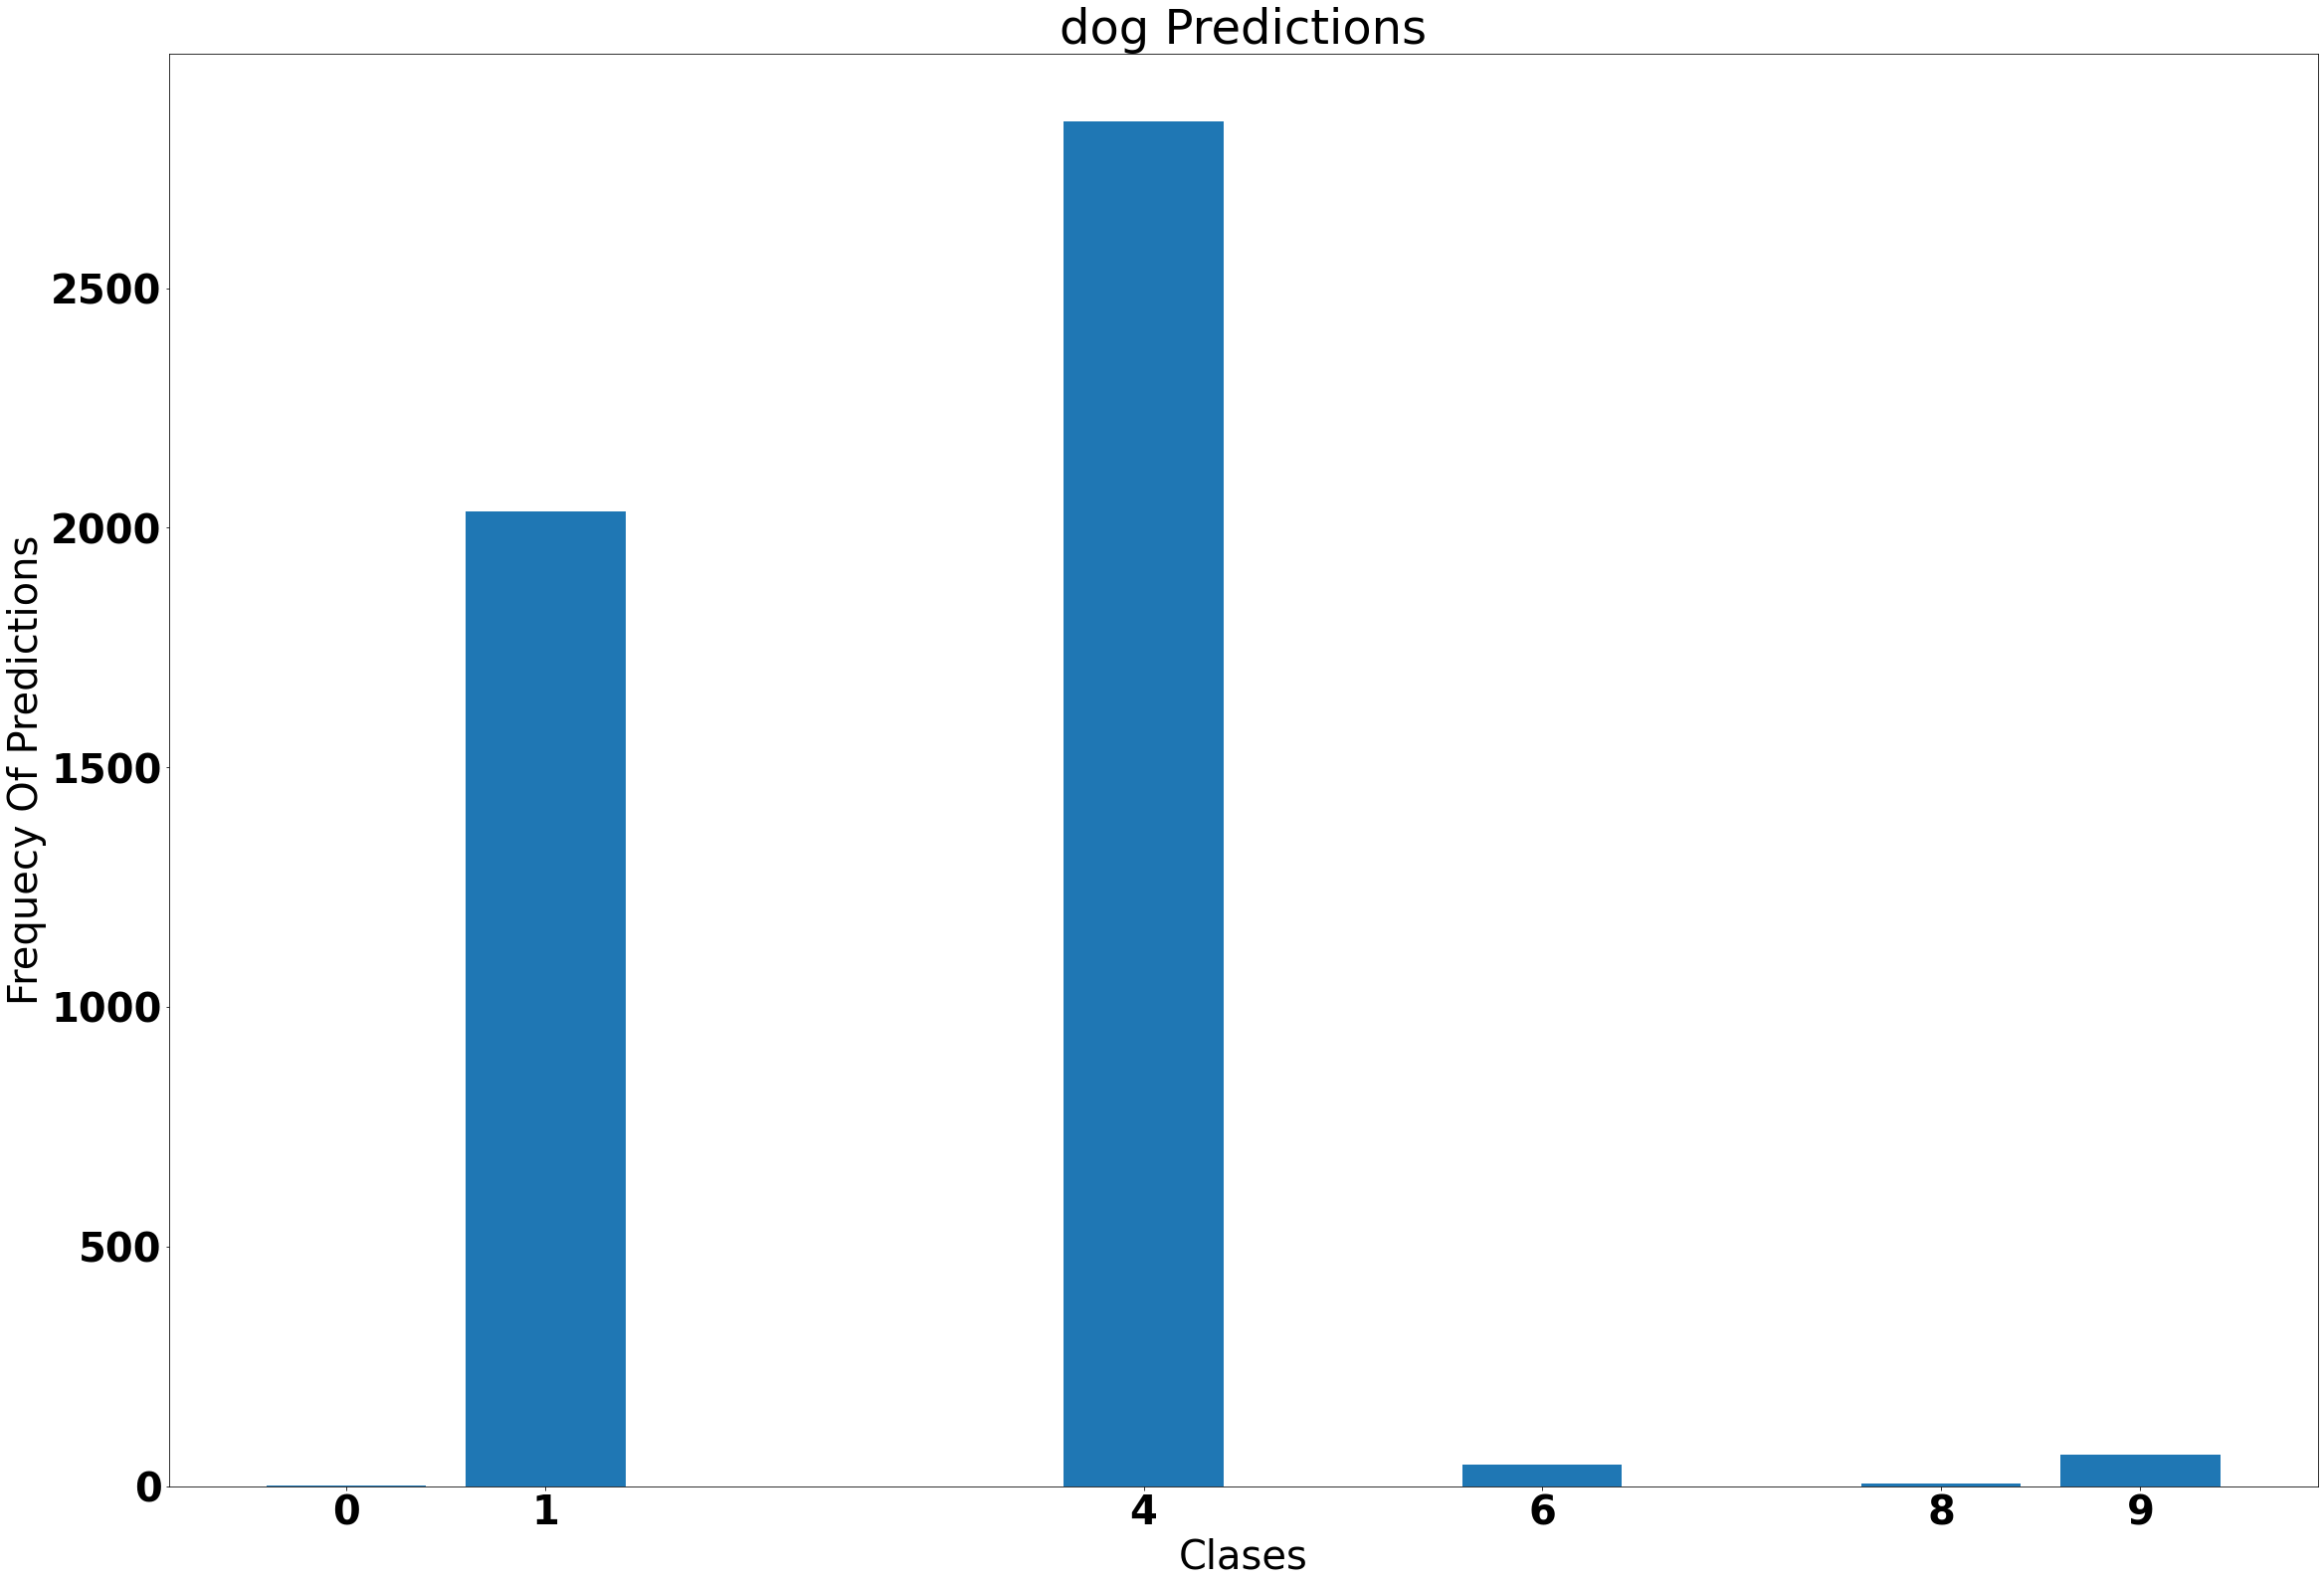

In [73]:
idx = 5
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #6


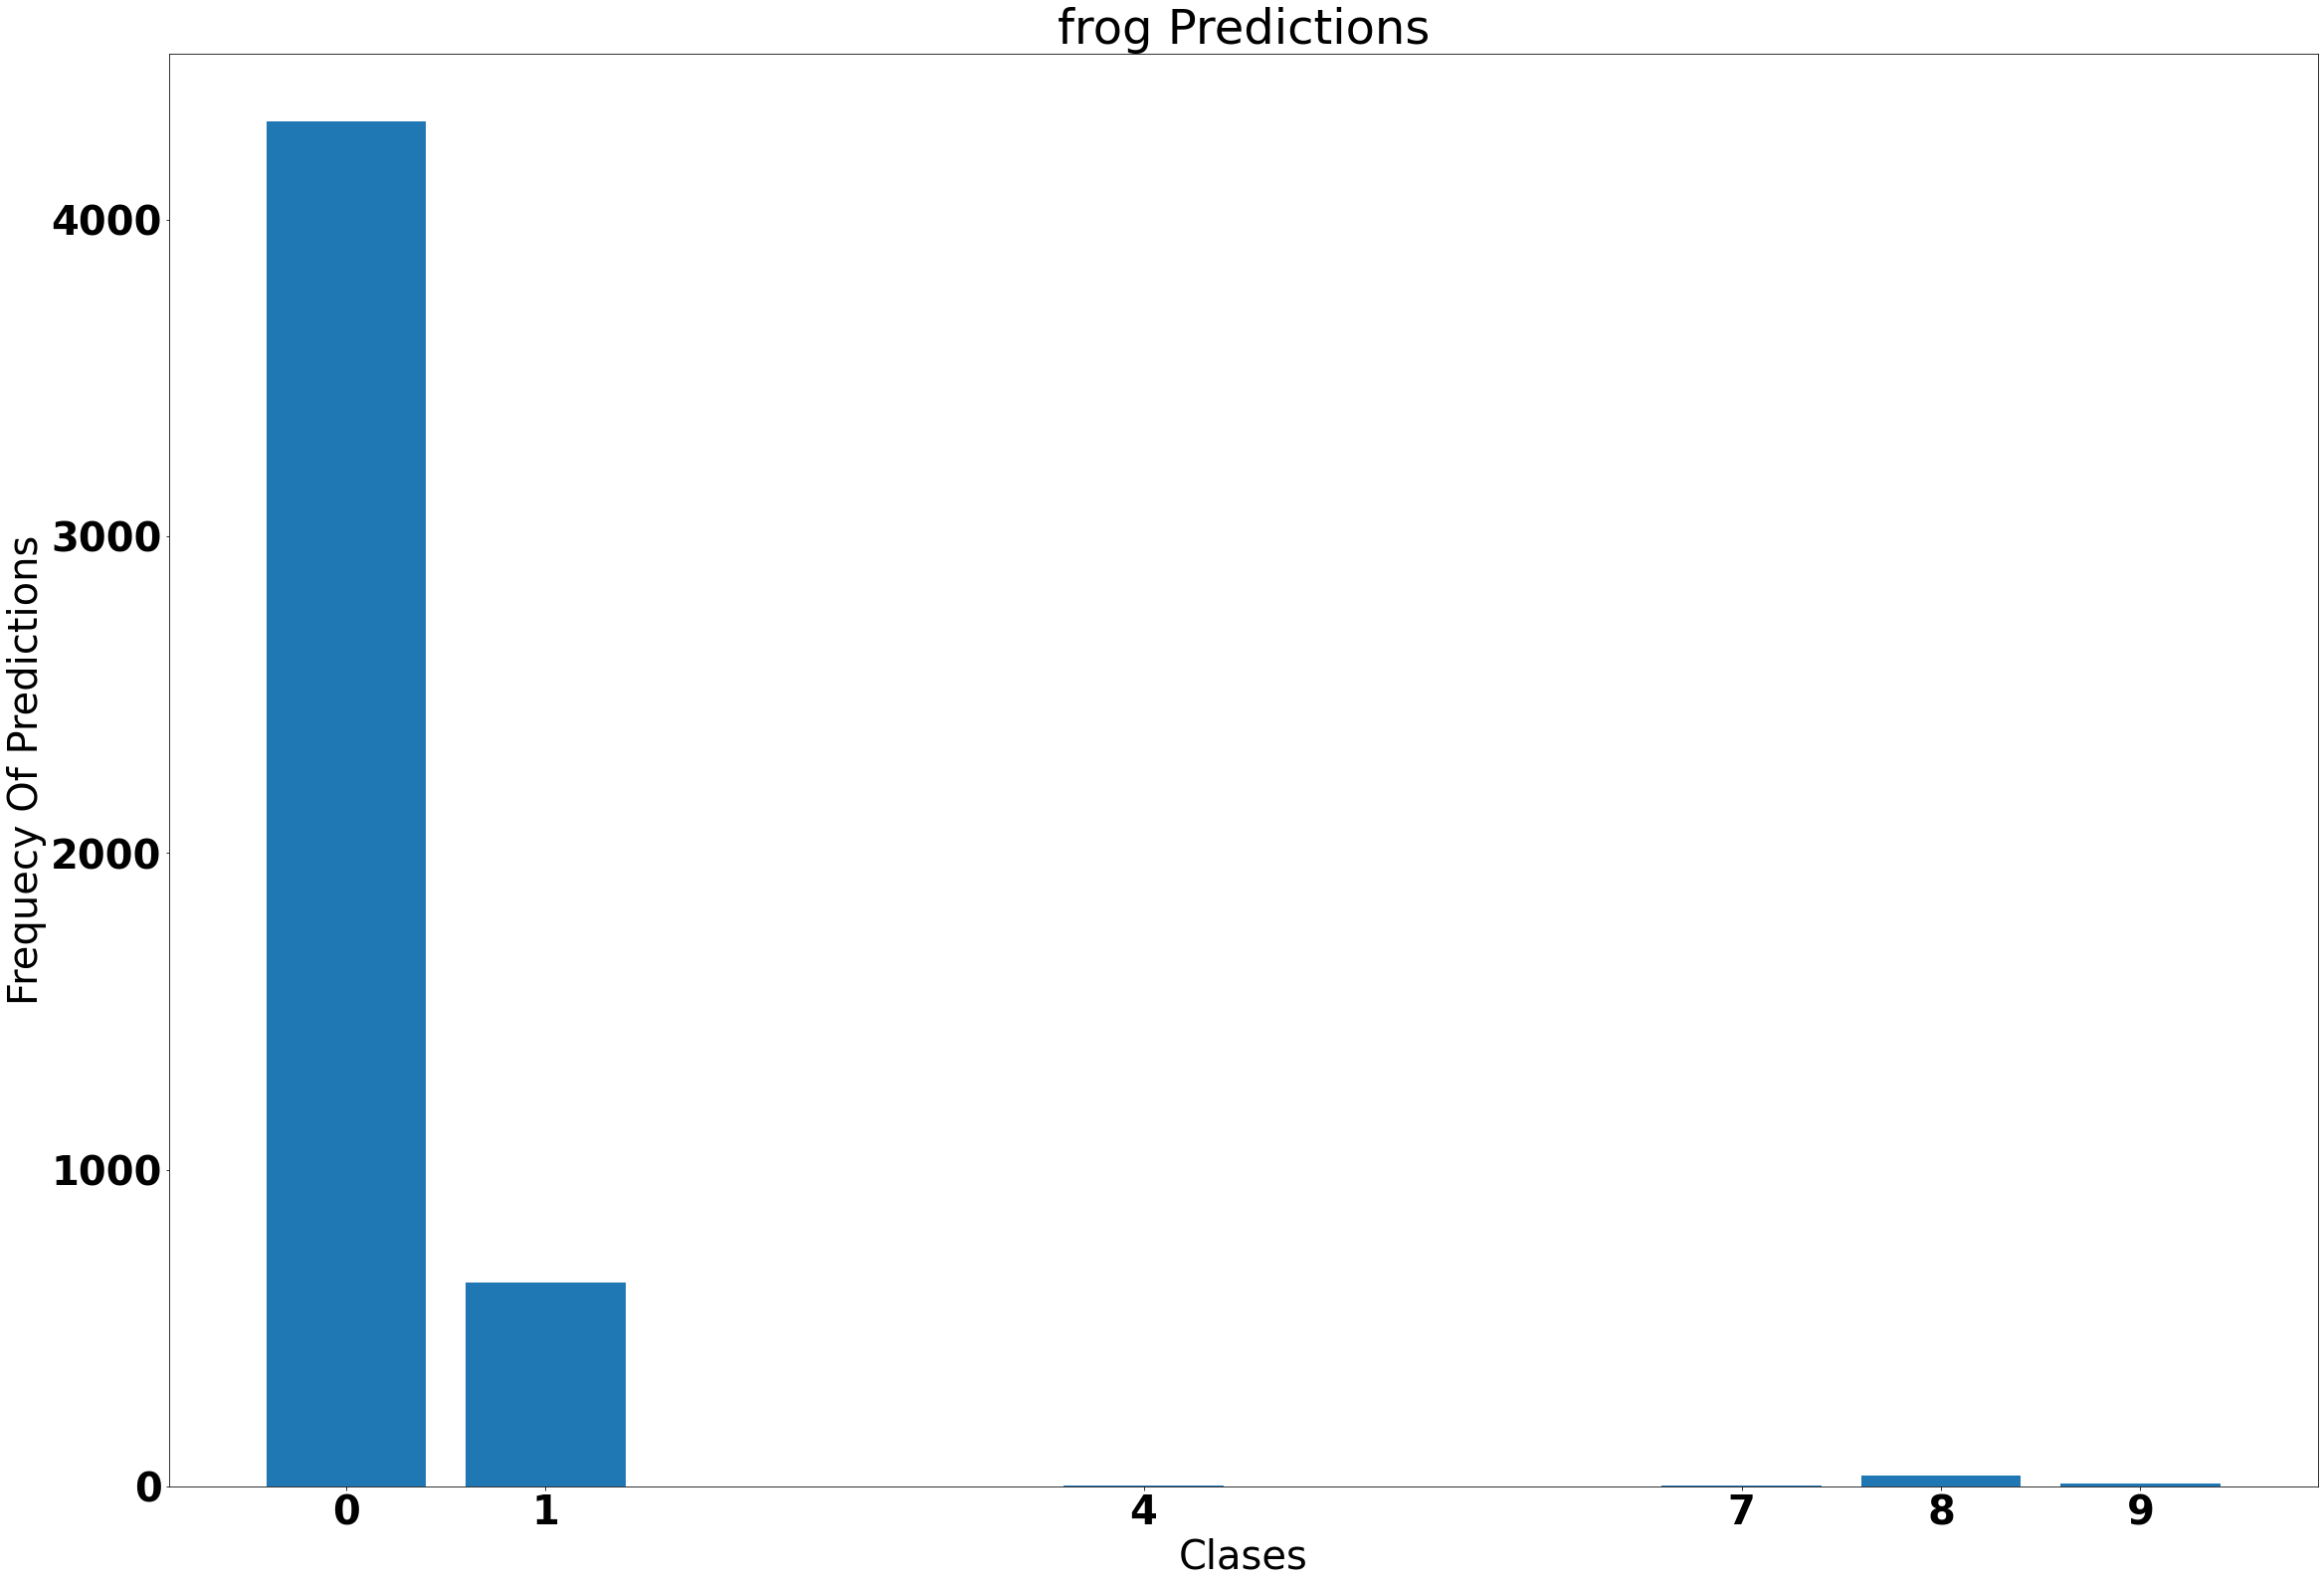

In [74]:
idx = 6
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #7


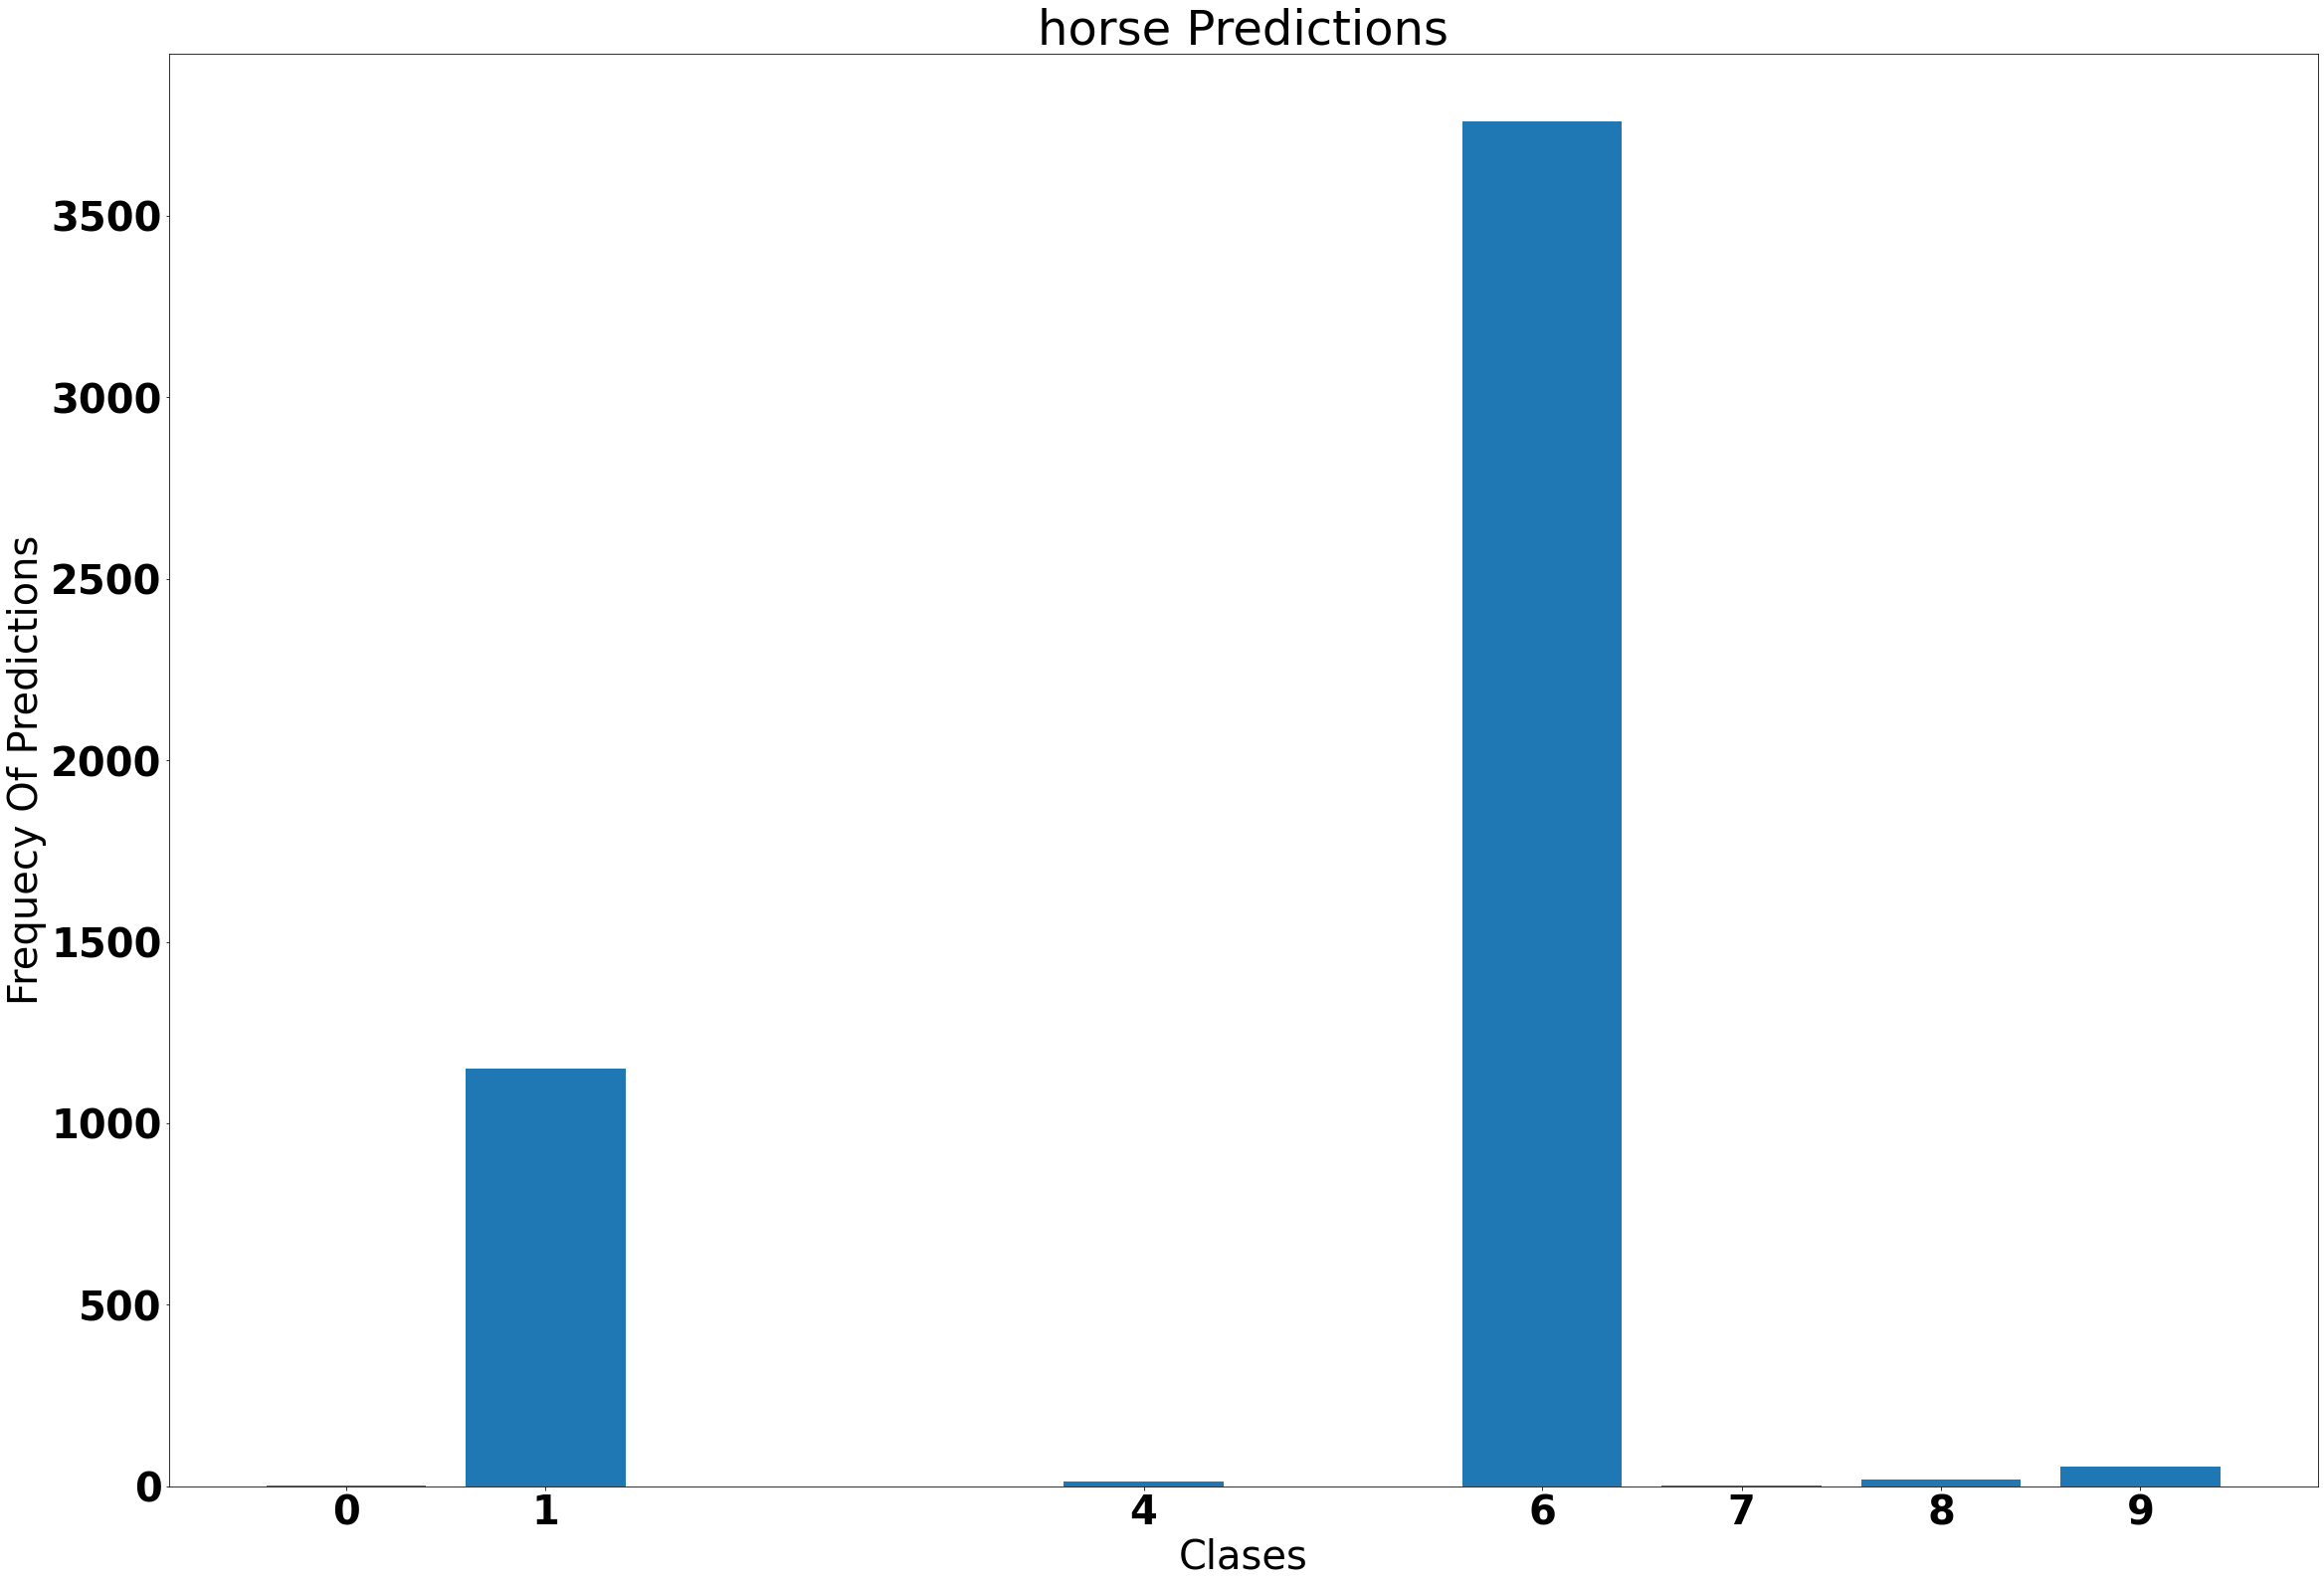

In [75]:
idx = 7
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #8


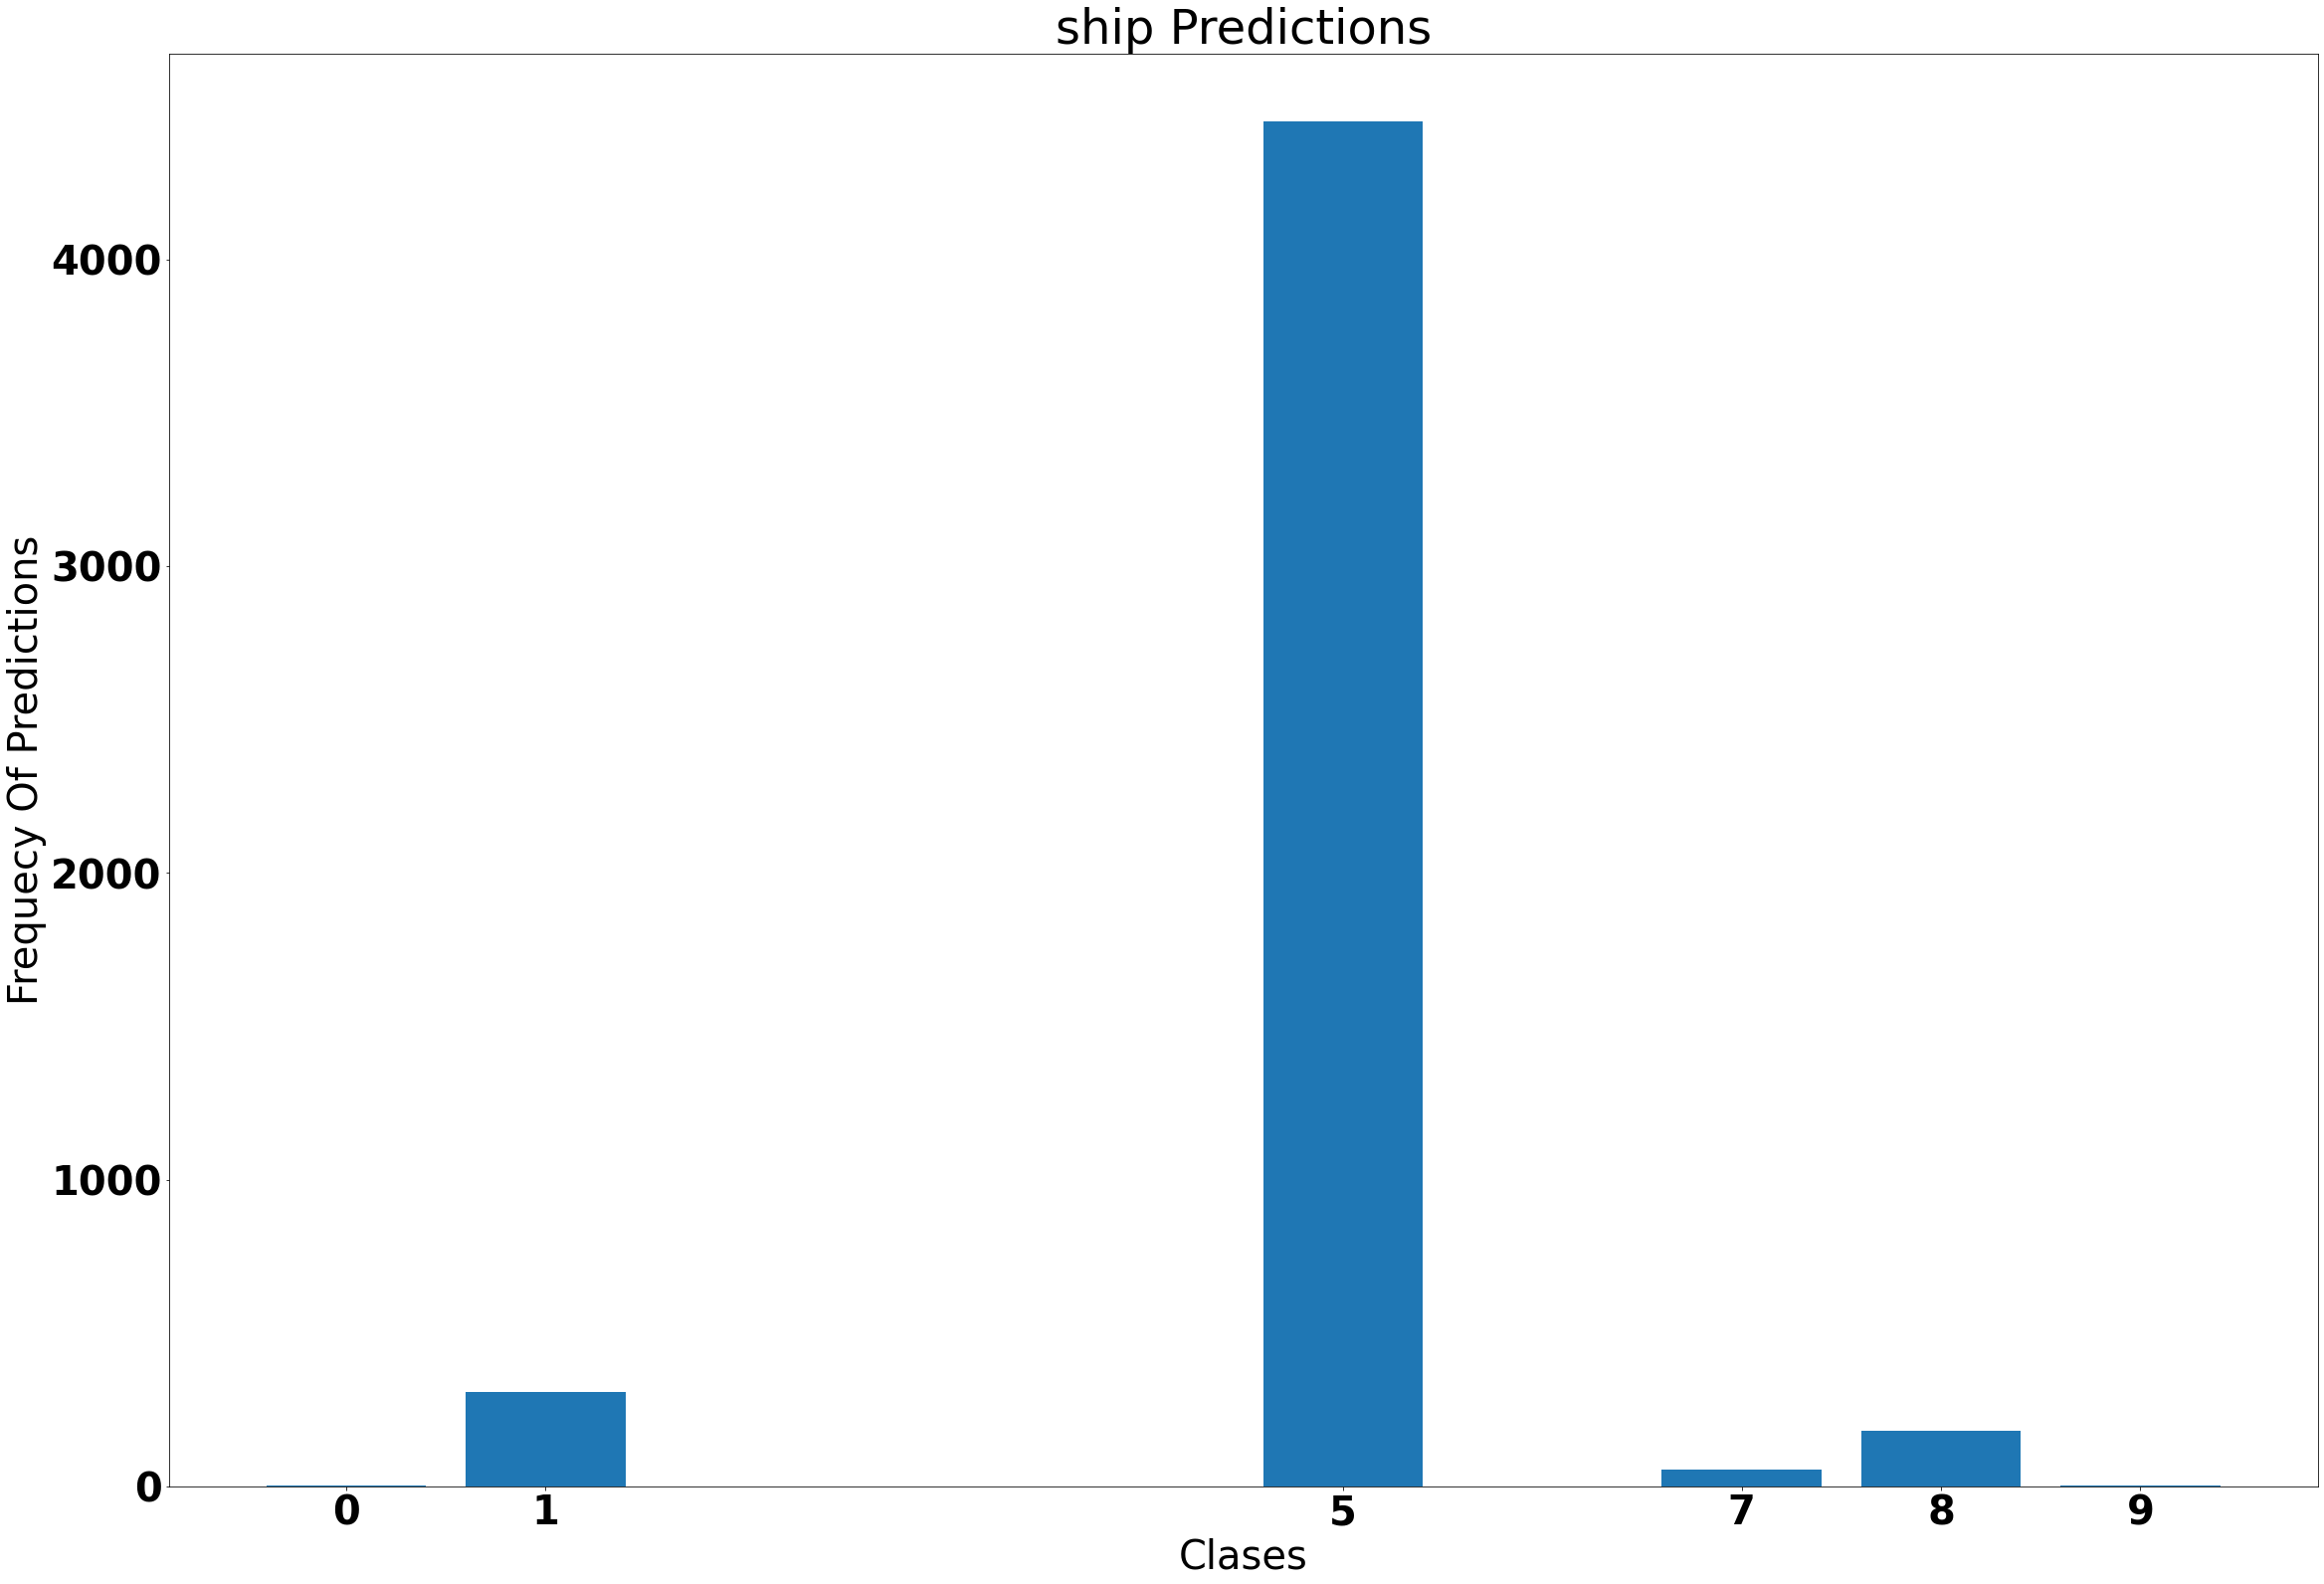

In [76]:
idx = 8
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

Class #9


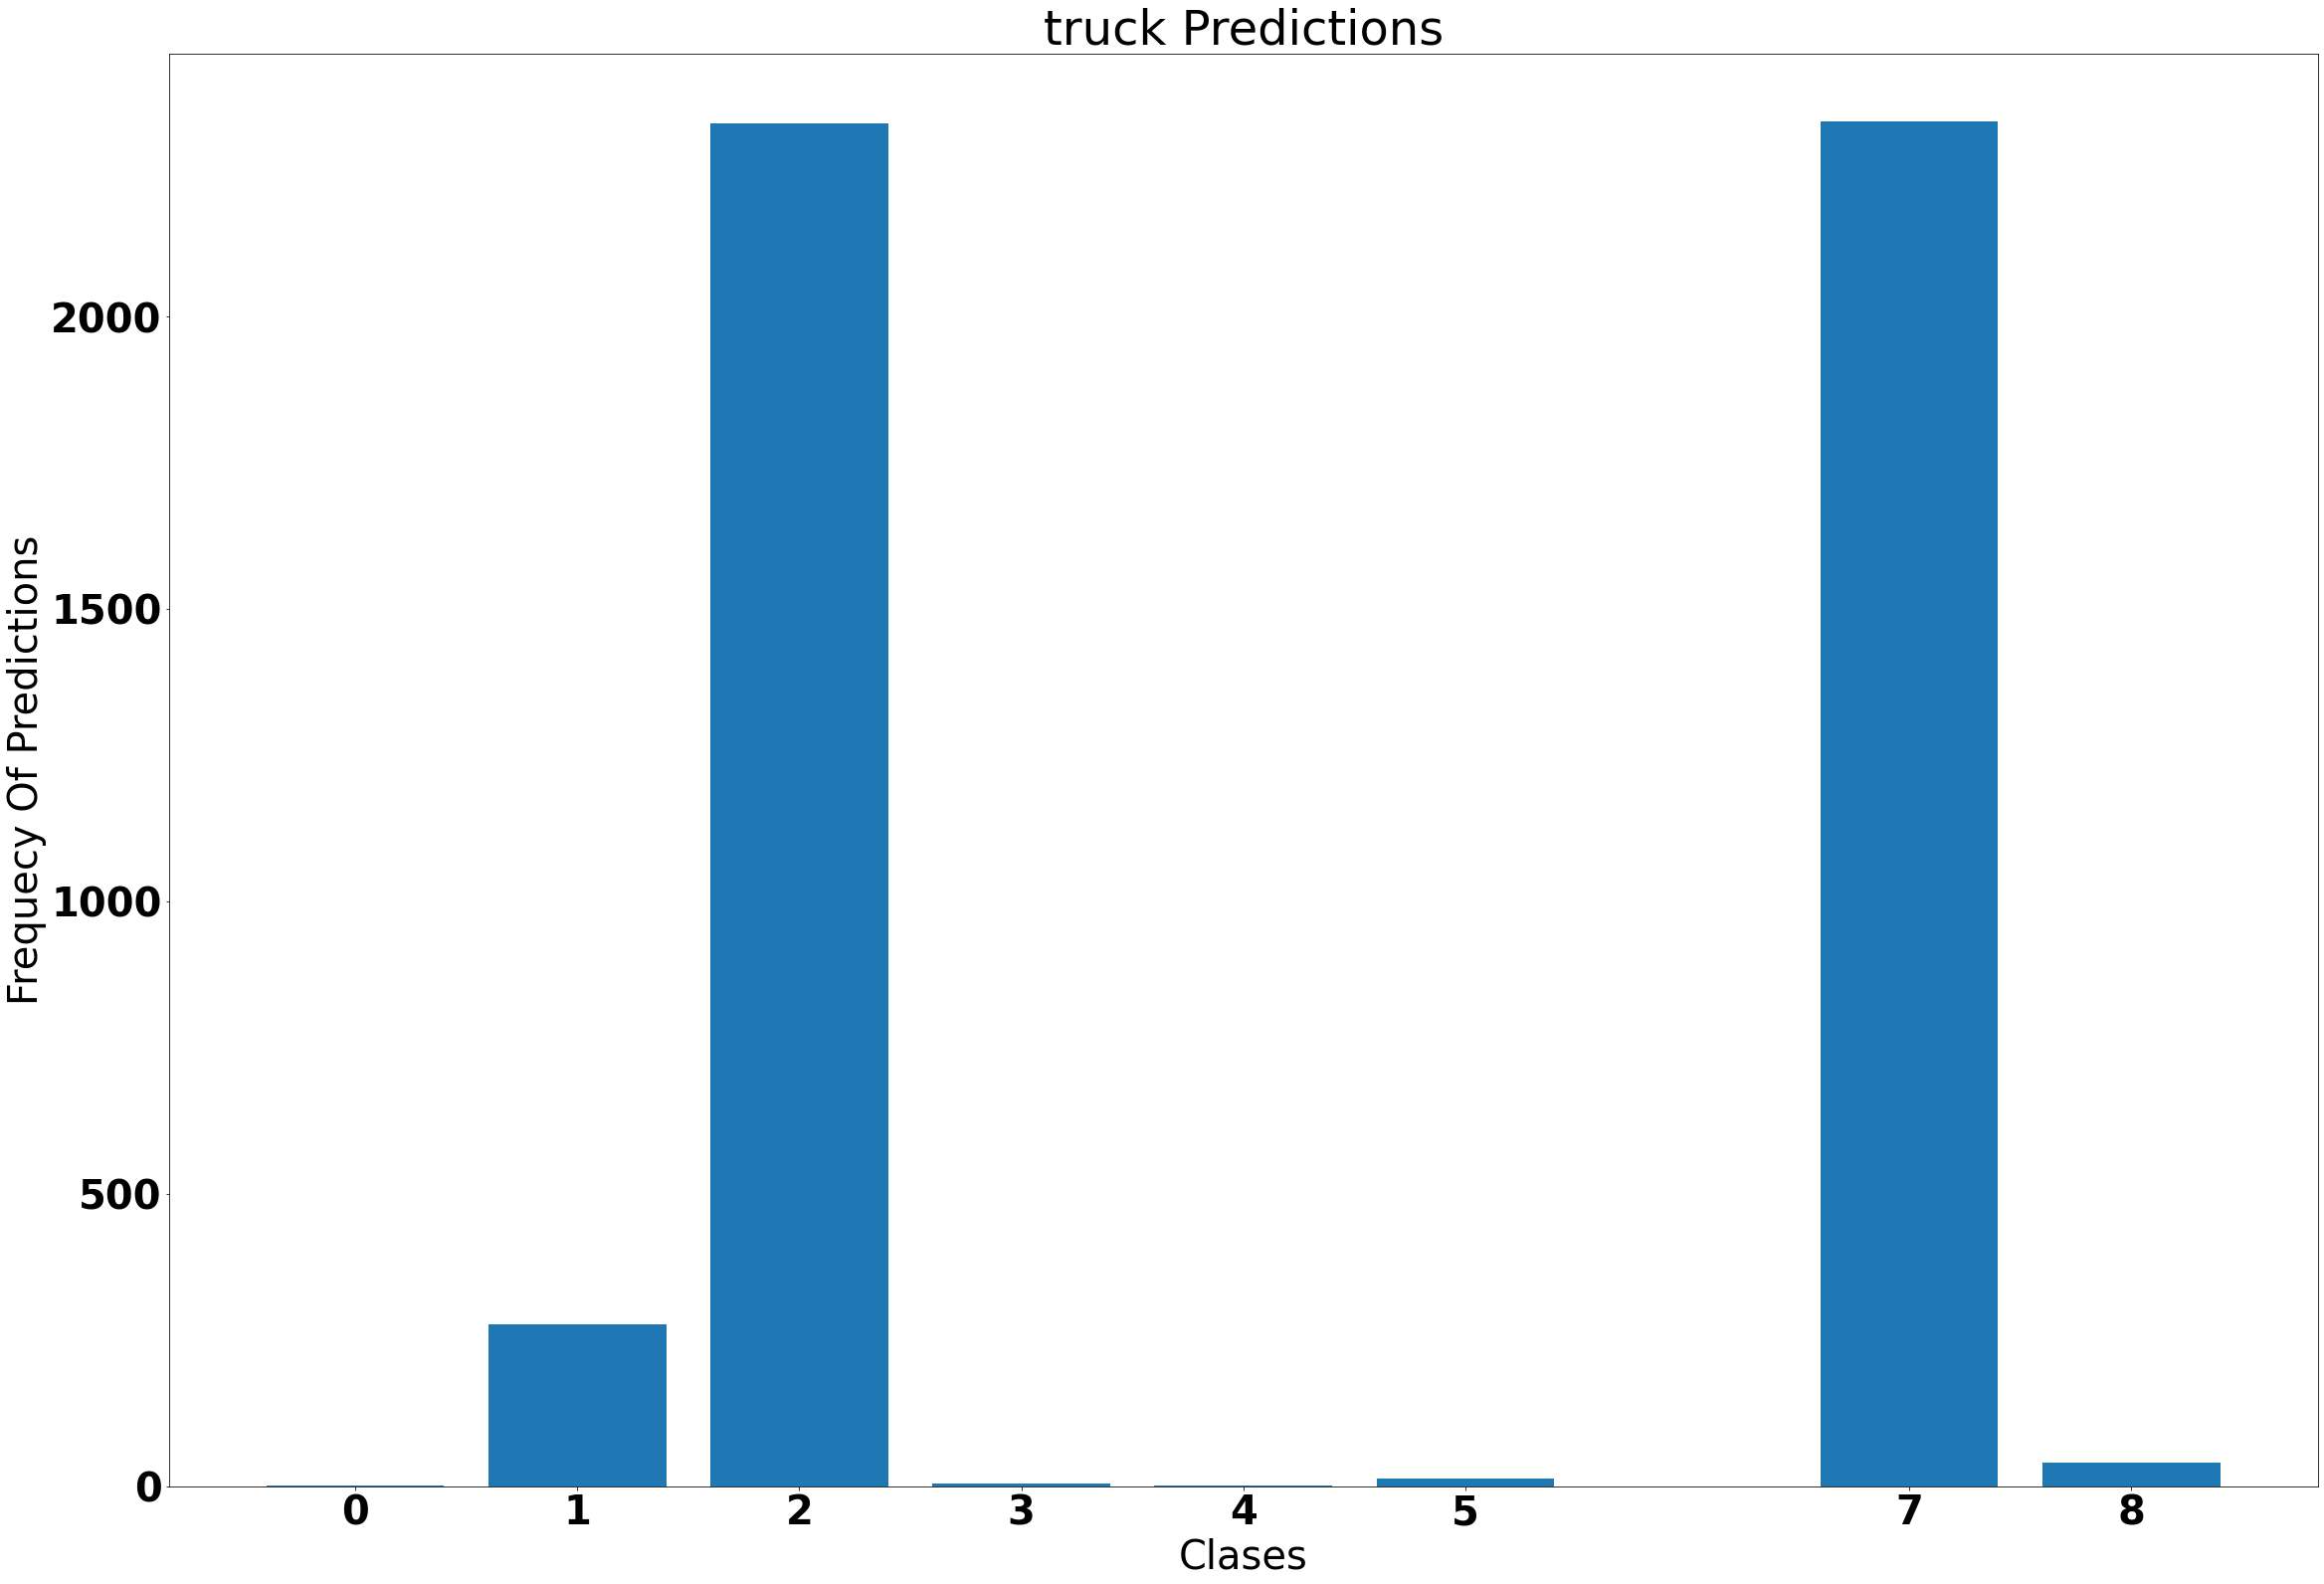

In [77]:
idx = 9
c = returnClassIndex(trainY,idx)
preds = k.predict(f[c])
plot_class_predictions(preds, idx)

In [78]:
def plot_class_pdf(vals, idx):
    font = {'family' : 'sans',
            'weight' : 'bold',
            'size'   : 30}
    matplotlib.rc('font', **font)
    print("Mean: {}".format(stat.mean(vals)))
    print("Variance: {}".format(np.var(vals)))
    print("Standard Deviation: {}".format(np.std(vals)))
    plt.figure( figsize = (40, 30), facecolor = 'gray')
    plt.hist(vals, color = 'blue', edgecolor = 'black',
             bins = int(180/5))
    # Add labels
    classes =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship',
                'truck']
    plt.title('Histogram of cluster distance of each Prediction for {}'.format(classes[idx]))
    plt.xlabel('Cluster Distance')
    plt.ylabel('# of Predictions')
    #plt.set_facecolor('gray')
    plt.show()

In [1]:
idx = 0

c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

NameError: name 'returnClassIndex' is not defined

Mean: 5.958364963531494
Variance: 5.408177375793457
Standard Deviation: 2.3255488872528076


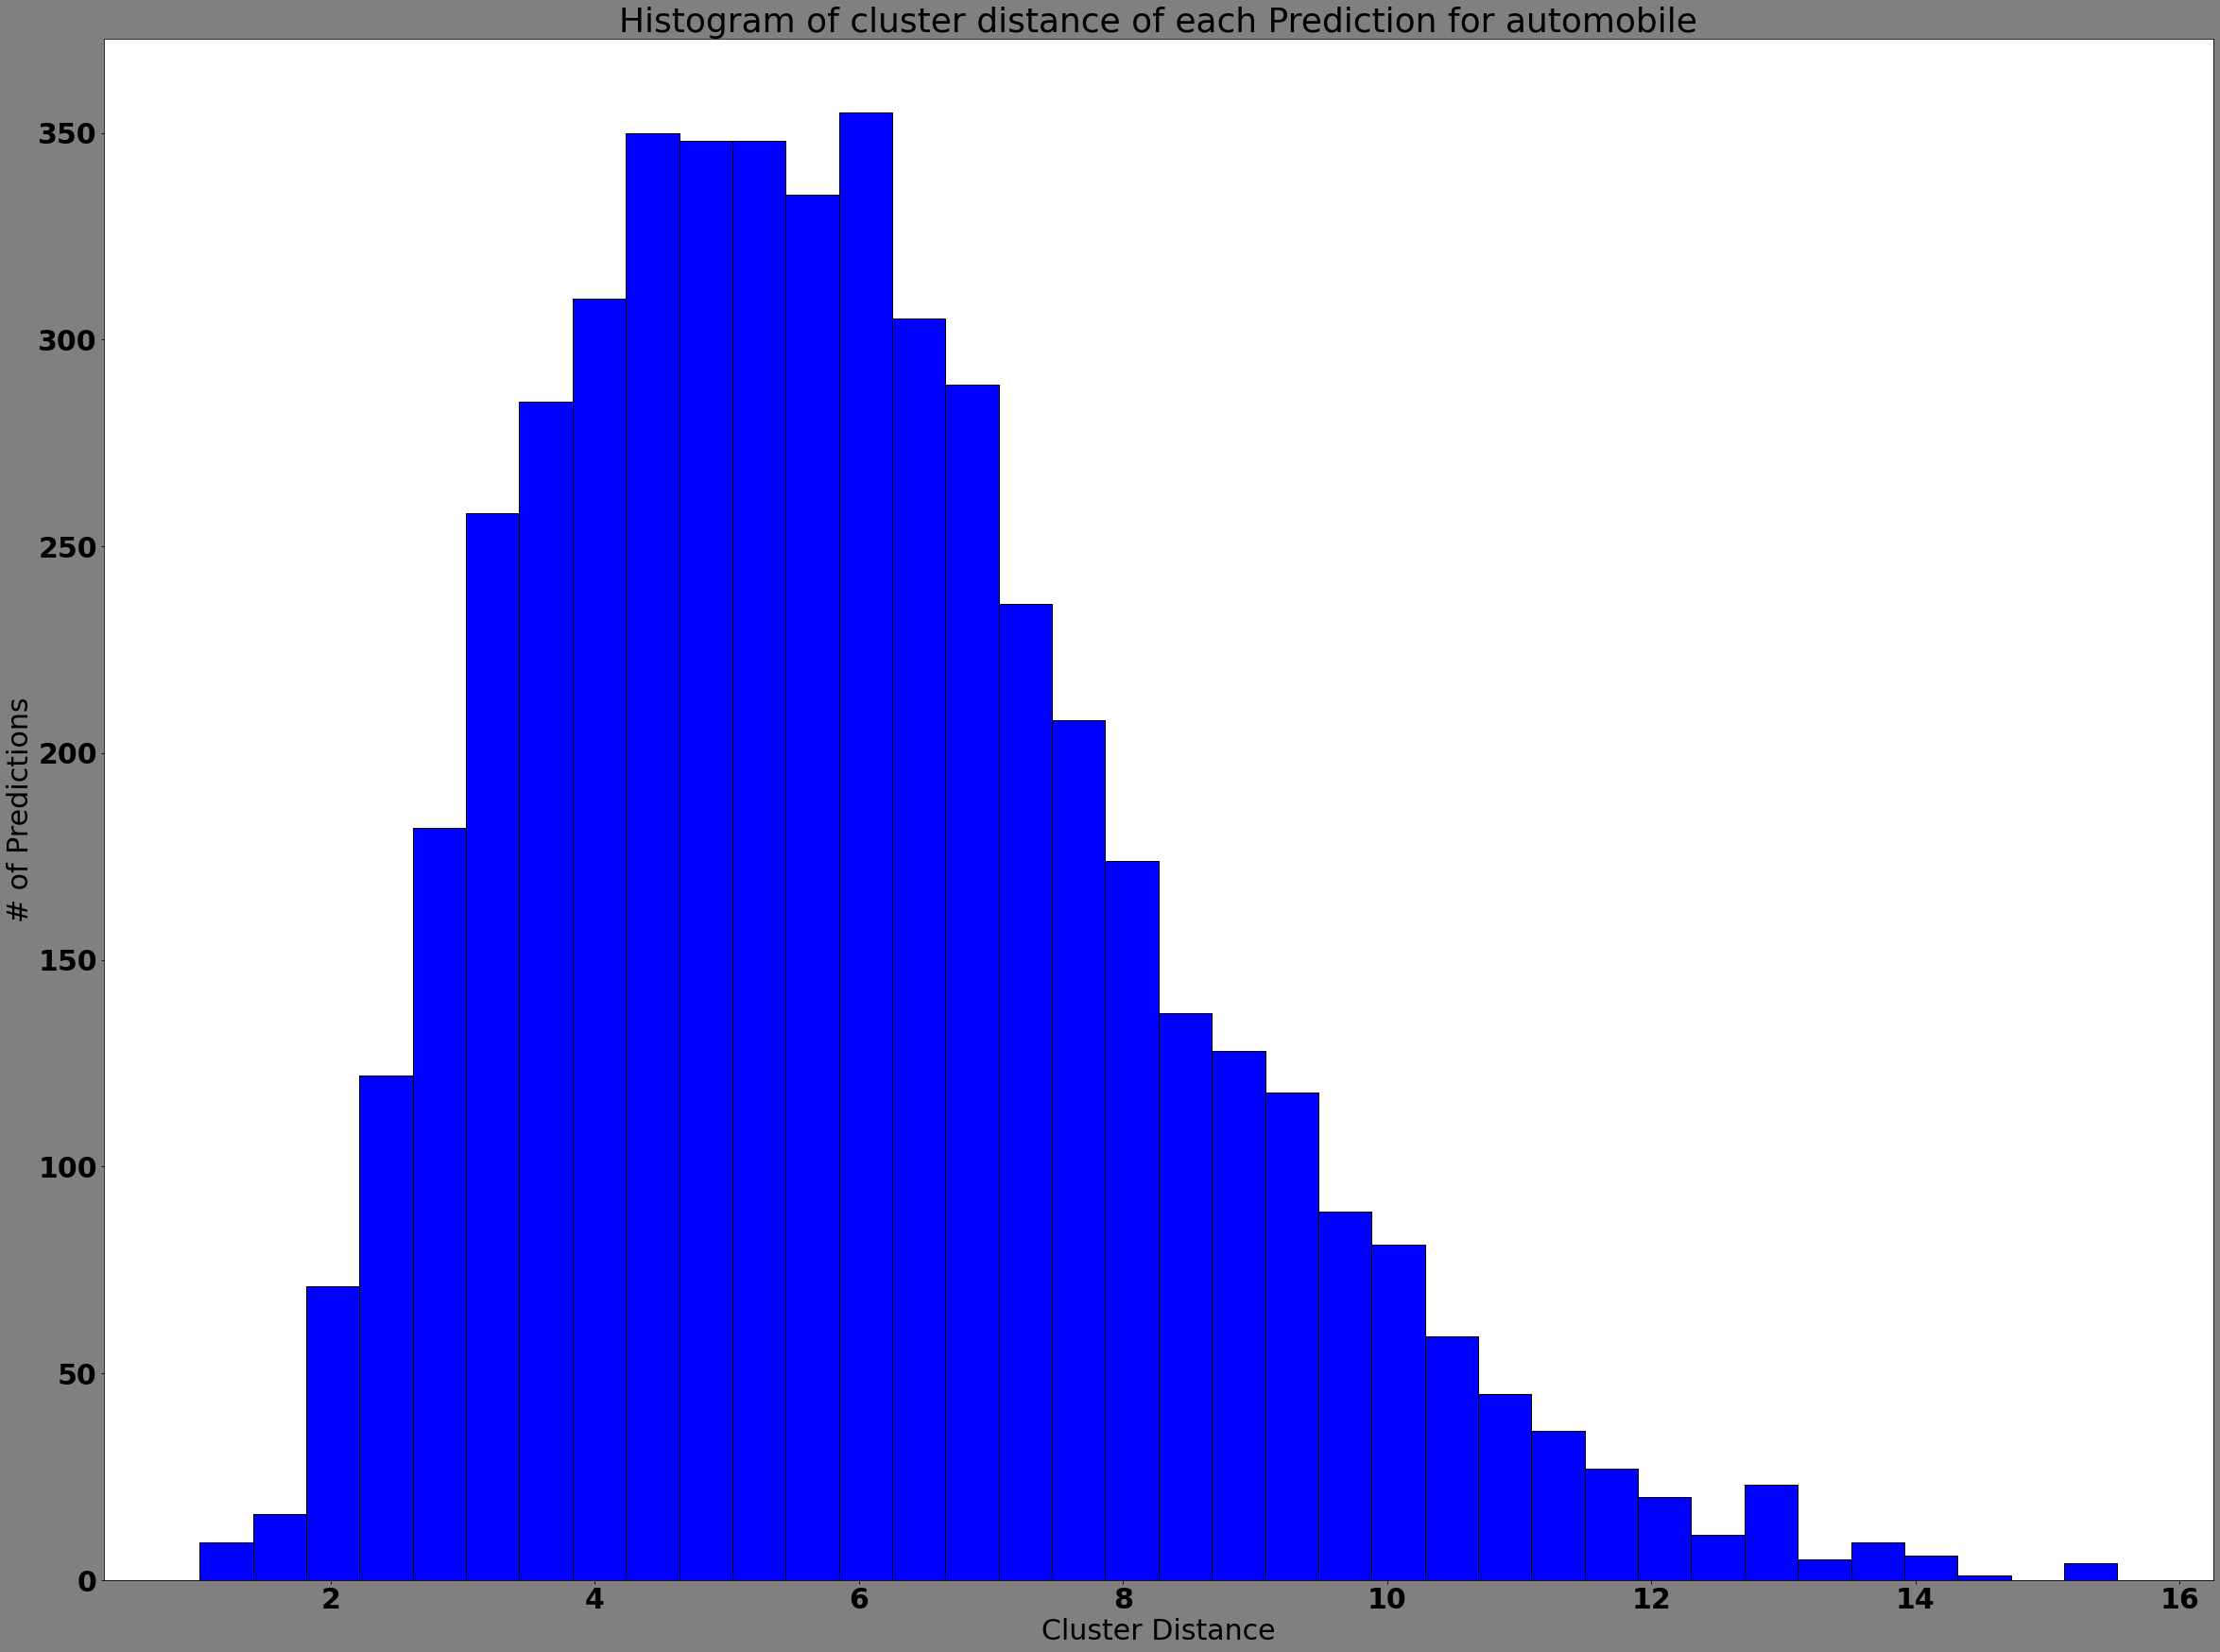

In [80]:
idx = 1
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 6.63932991027832
Variance: 0.06058180704712868
Standard Deviation: 0.2461337149143219


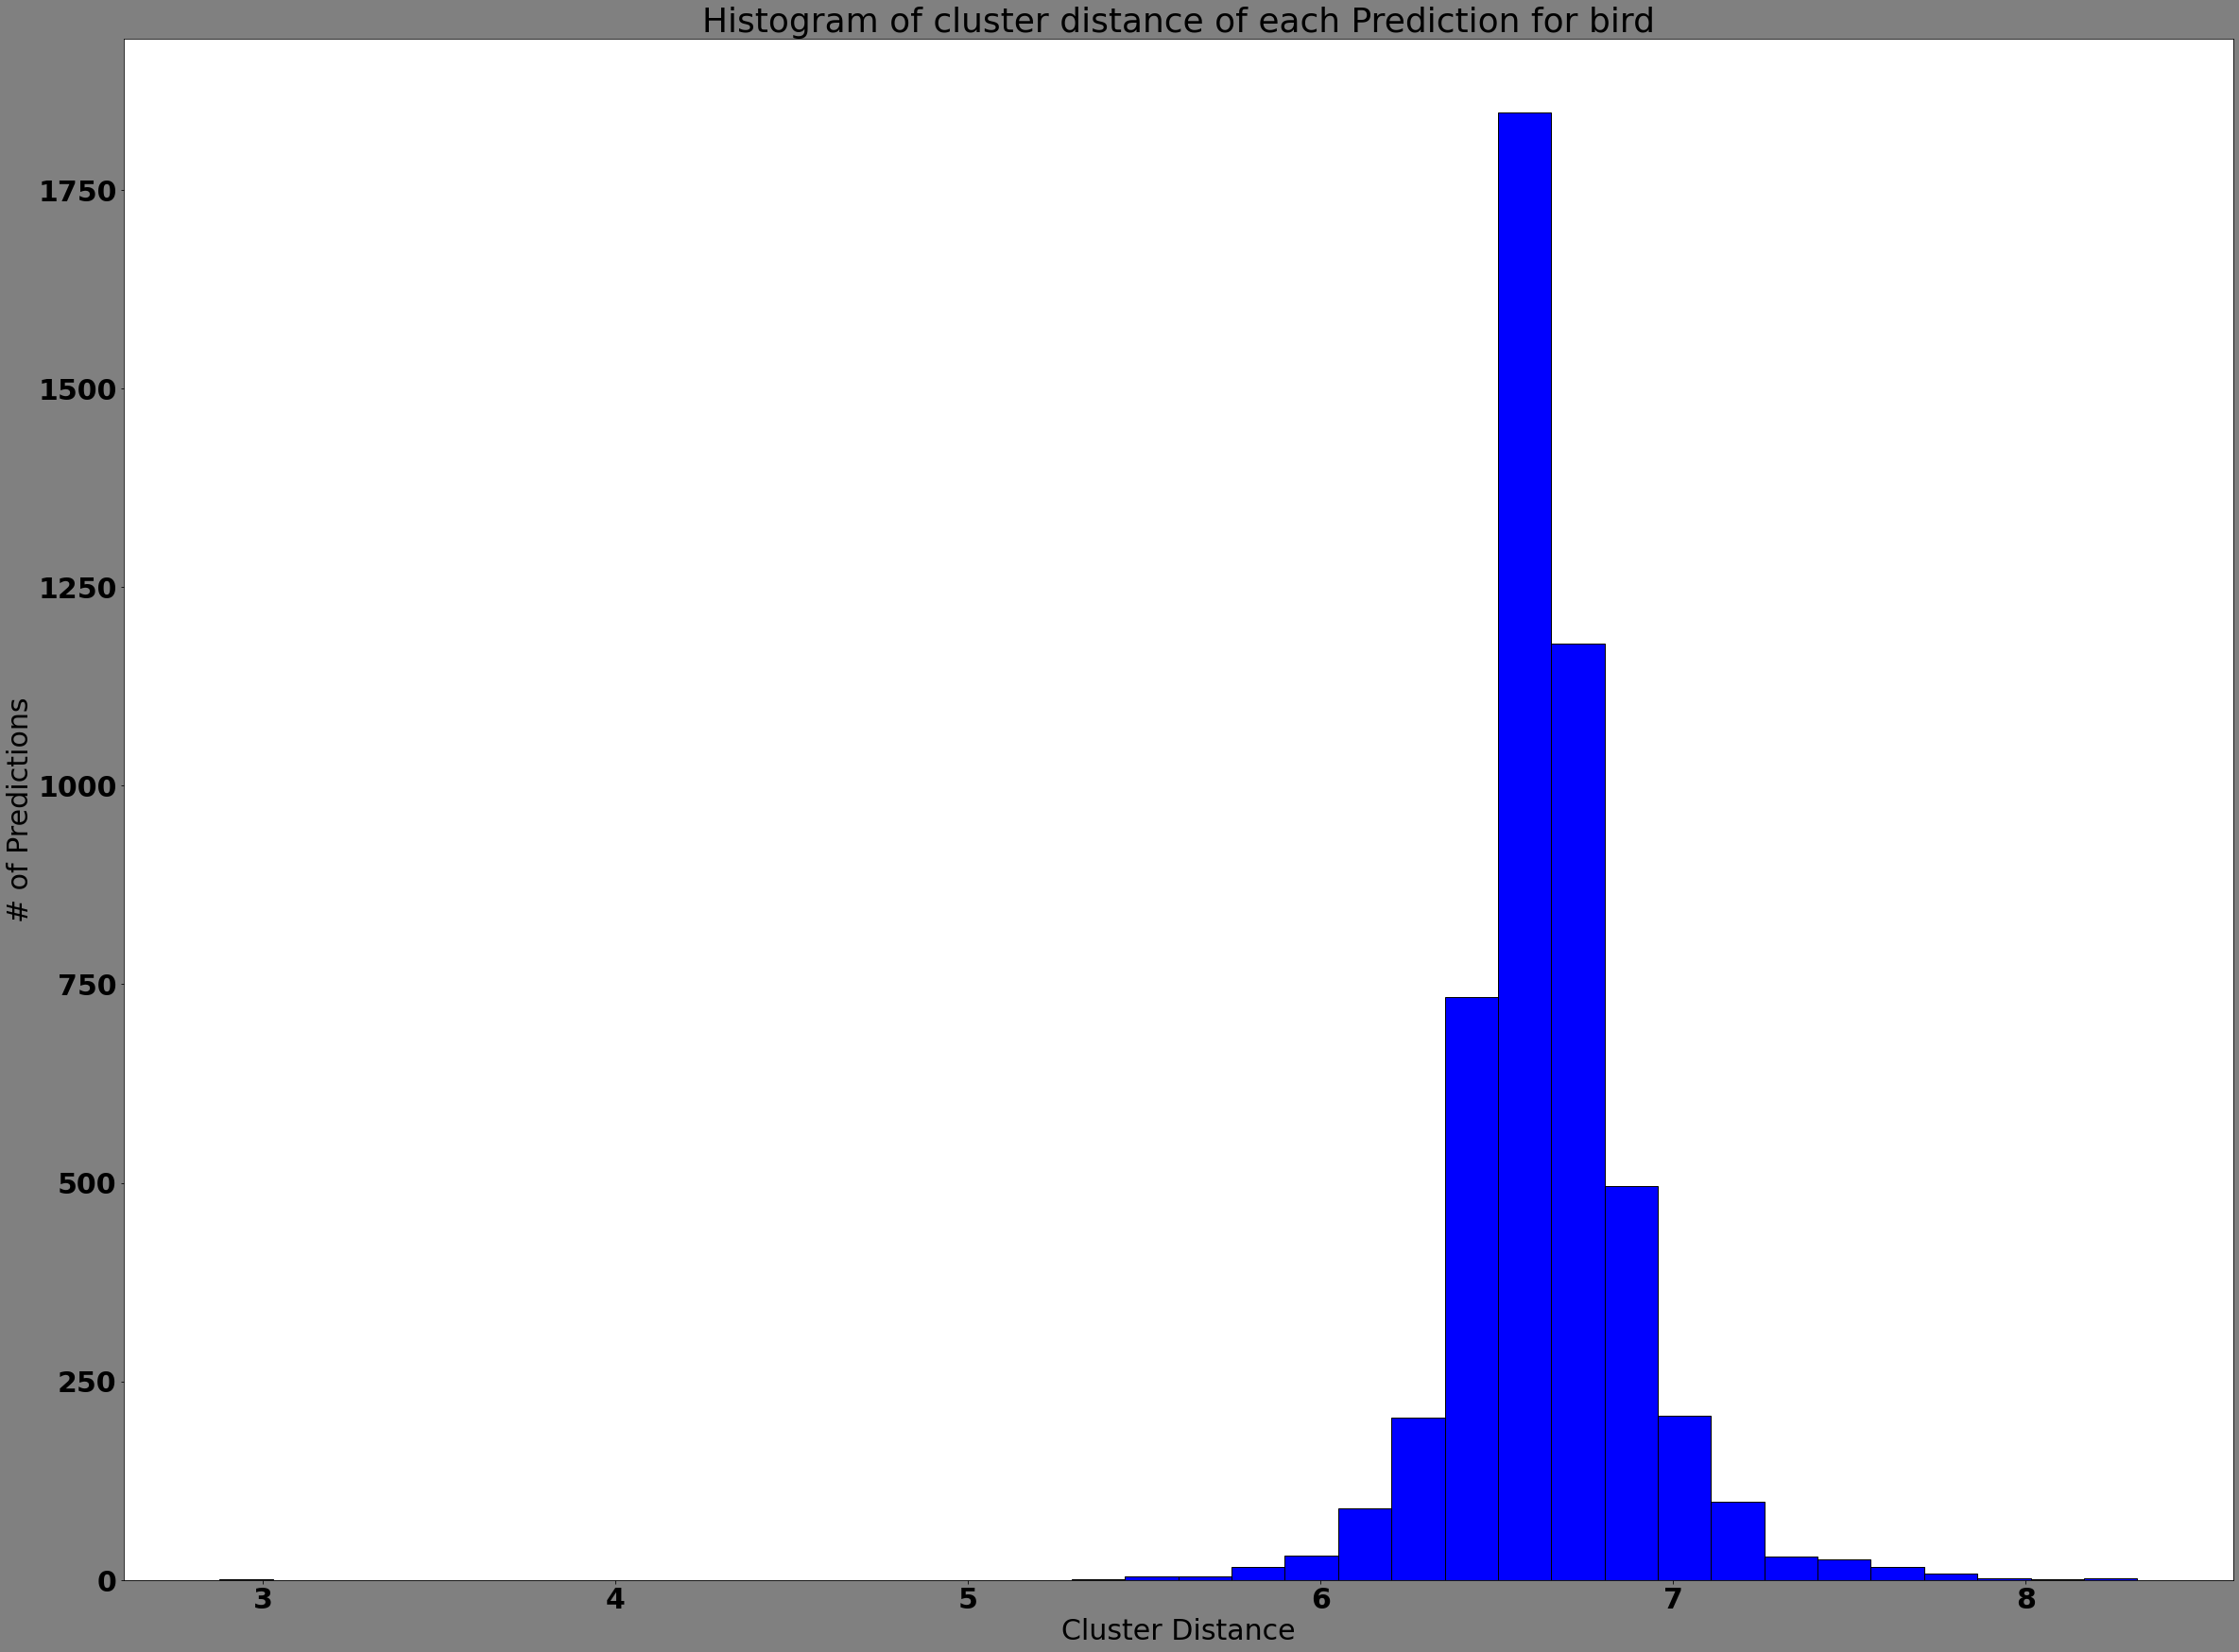

In [81]:
idx = 2
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 7.538146018981934
Variance: 0.07945766299962997
Standard Deviation: 0.2818823456764221


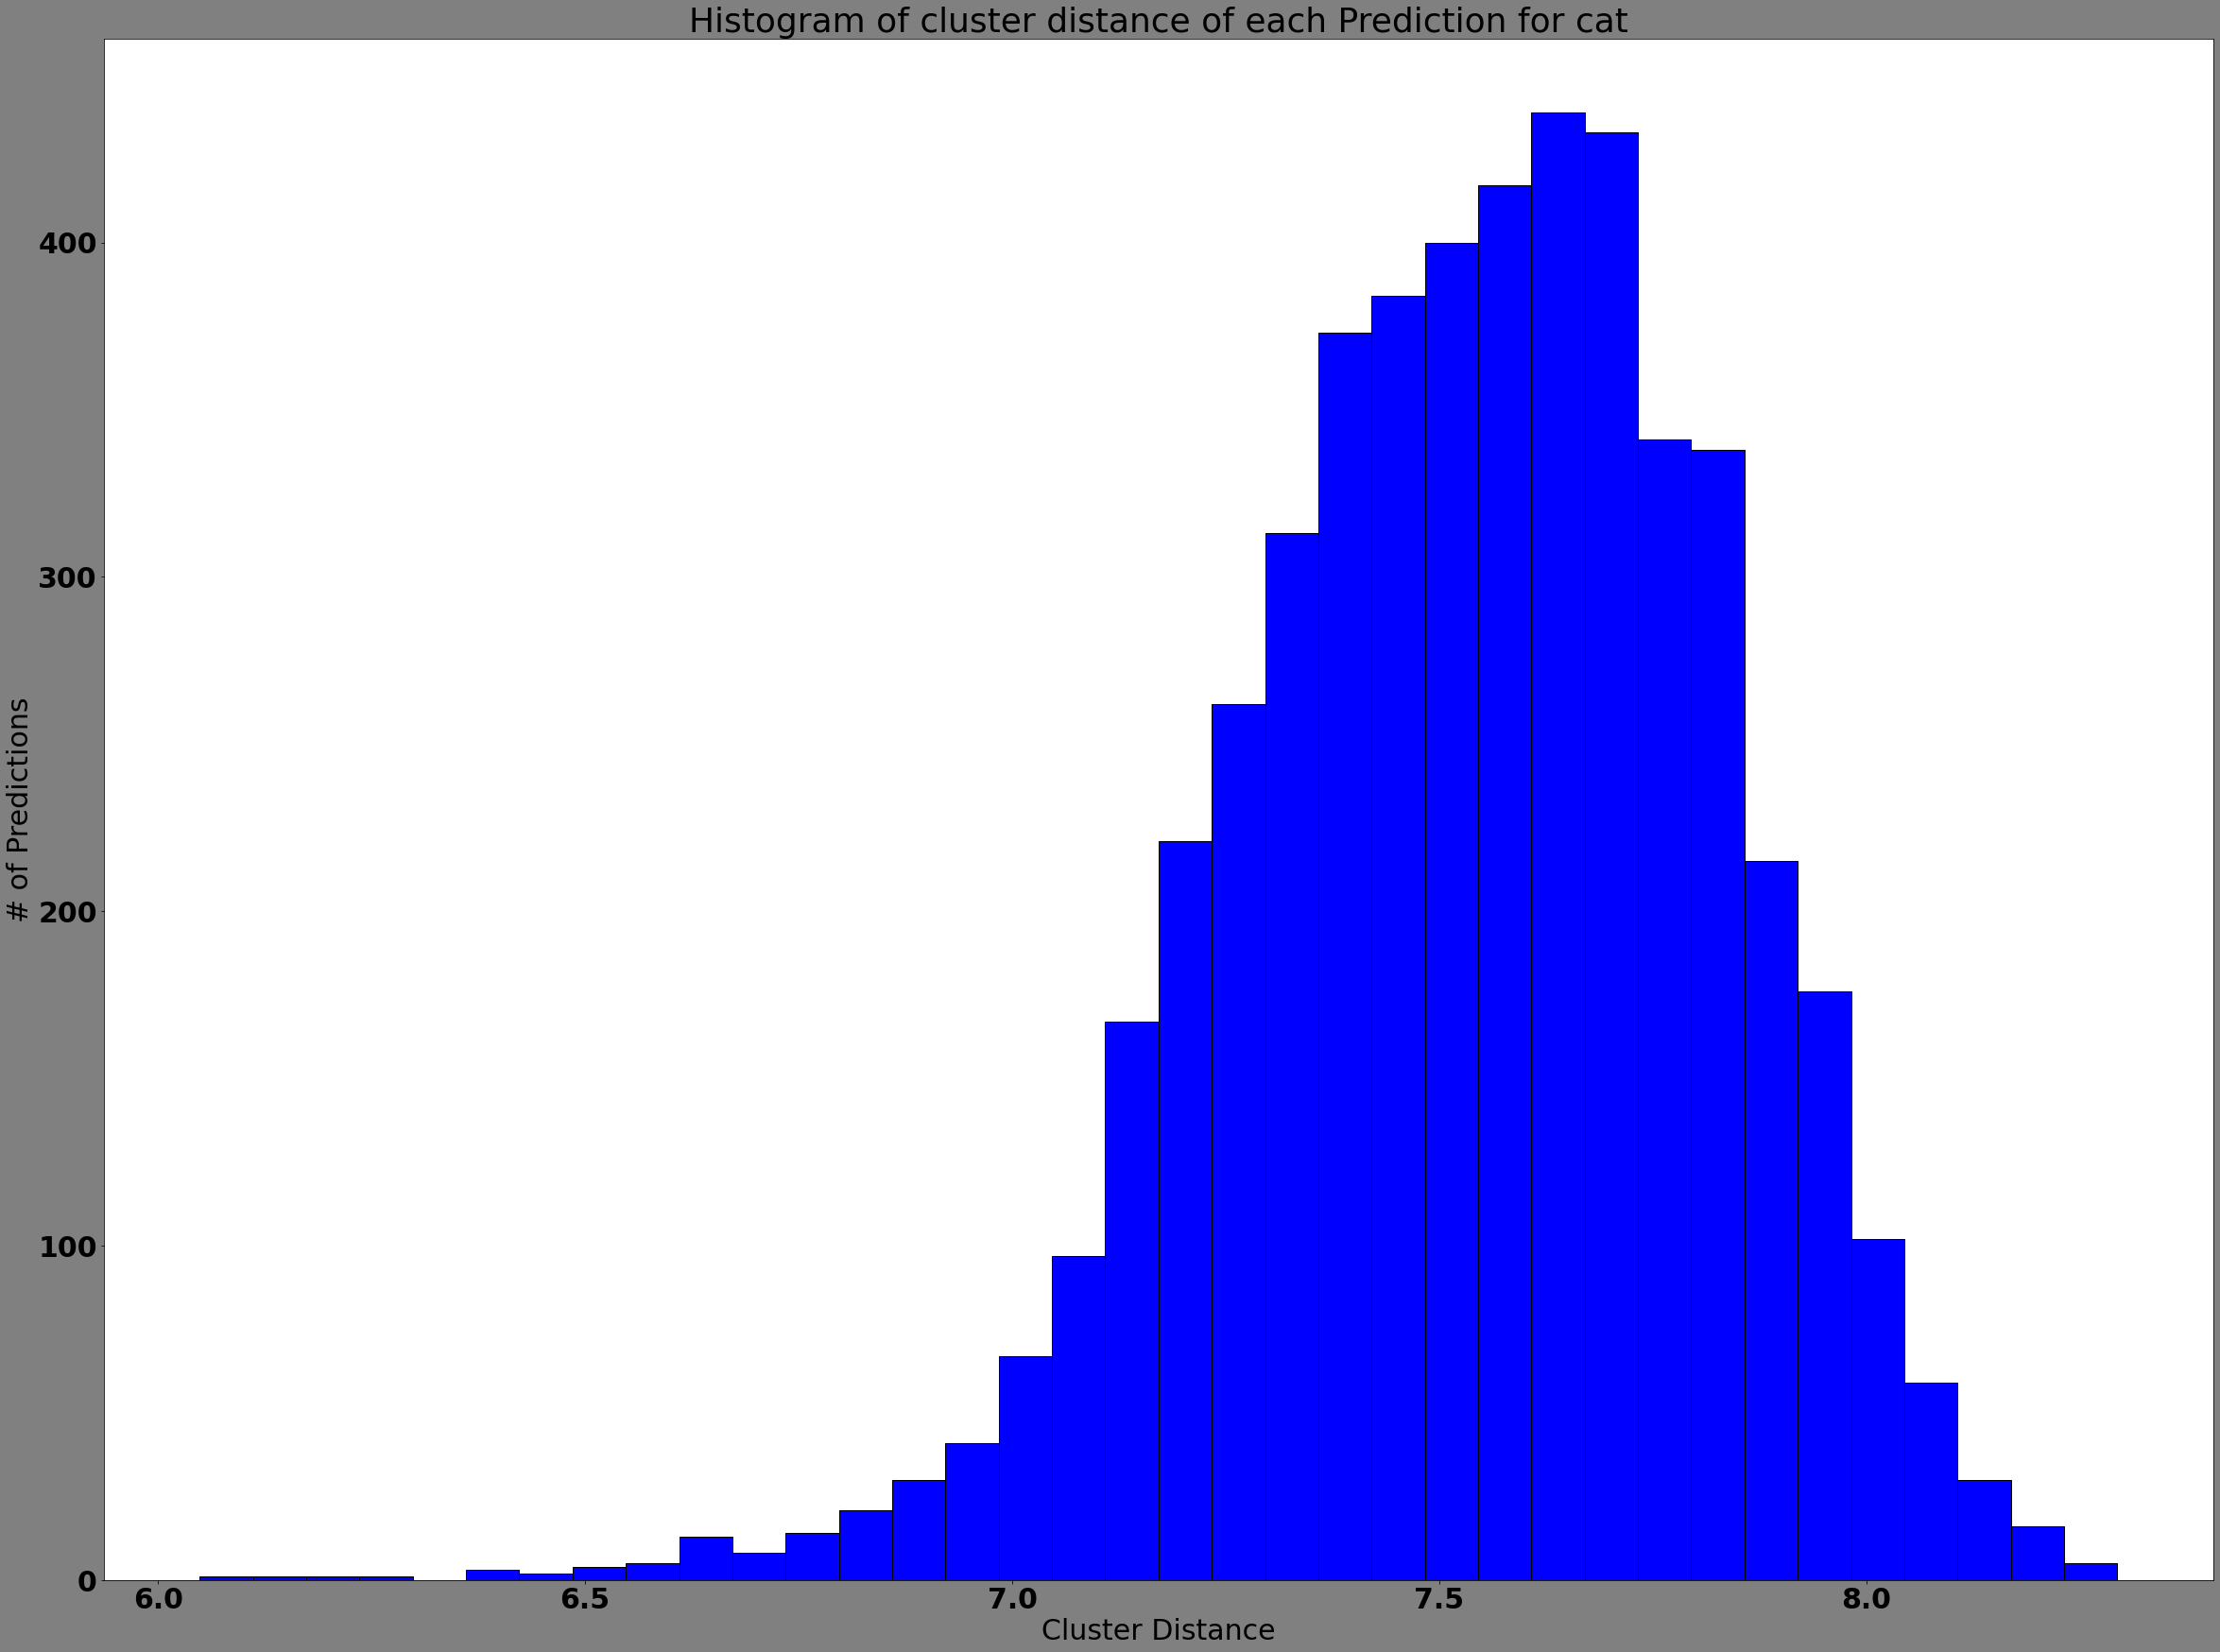

In [82]:
idx = 3
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 3.7445685863494873
Variance: 0.23085106909275055
Standard Deviation: 0.48046964406967163


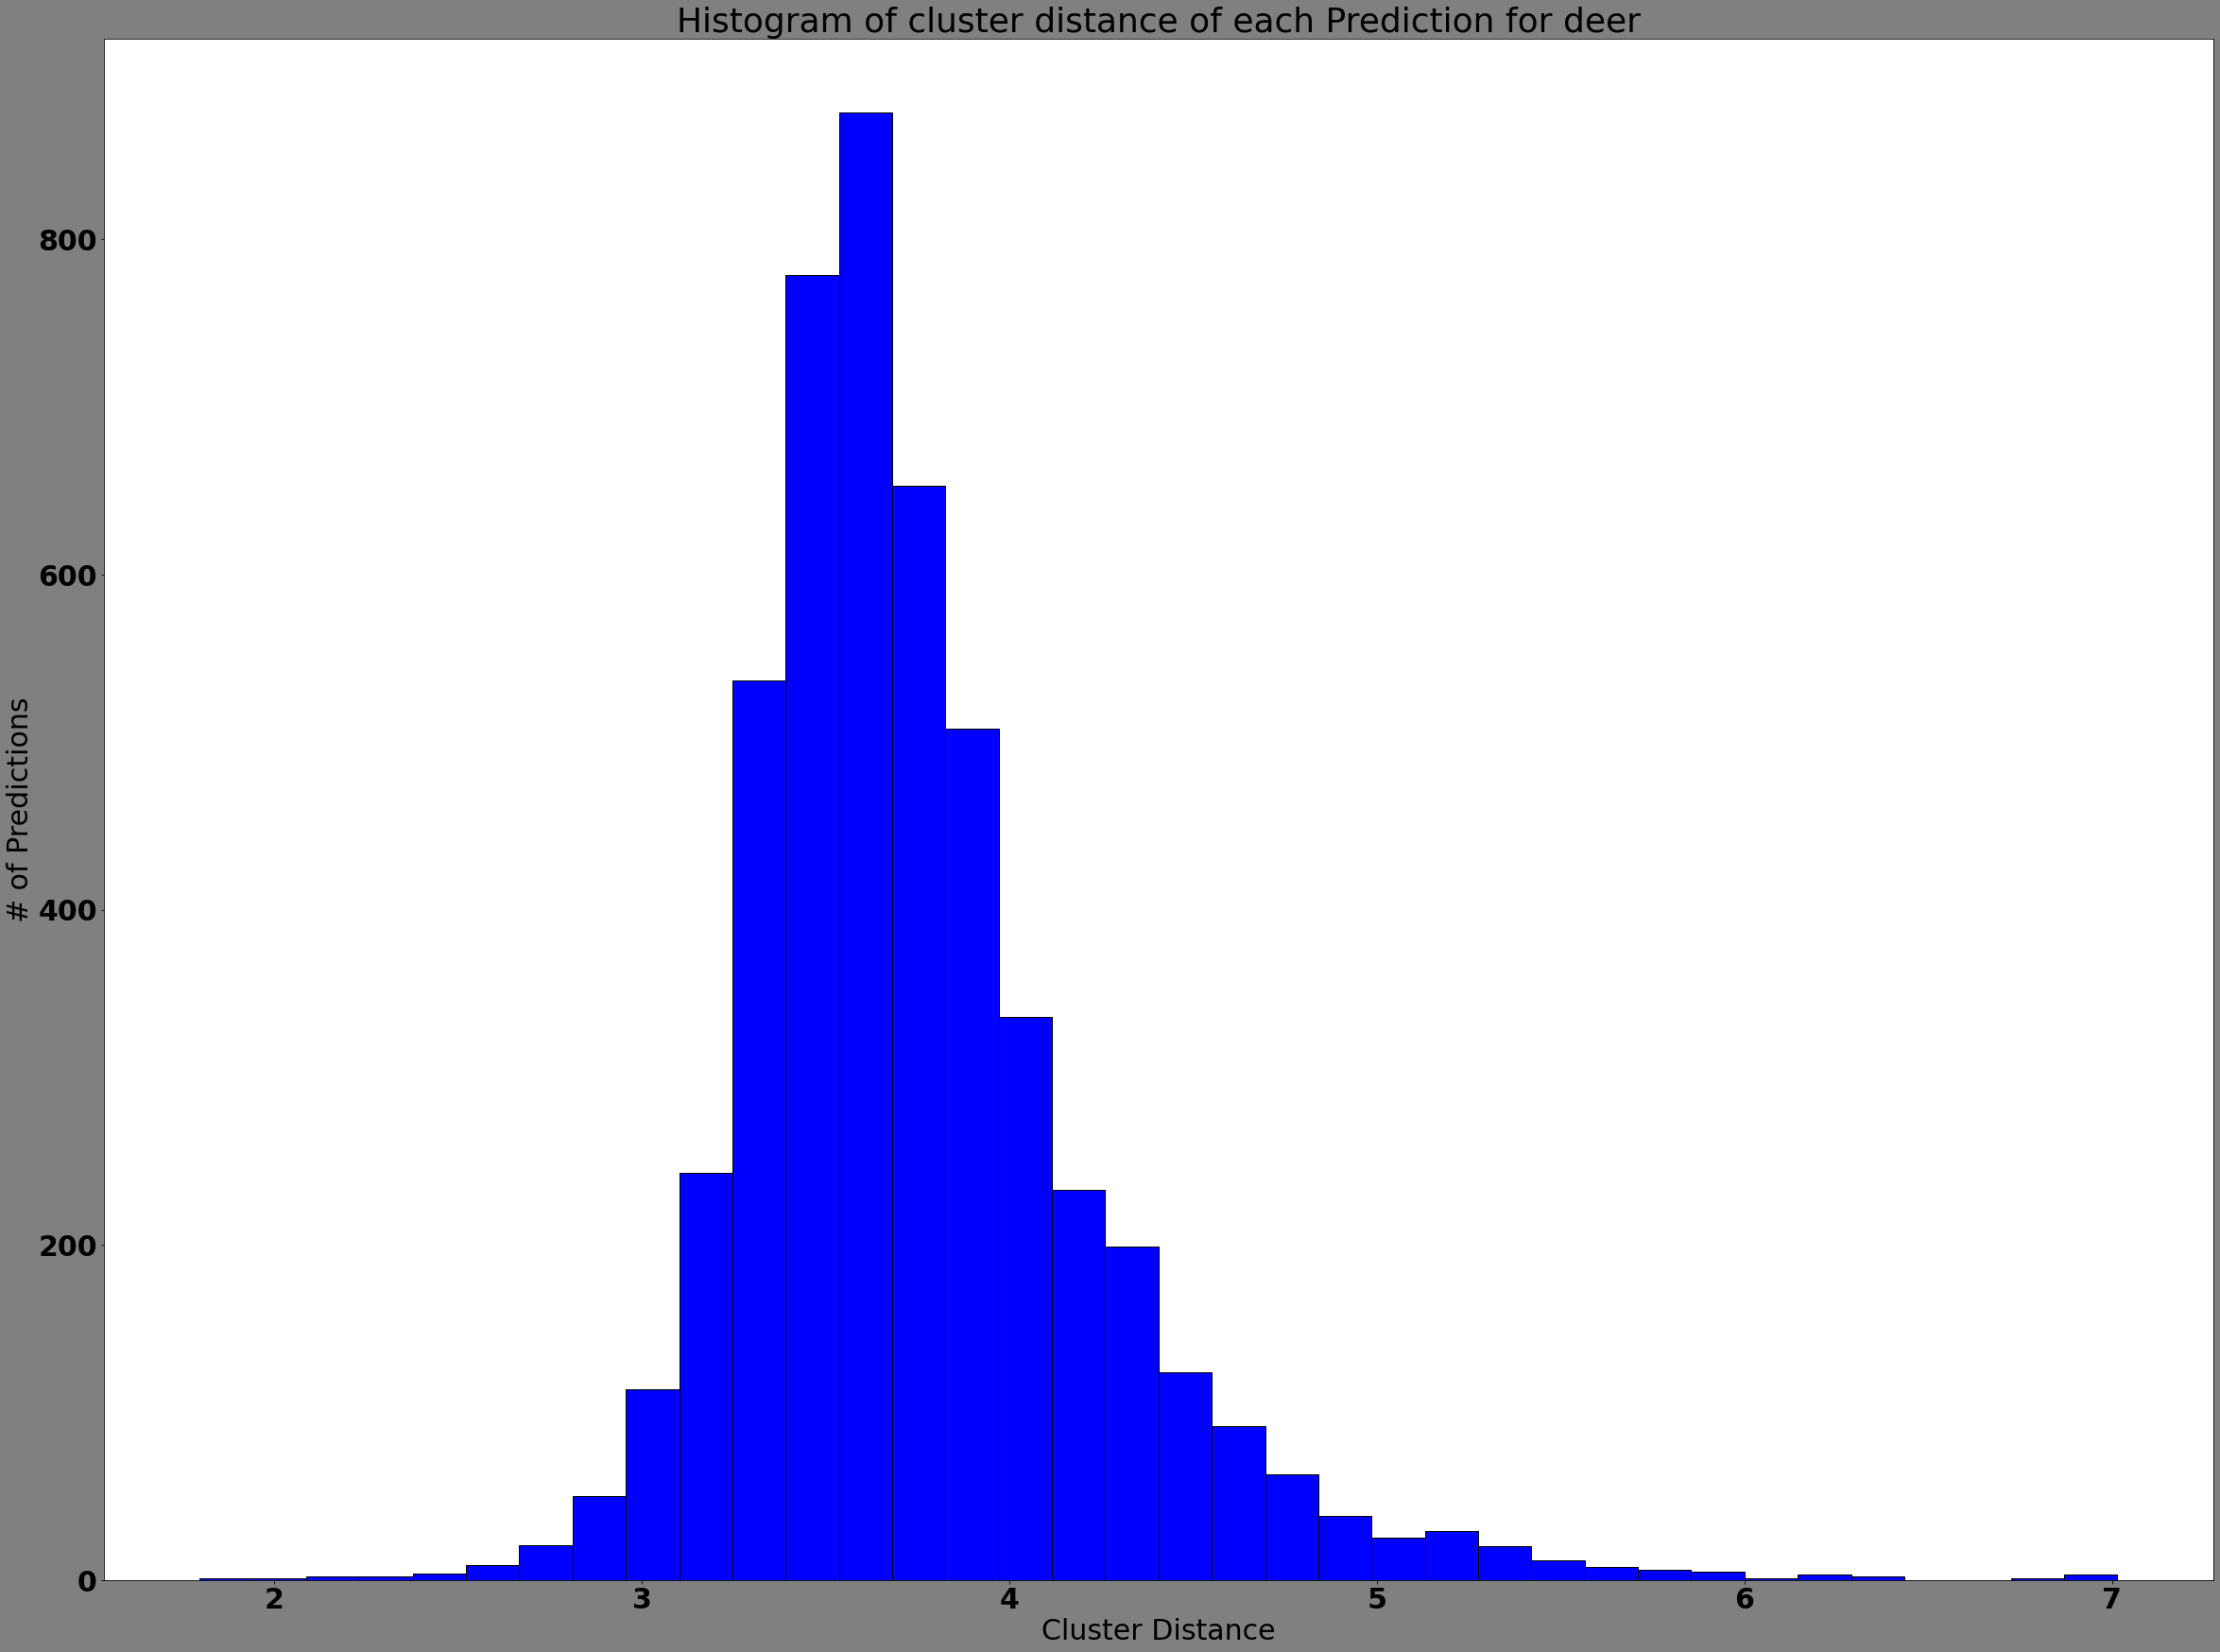

In [83]:
idx = 4
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 4.735657691955566
Variance: 0.31046971678733826
Standard Deviation: 0.5571981072425842


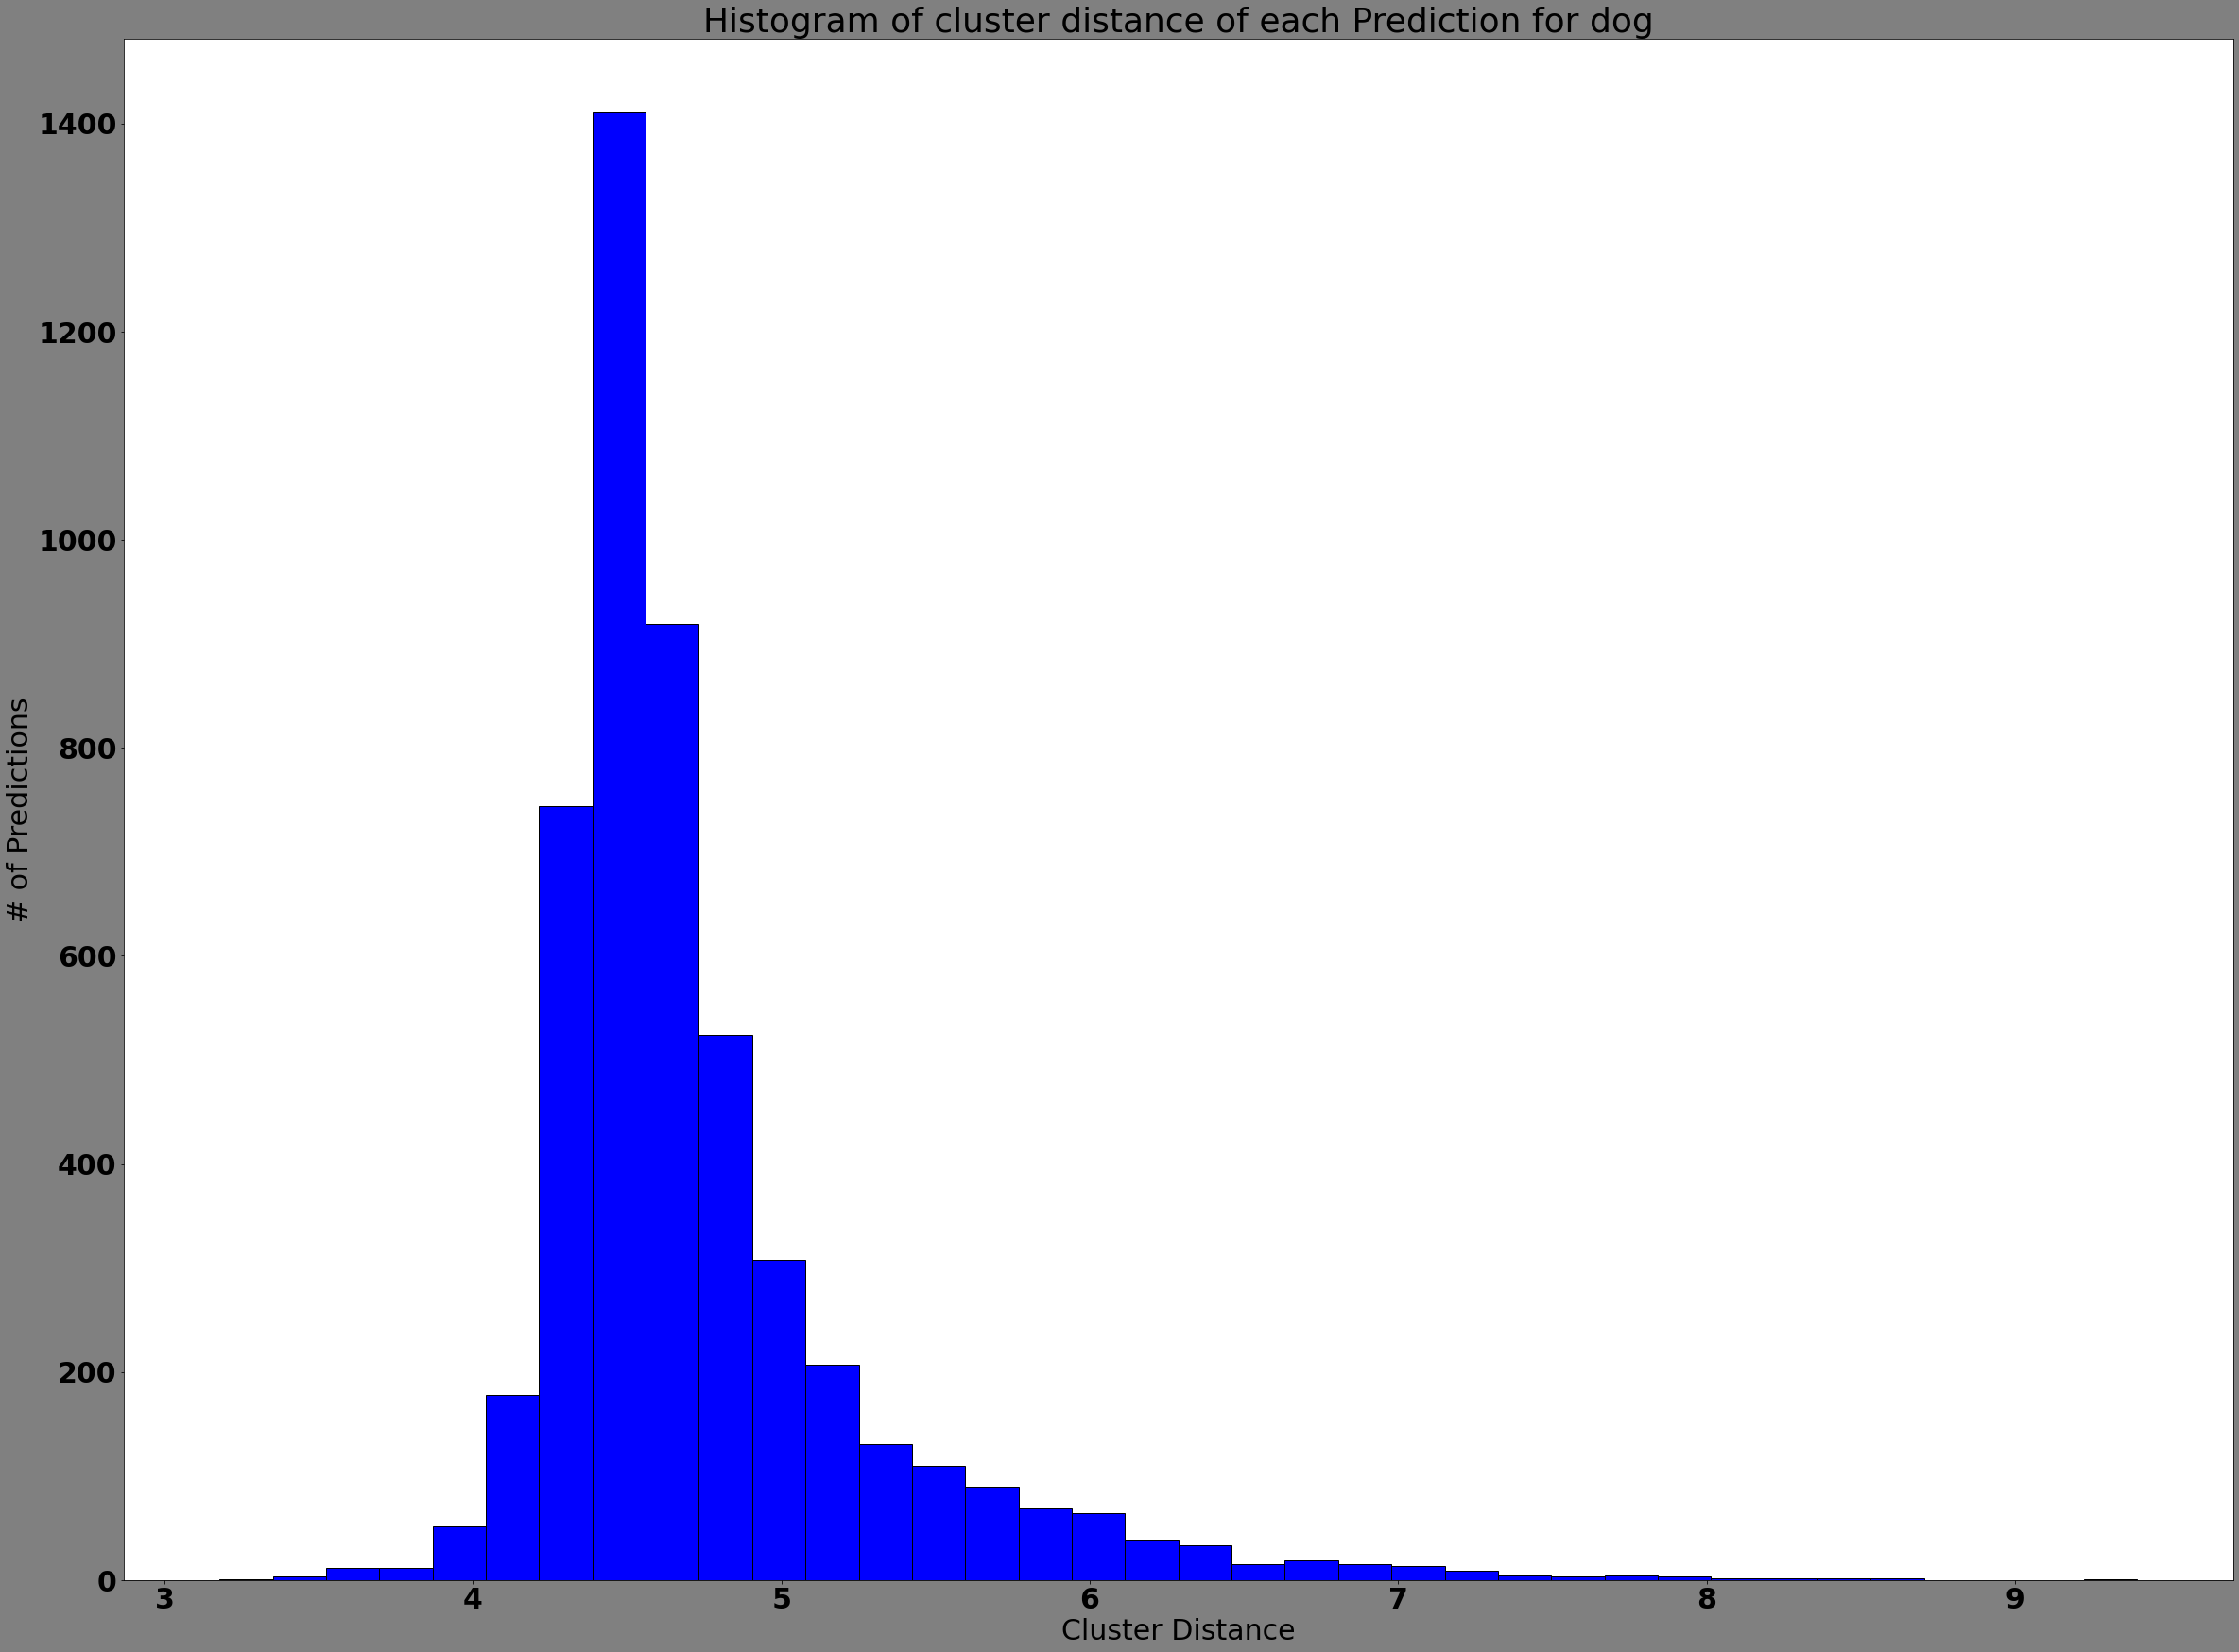

In [84]:
idx = 5
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 5.0136189460754395
Variance: 0.5160956382751465
Standard Deviation: 0.7183979749679565


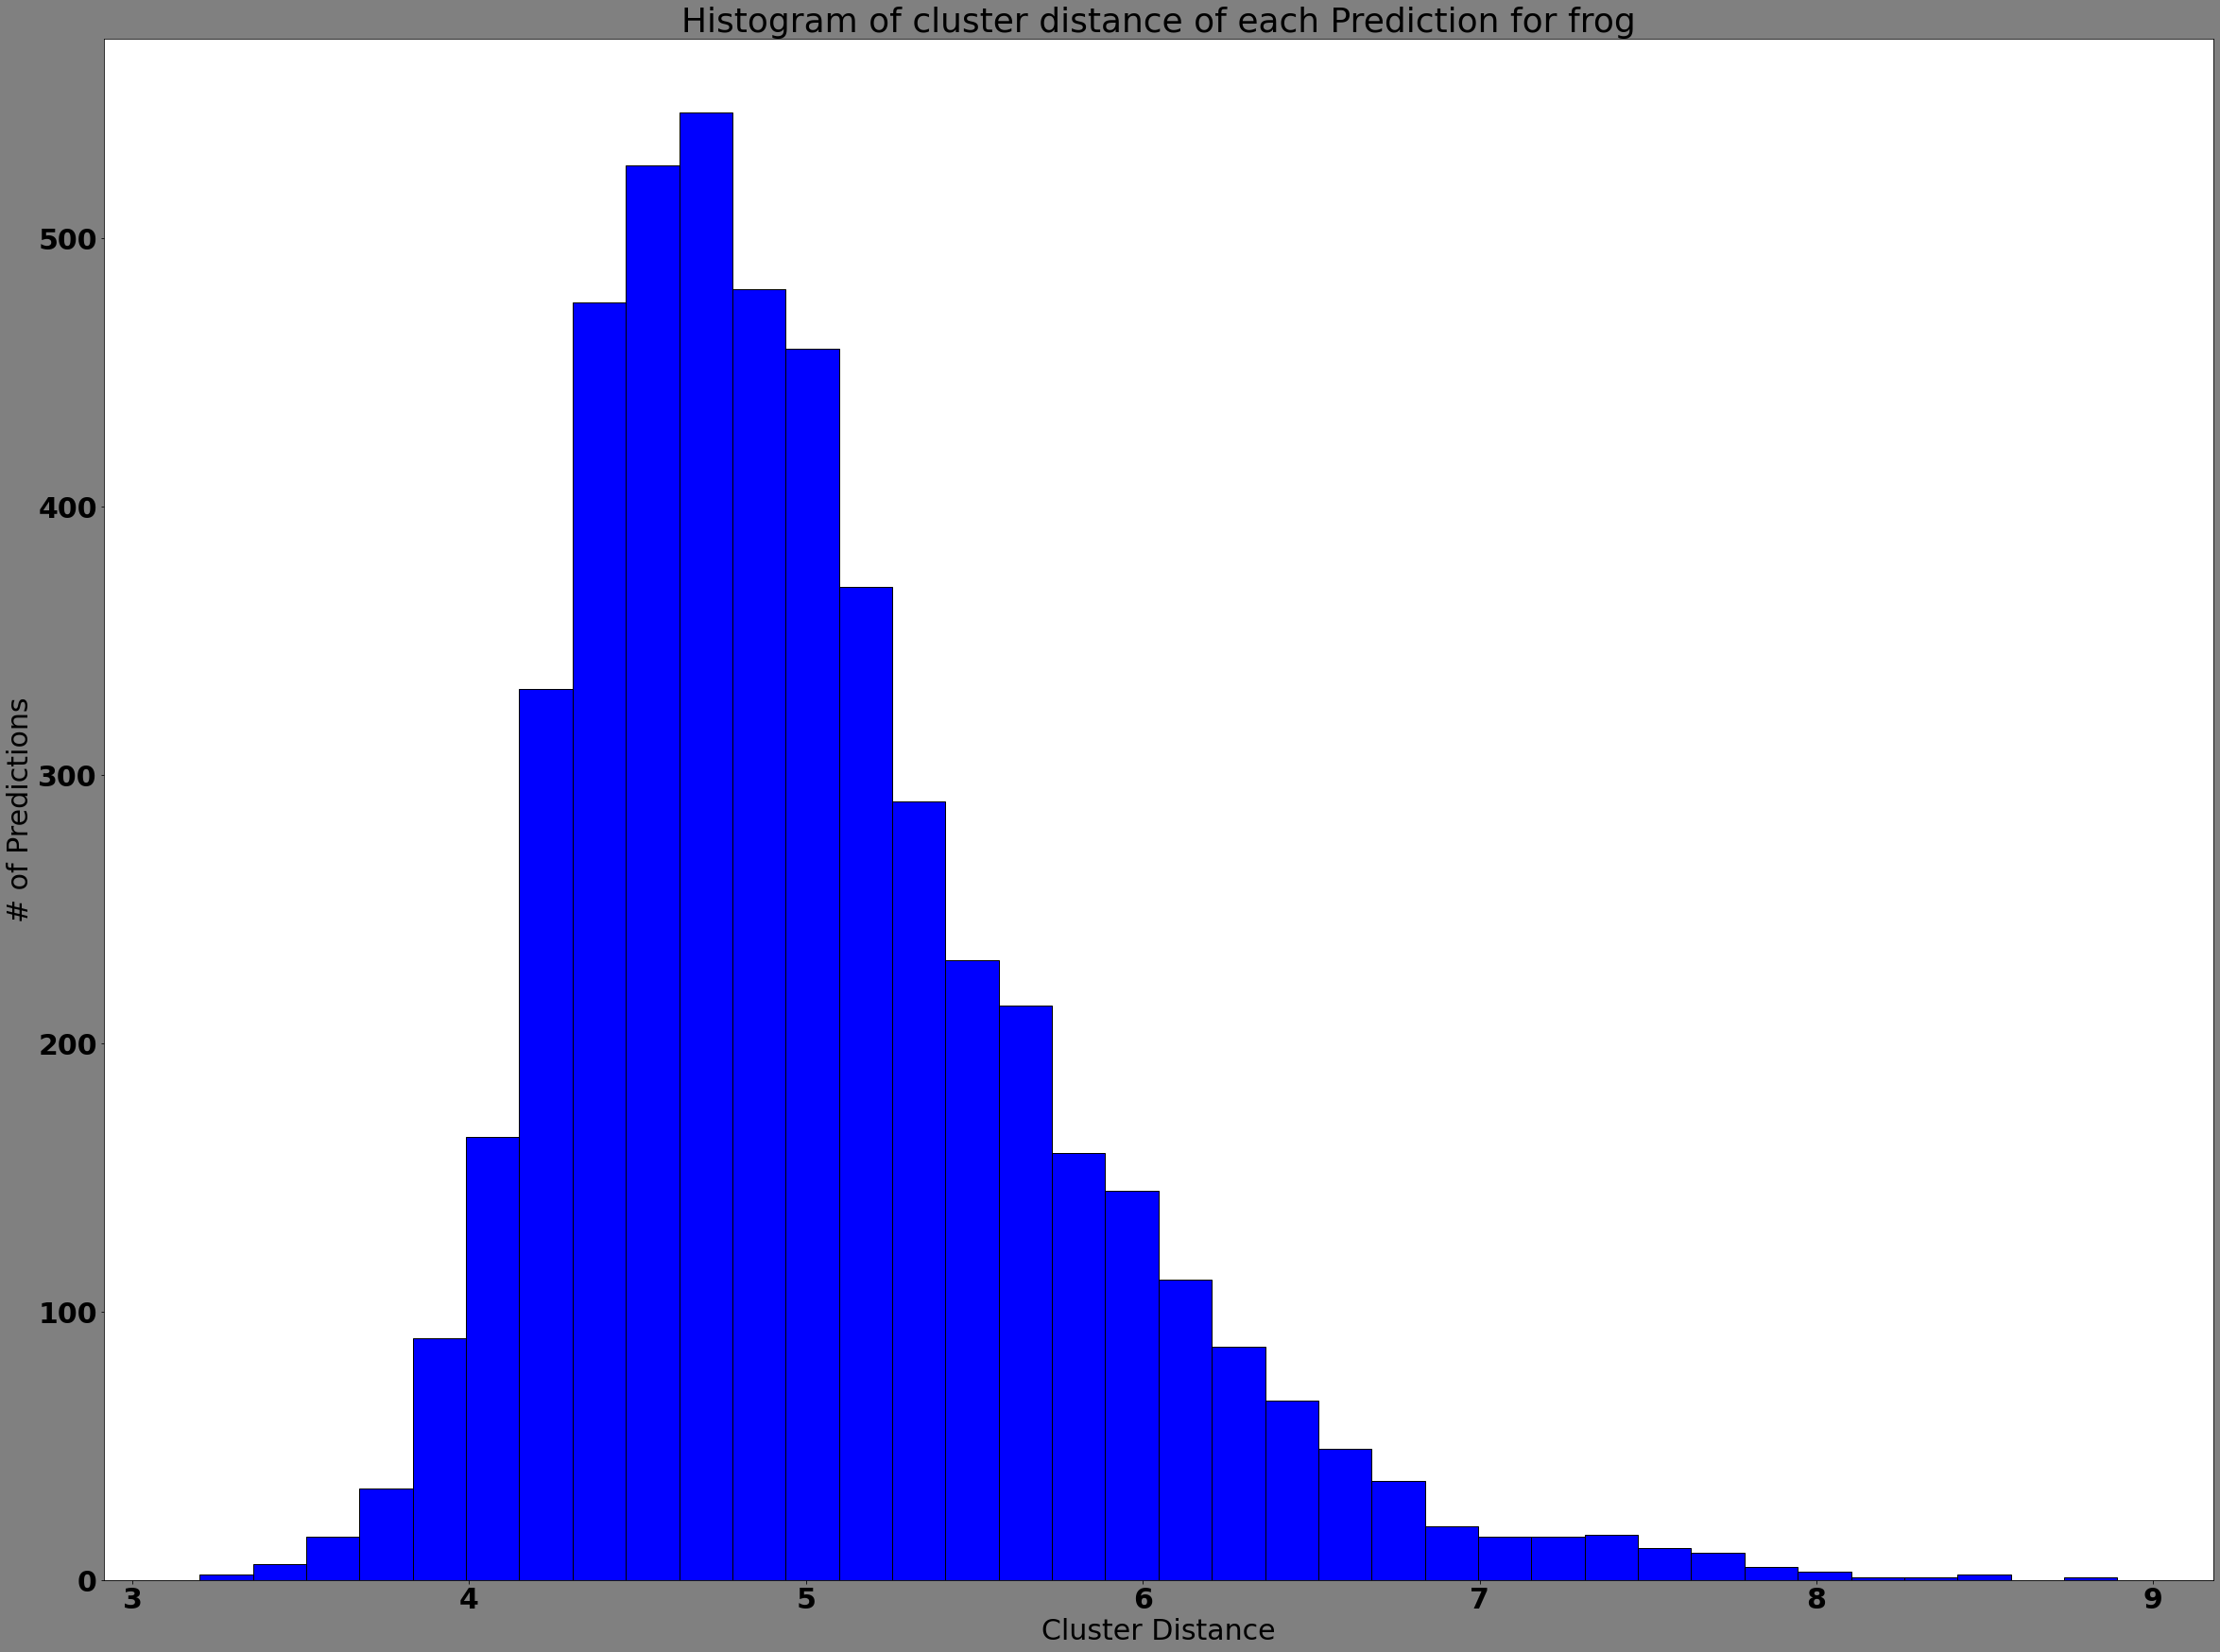

In [85]:
idx = 6
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 5.0136189460754395
Variance: 0.5160956382751465
Standard Deviation: 0.7183979749679565


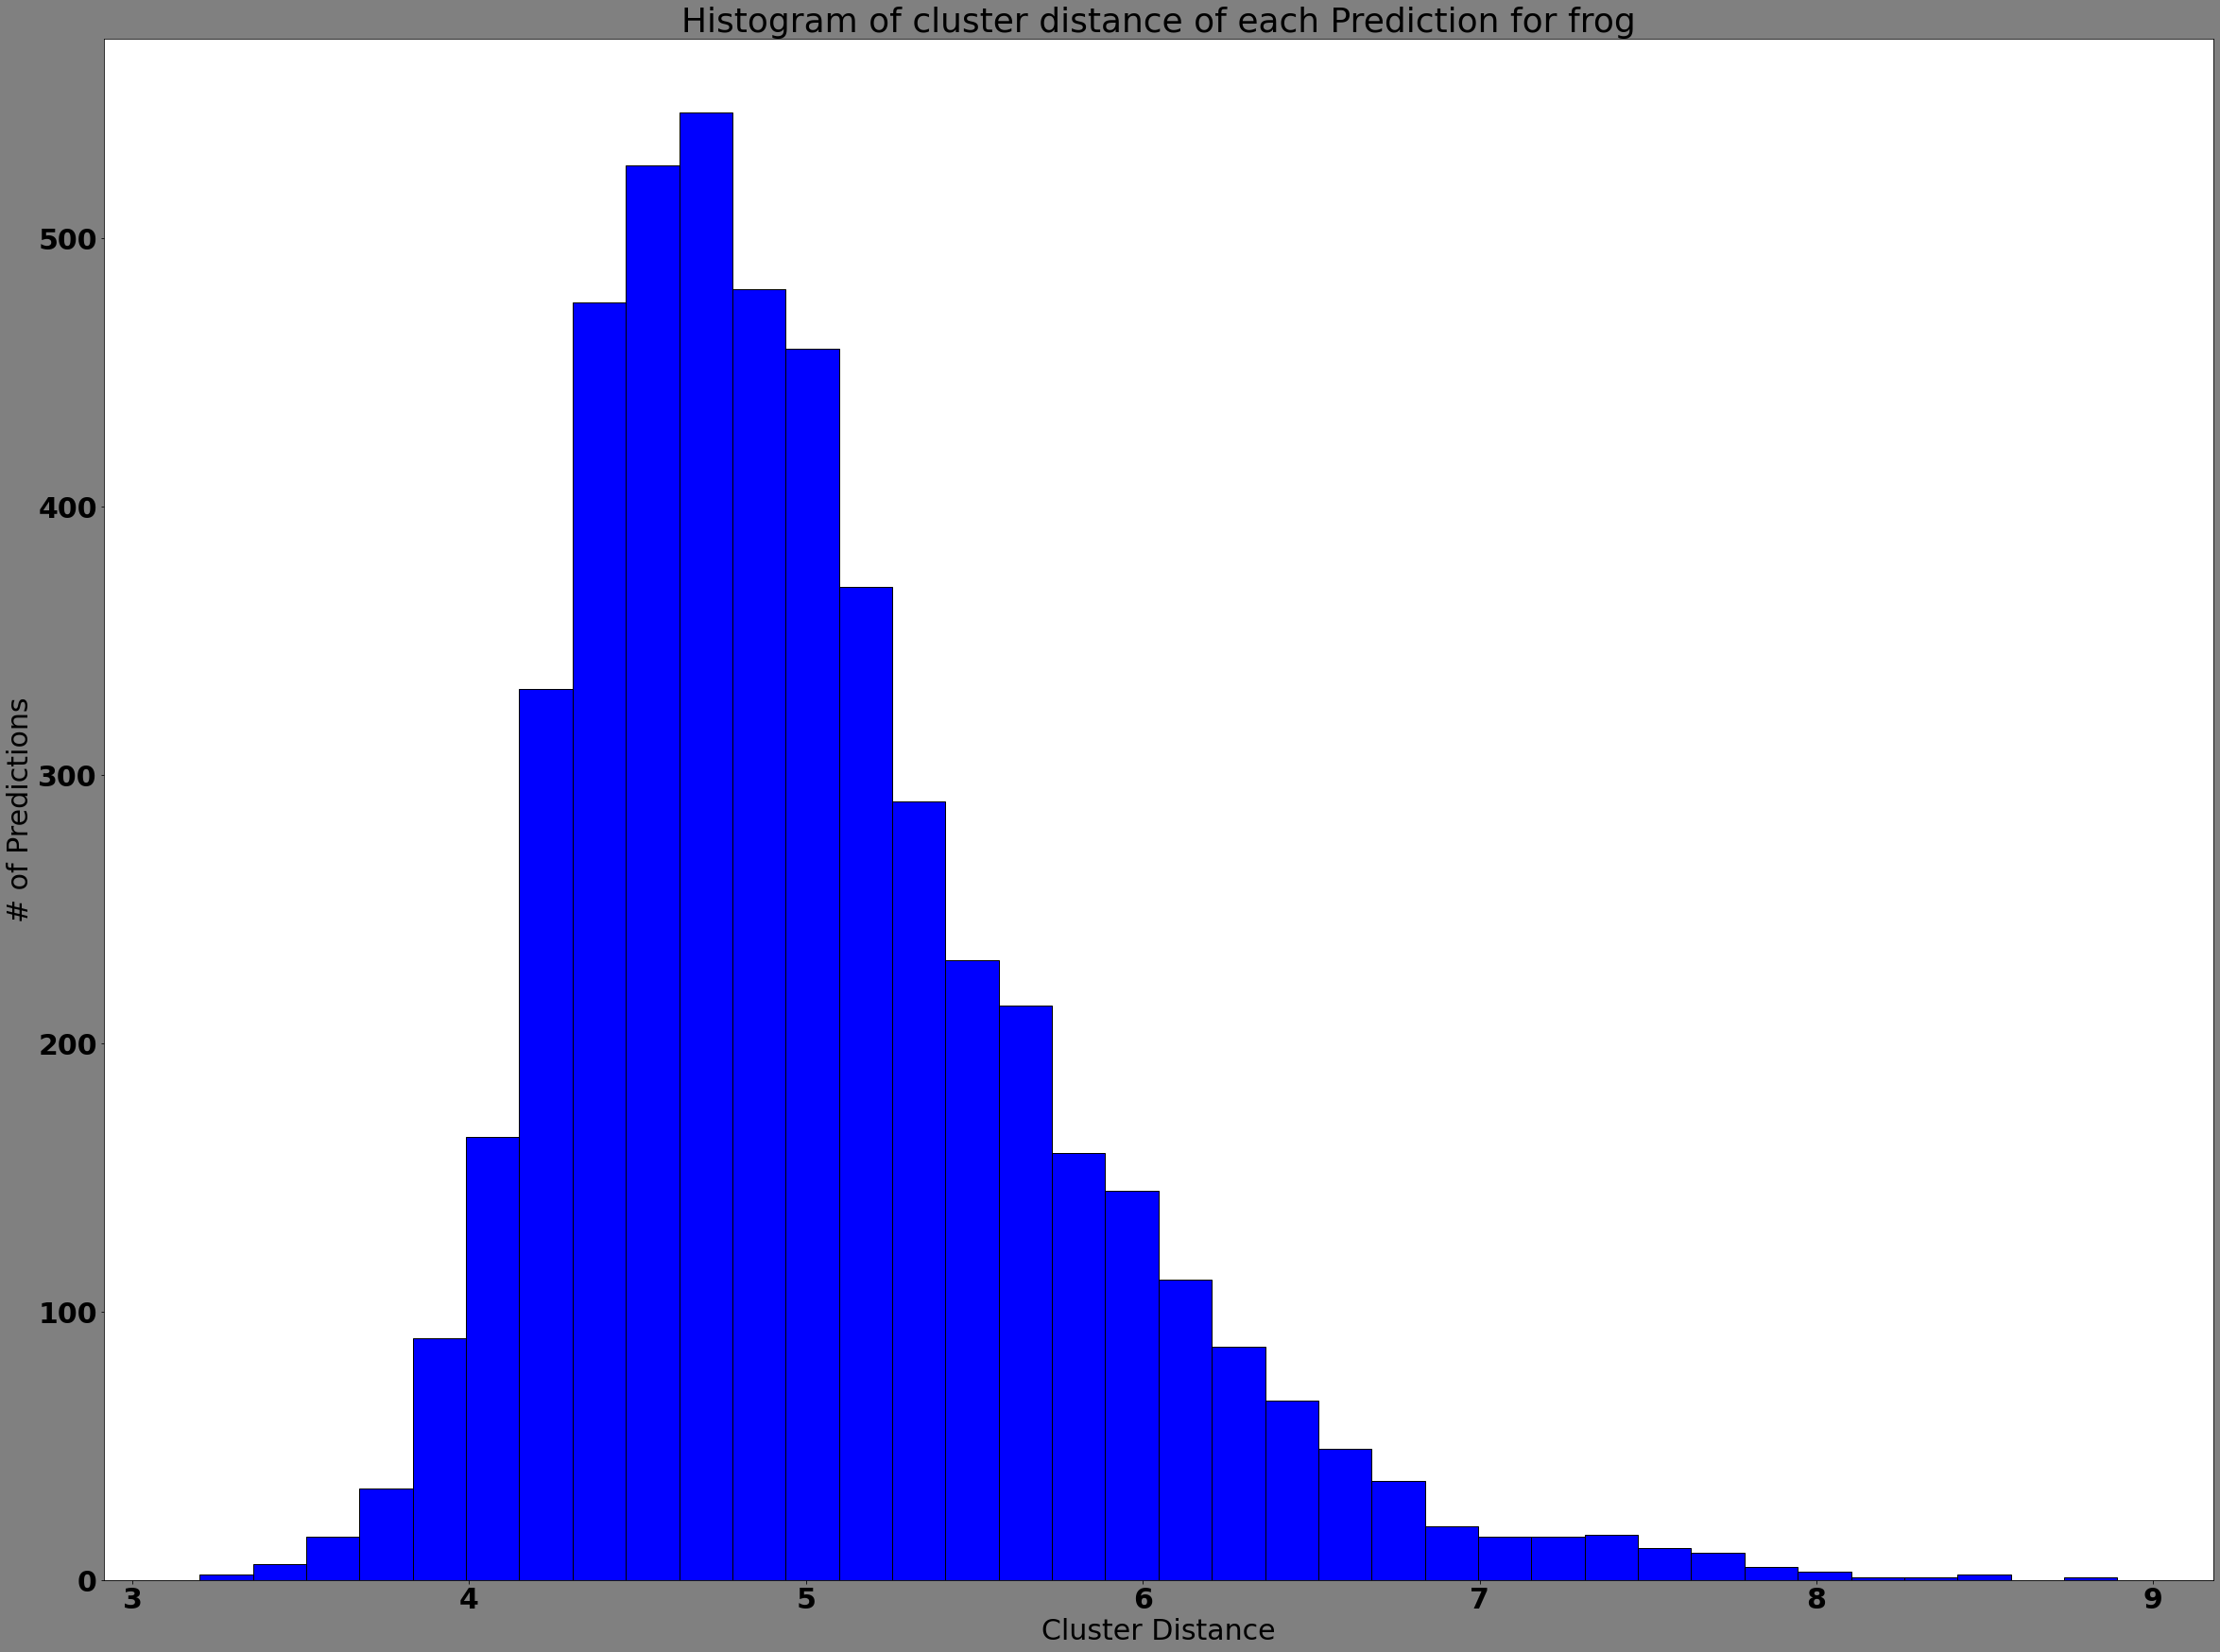

In [86]:
idx = 6
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 4.325523853302002
Variance: 0.7634662985801697
Standard Deviation: 0.8737655878067017


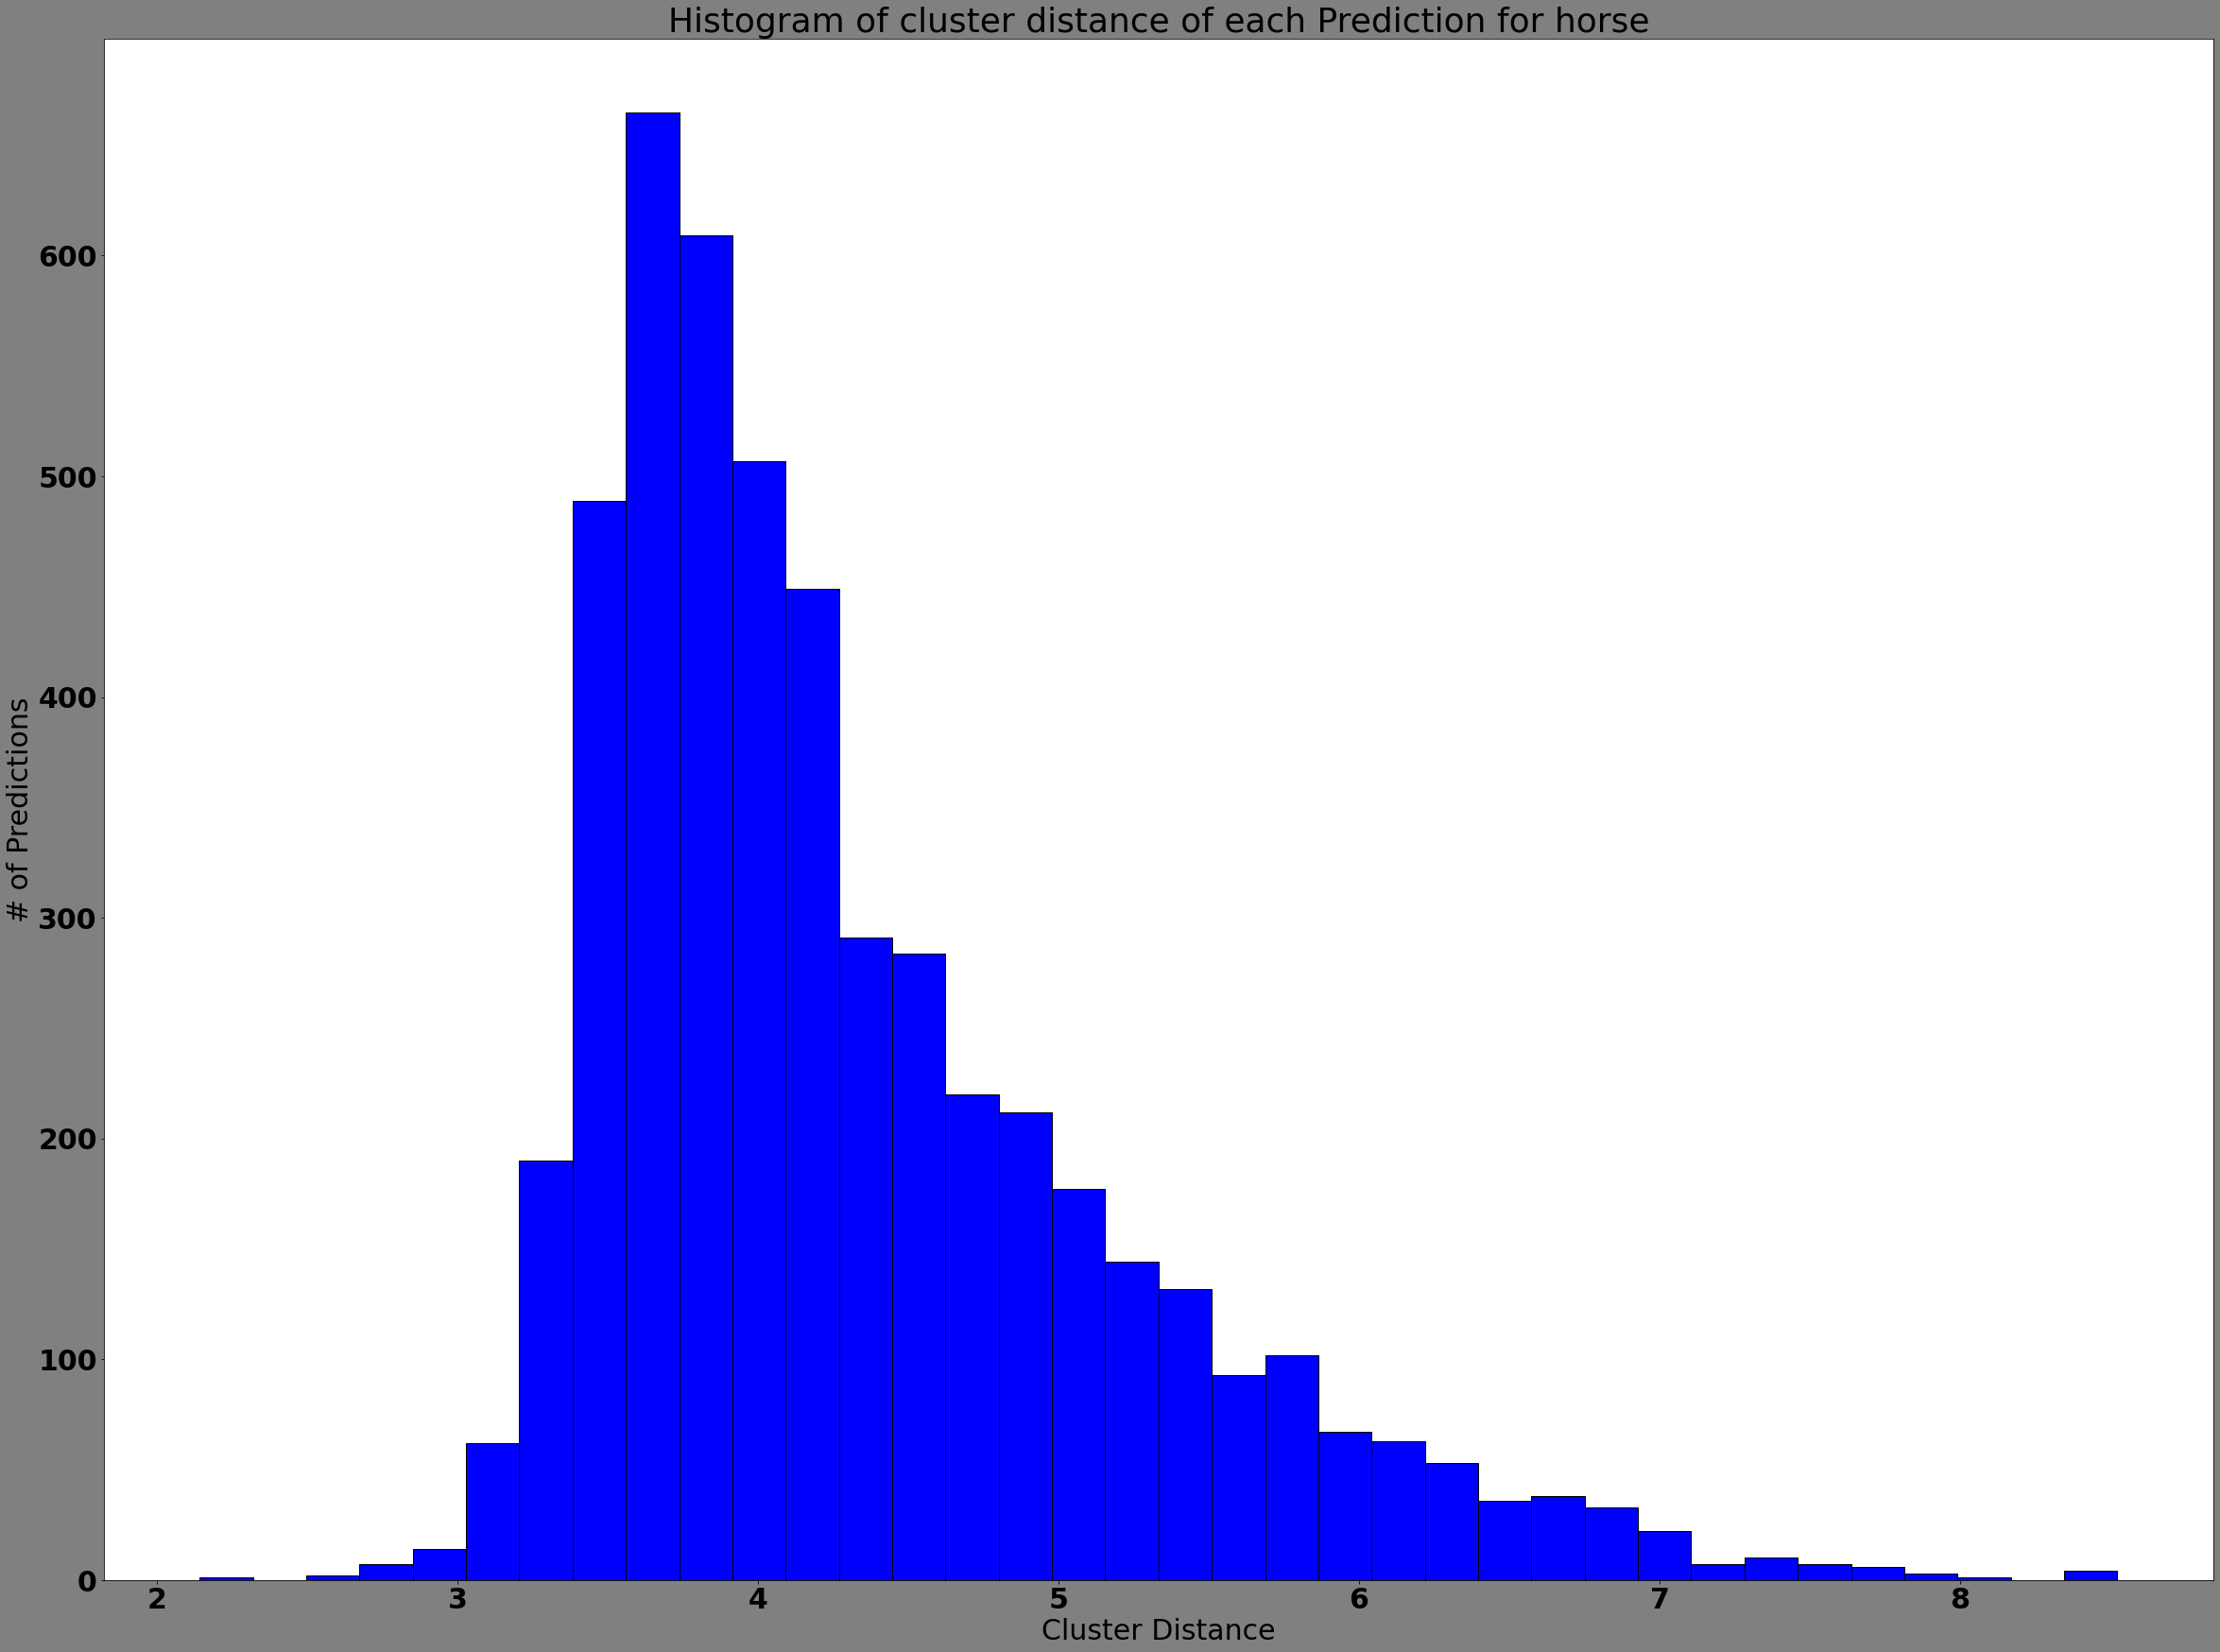

In [87]:
idx = 7
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 3.5174083709716797
Variance: 1.2666584253311157
Standard Deviation: 1.1254591941833496


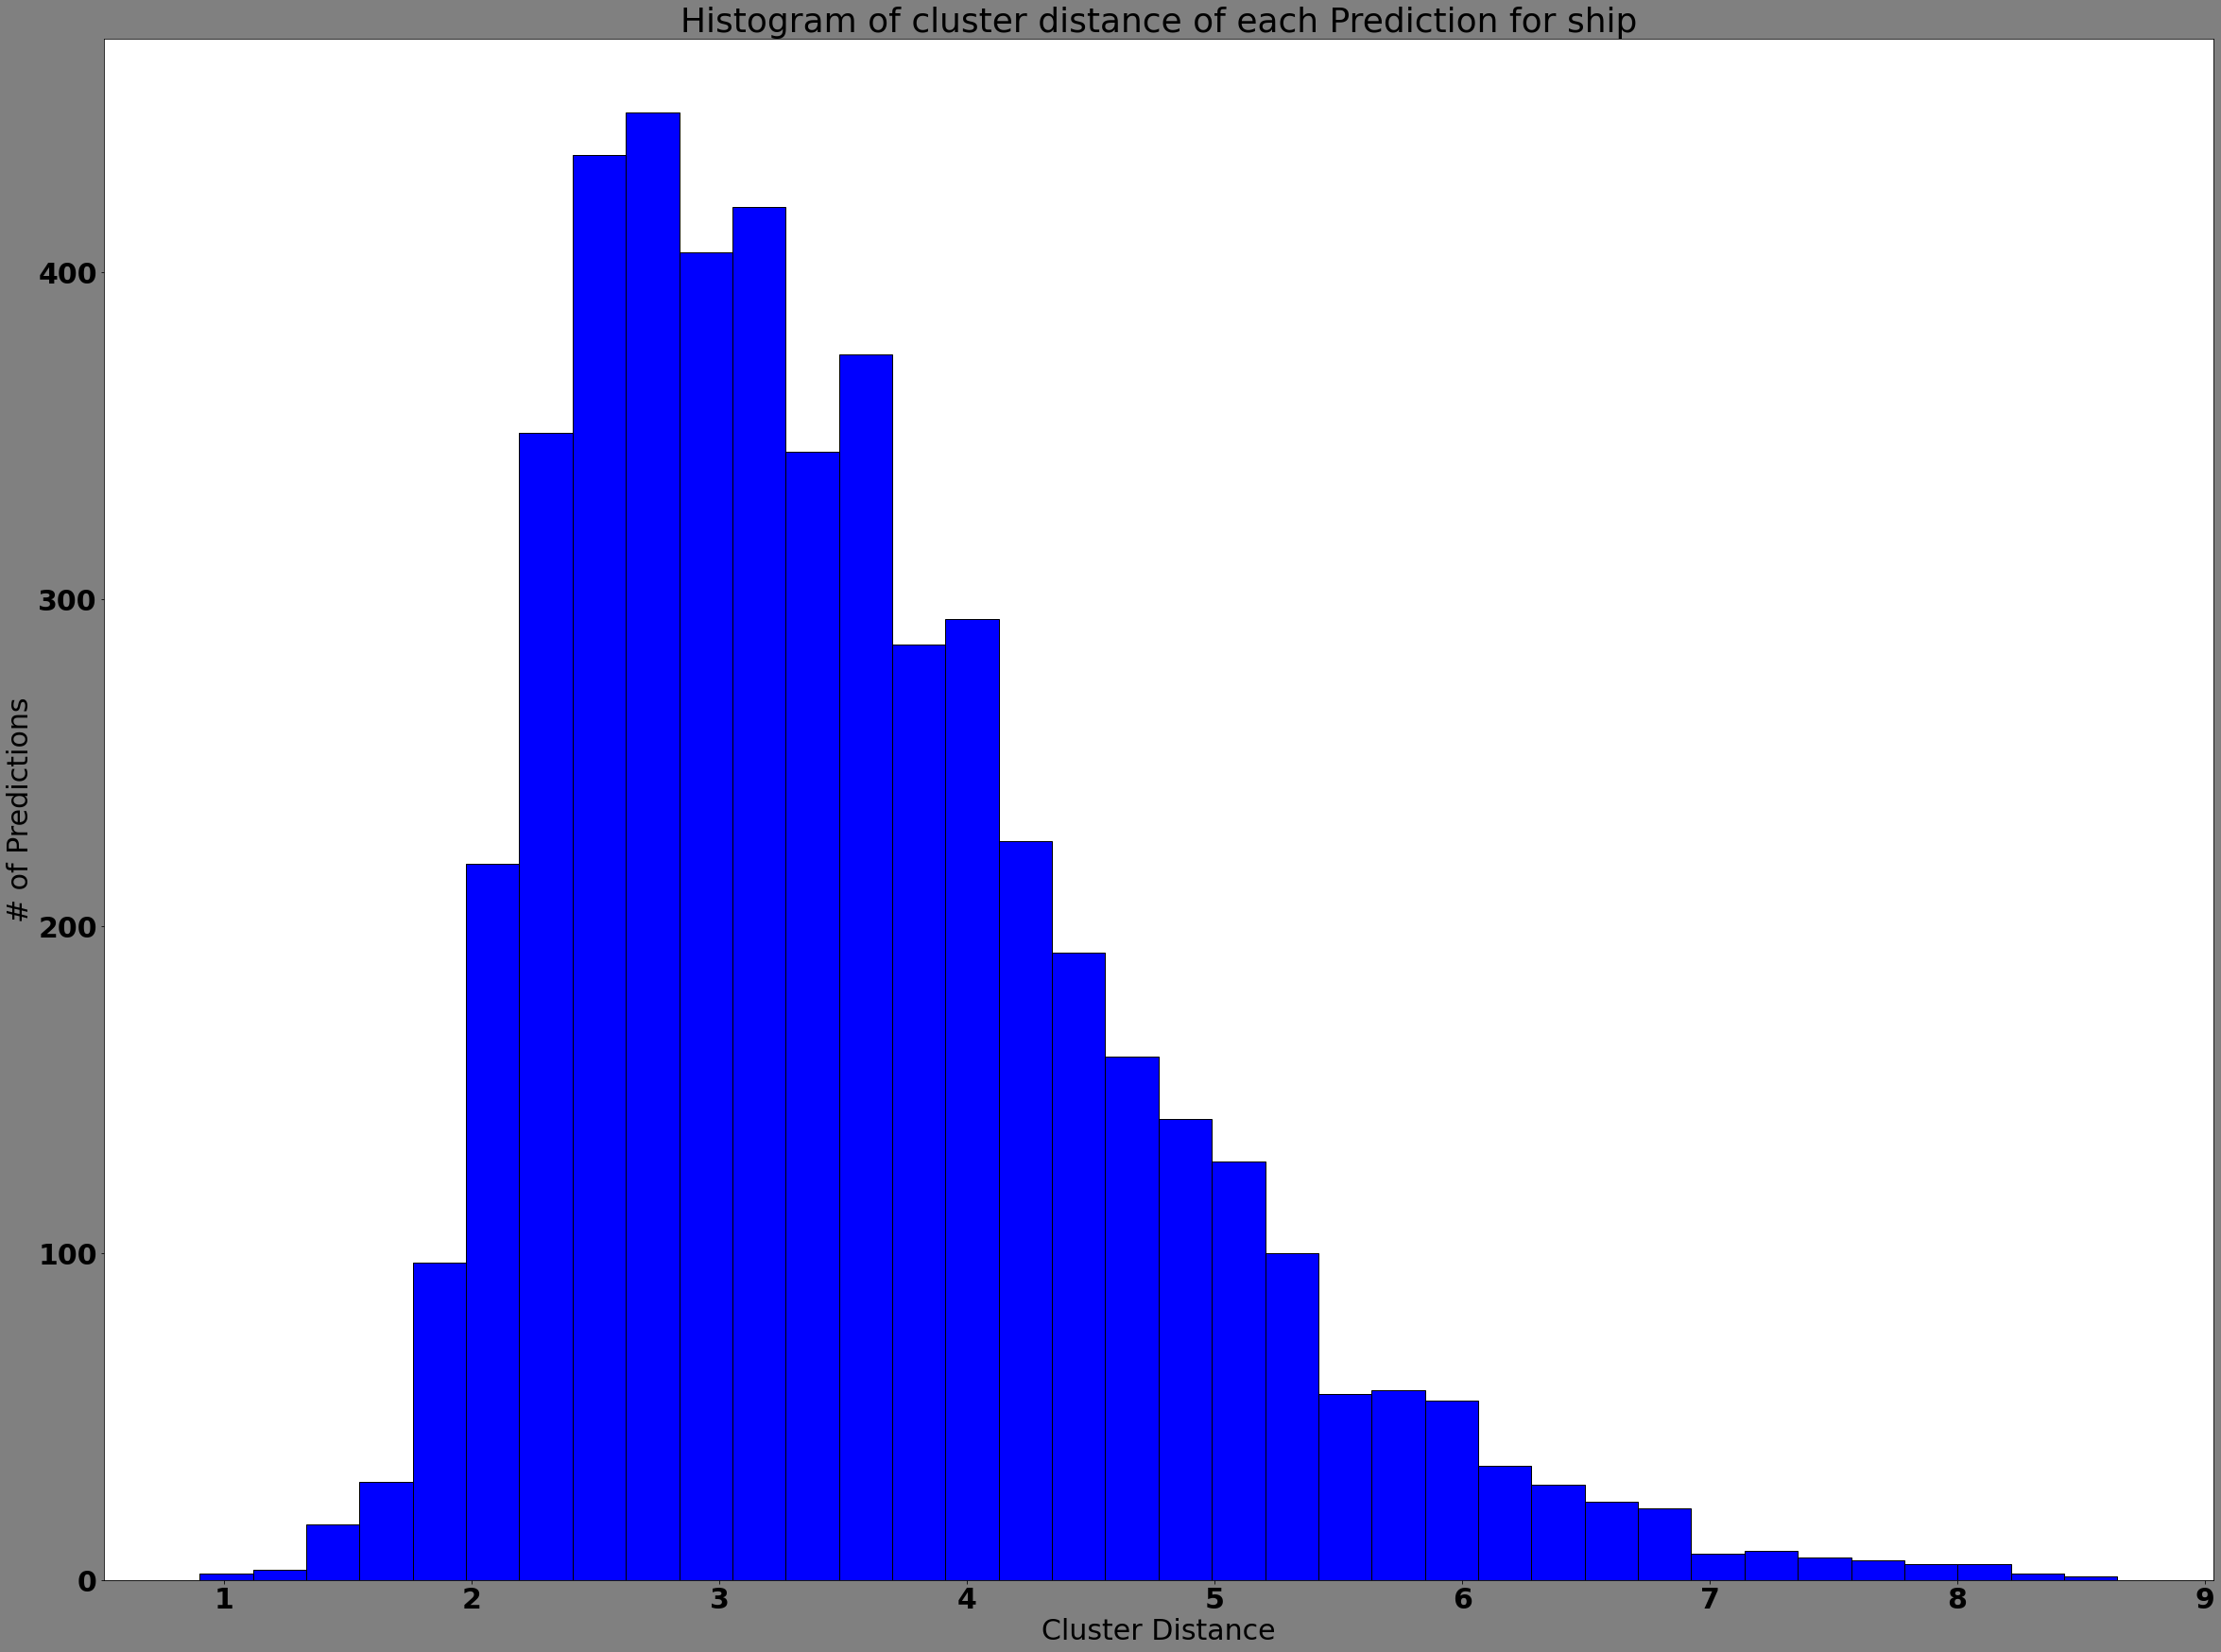

In [88]:
idx = 8
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

Mean: 5.468410491943359
Variance: 2.555562973022461
Standard Deviation: 1.5986127853393555


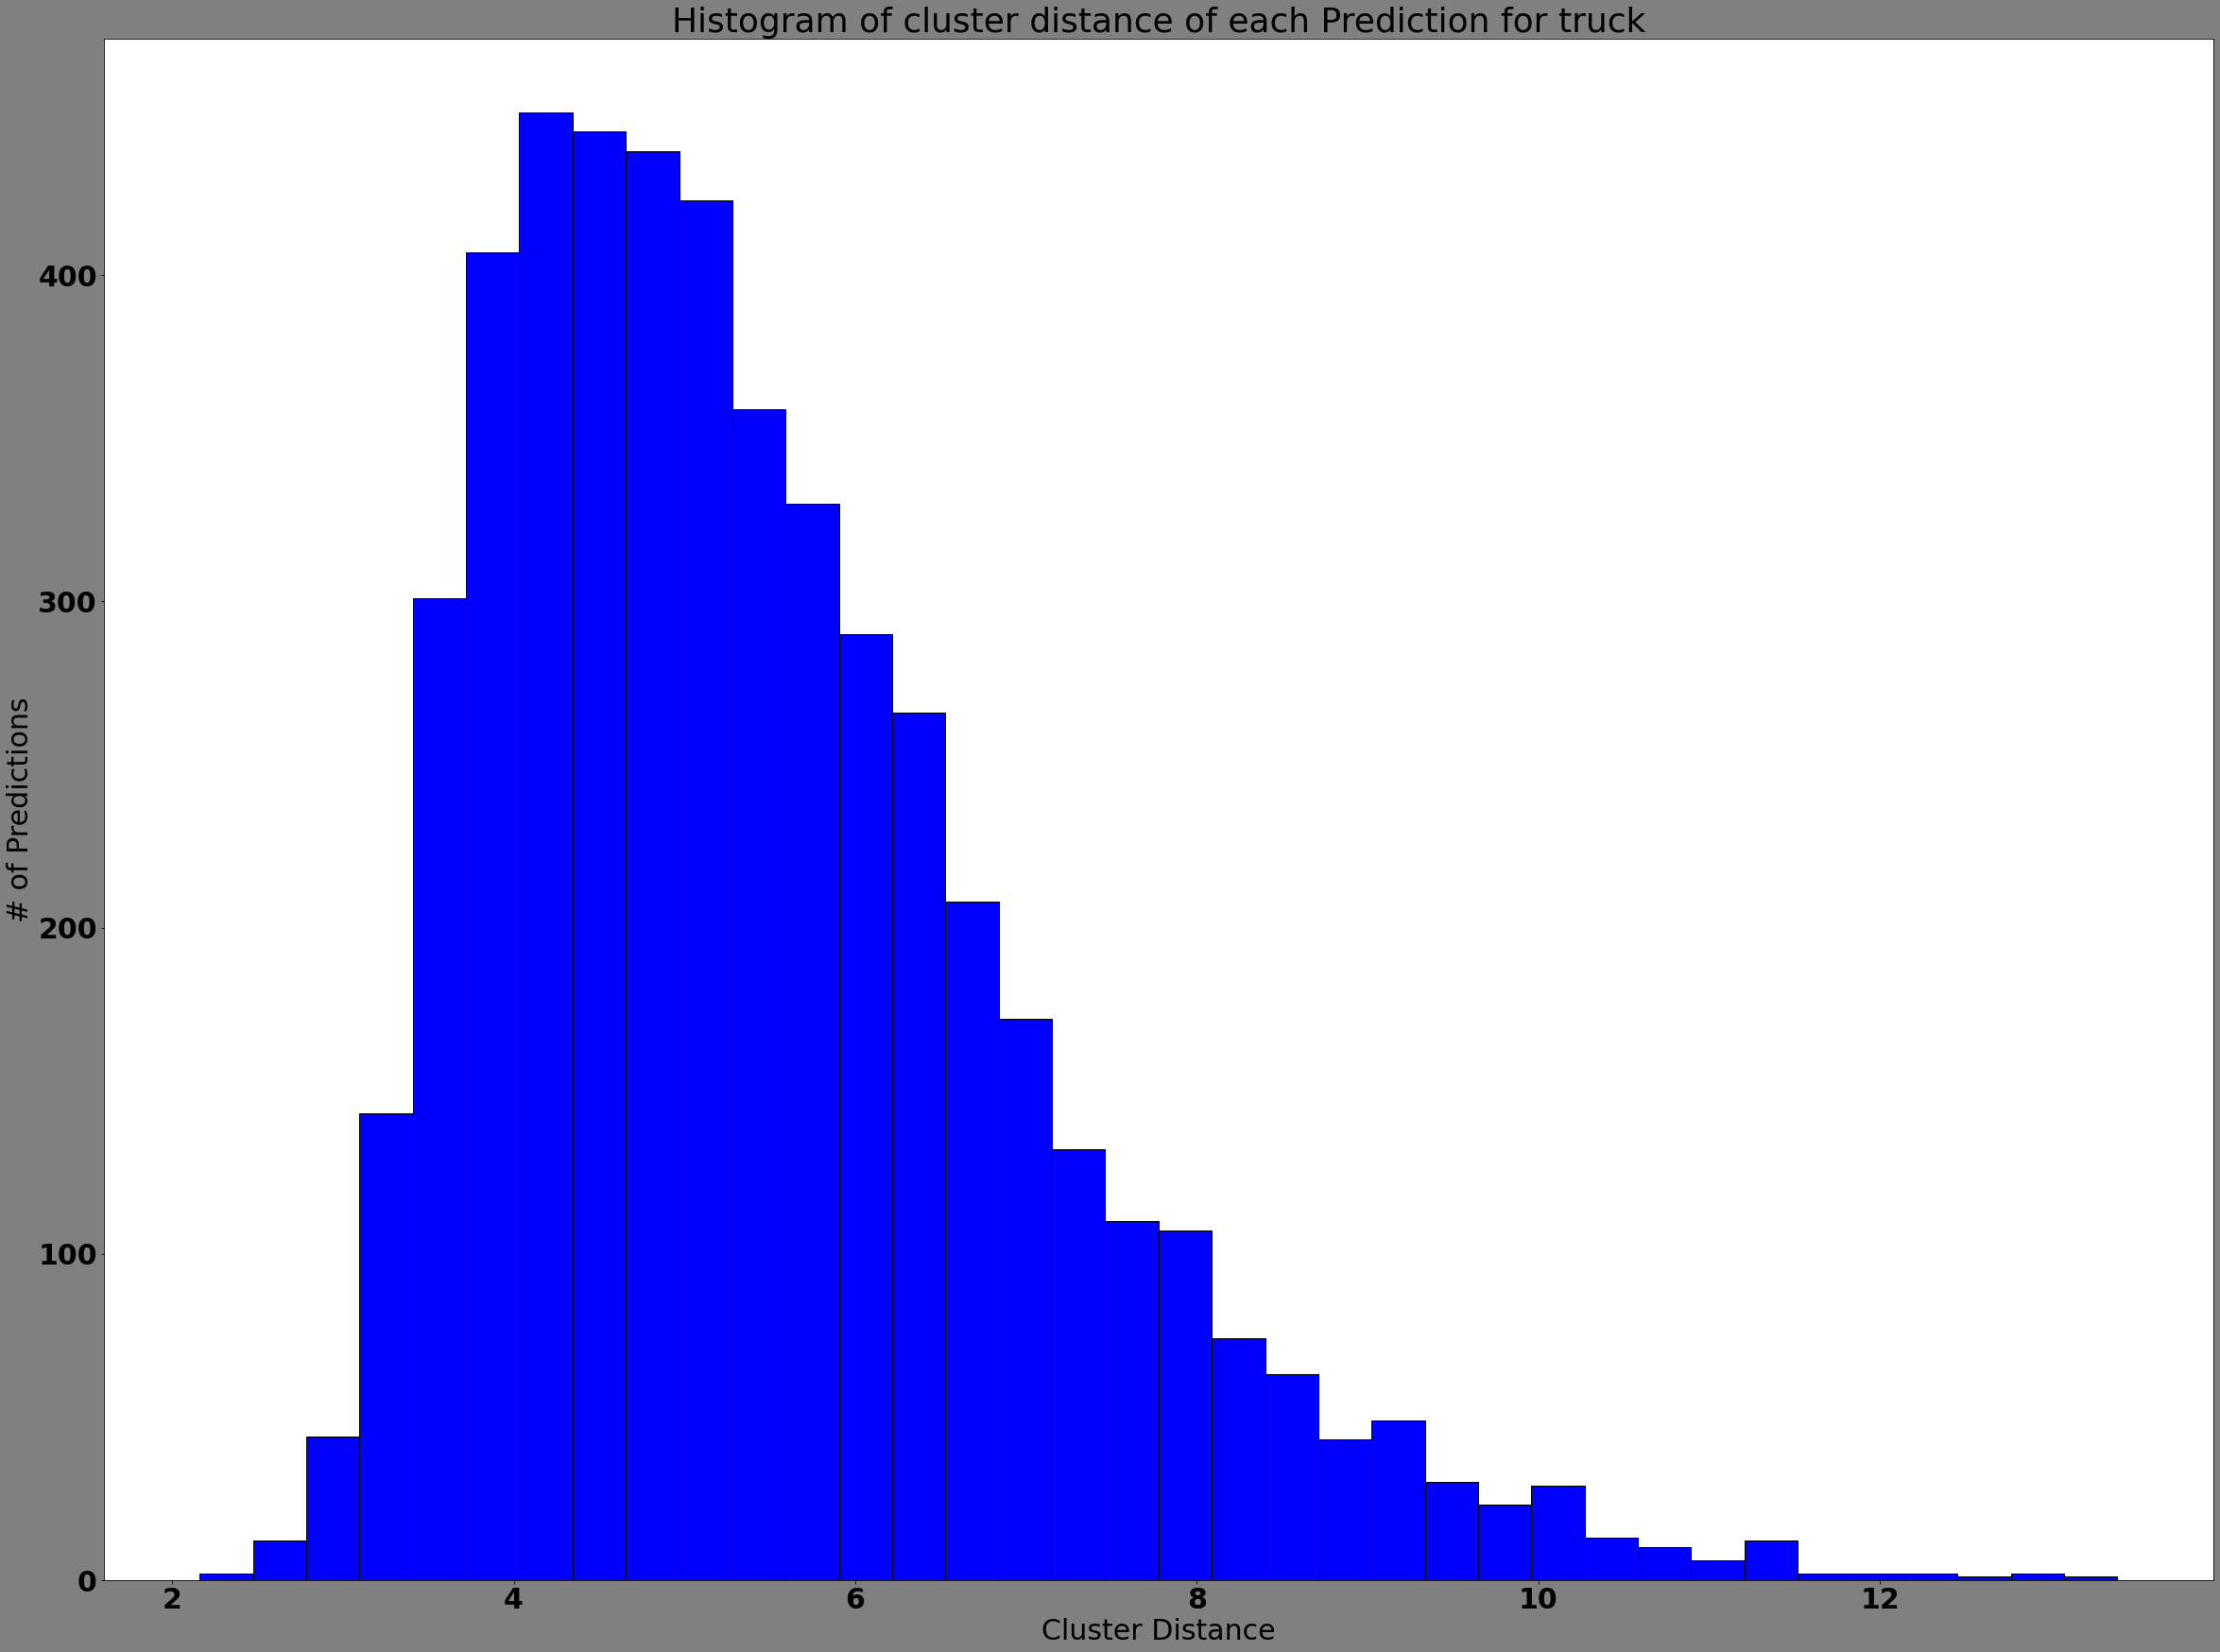

In [89]:
idx = 9
c = returnClassIndex(trainY,idx)
vals = k.transform(f[c])
plot_class_pdf(vals[:,idx], idx)

In [90]:
def plot_class_pdf(vals, title):
    font = {'family' : 'sans',
            'weight' : 'bold',
            'size'   : 30}
    matplotlib.rc('font', **font)
    print("Mean: {}".format(stat.mean(vals)))
    print("Variance: {}".format(np.var(vals)))
    print("Standard Deviation: {}".format(np.std(vals)))
    plt.figure( figsize = (40, 30), facecolor = 'gray')
    plt.hist(vals, color = 'blue', edgecolor = 'black',
             bins = int(180))
    plt.title(title)
    plt.xlabel('Cluster Distance')
    plt.ylabel('# of Predictions')
    #plt.set_facecolor('gray')
    plt.show()

In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def stackResize(imgs):
    l = []
    for i in tqdm(range(imgs.shape[0])):
        img = imgs[i]
        img = np.stack((img,)*3, axis = -1)
        img = cv2.resize(src = img, dsize = (32,32), interpolation = cv2.INTER_AREA)
        l.append(img)
    return np.array(l)
def loadPreprocess1():
    ### Load In Data
    (trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()
    trainY = tf.keras.utils.to_categorical(trainY)
    testY = tf.keras.utils.to_categorical(testY)
    trainX = stackResize(trainX)
    testX = stackResize(testX)
    return [trainX/255, trainY, testX/255, testY]

fashtrainX, fashtrainY, fashtestX, fashtestY = loadPreprocess1()

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 23081.10it/s]


In [92]:
fash_feature = extractor.predict(fashtrainX , verbose = 1)
cluster_distances = k.transform(fash_feature)
l  = np.amin(cluster_distances, axis = 1)
    

60000/60000 [==============================] - 35s 581us/sample


In [96]:
f.shape

(50000, 128)

In [97]:
fash_feature.shape

(60000, 128)

In [102]:
np.vstack((f,fash_feature)).shape

(110000, 128)

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
db.fit(np.vstack((f,fash_feature)))

60000/60000 [==============================] - 13s 214us/sample
Mean: 0.6620051264762878
Variance: 0.05091344565153122
Standard Deviation: 0.22564007341861725


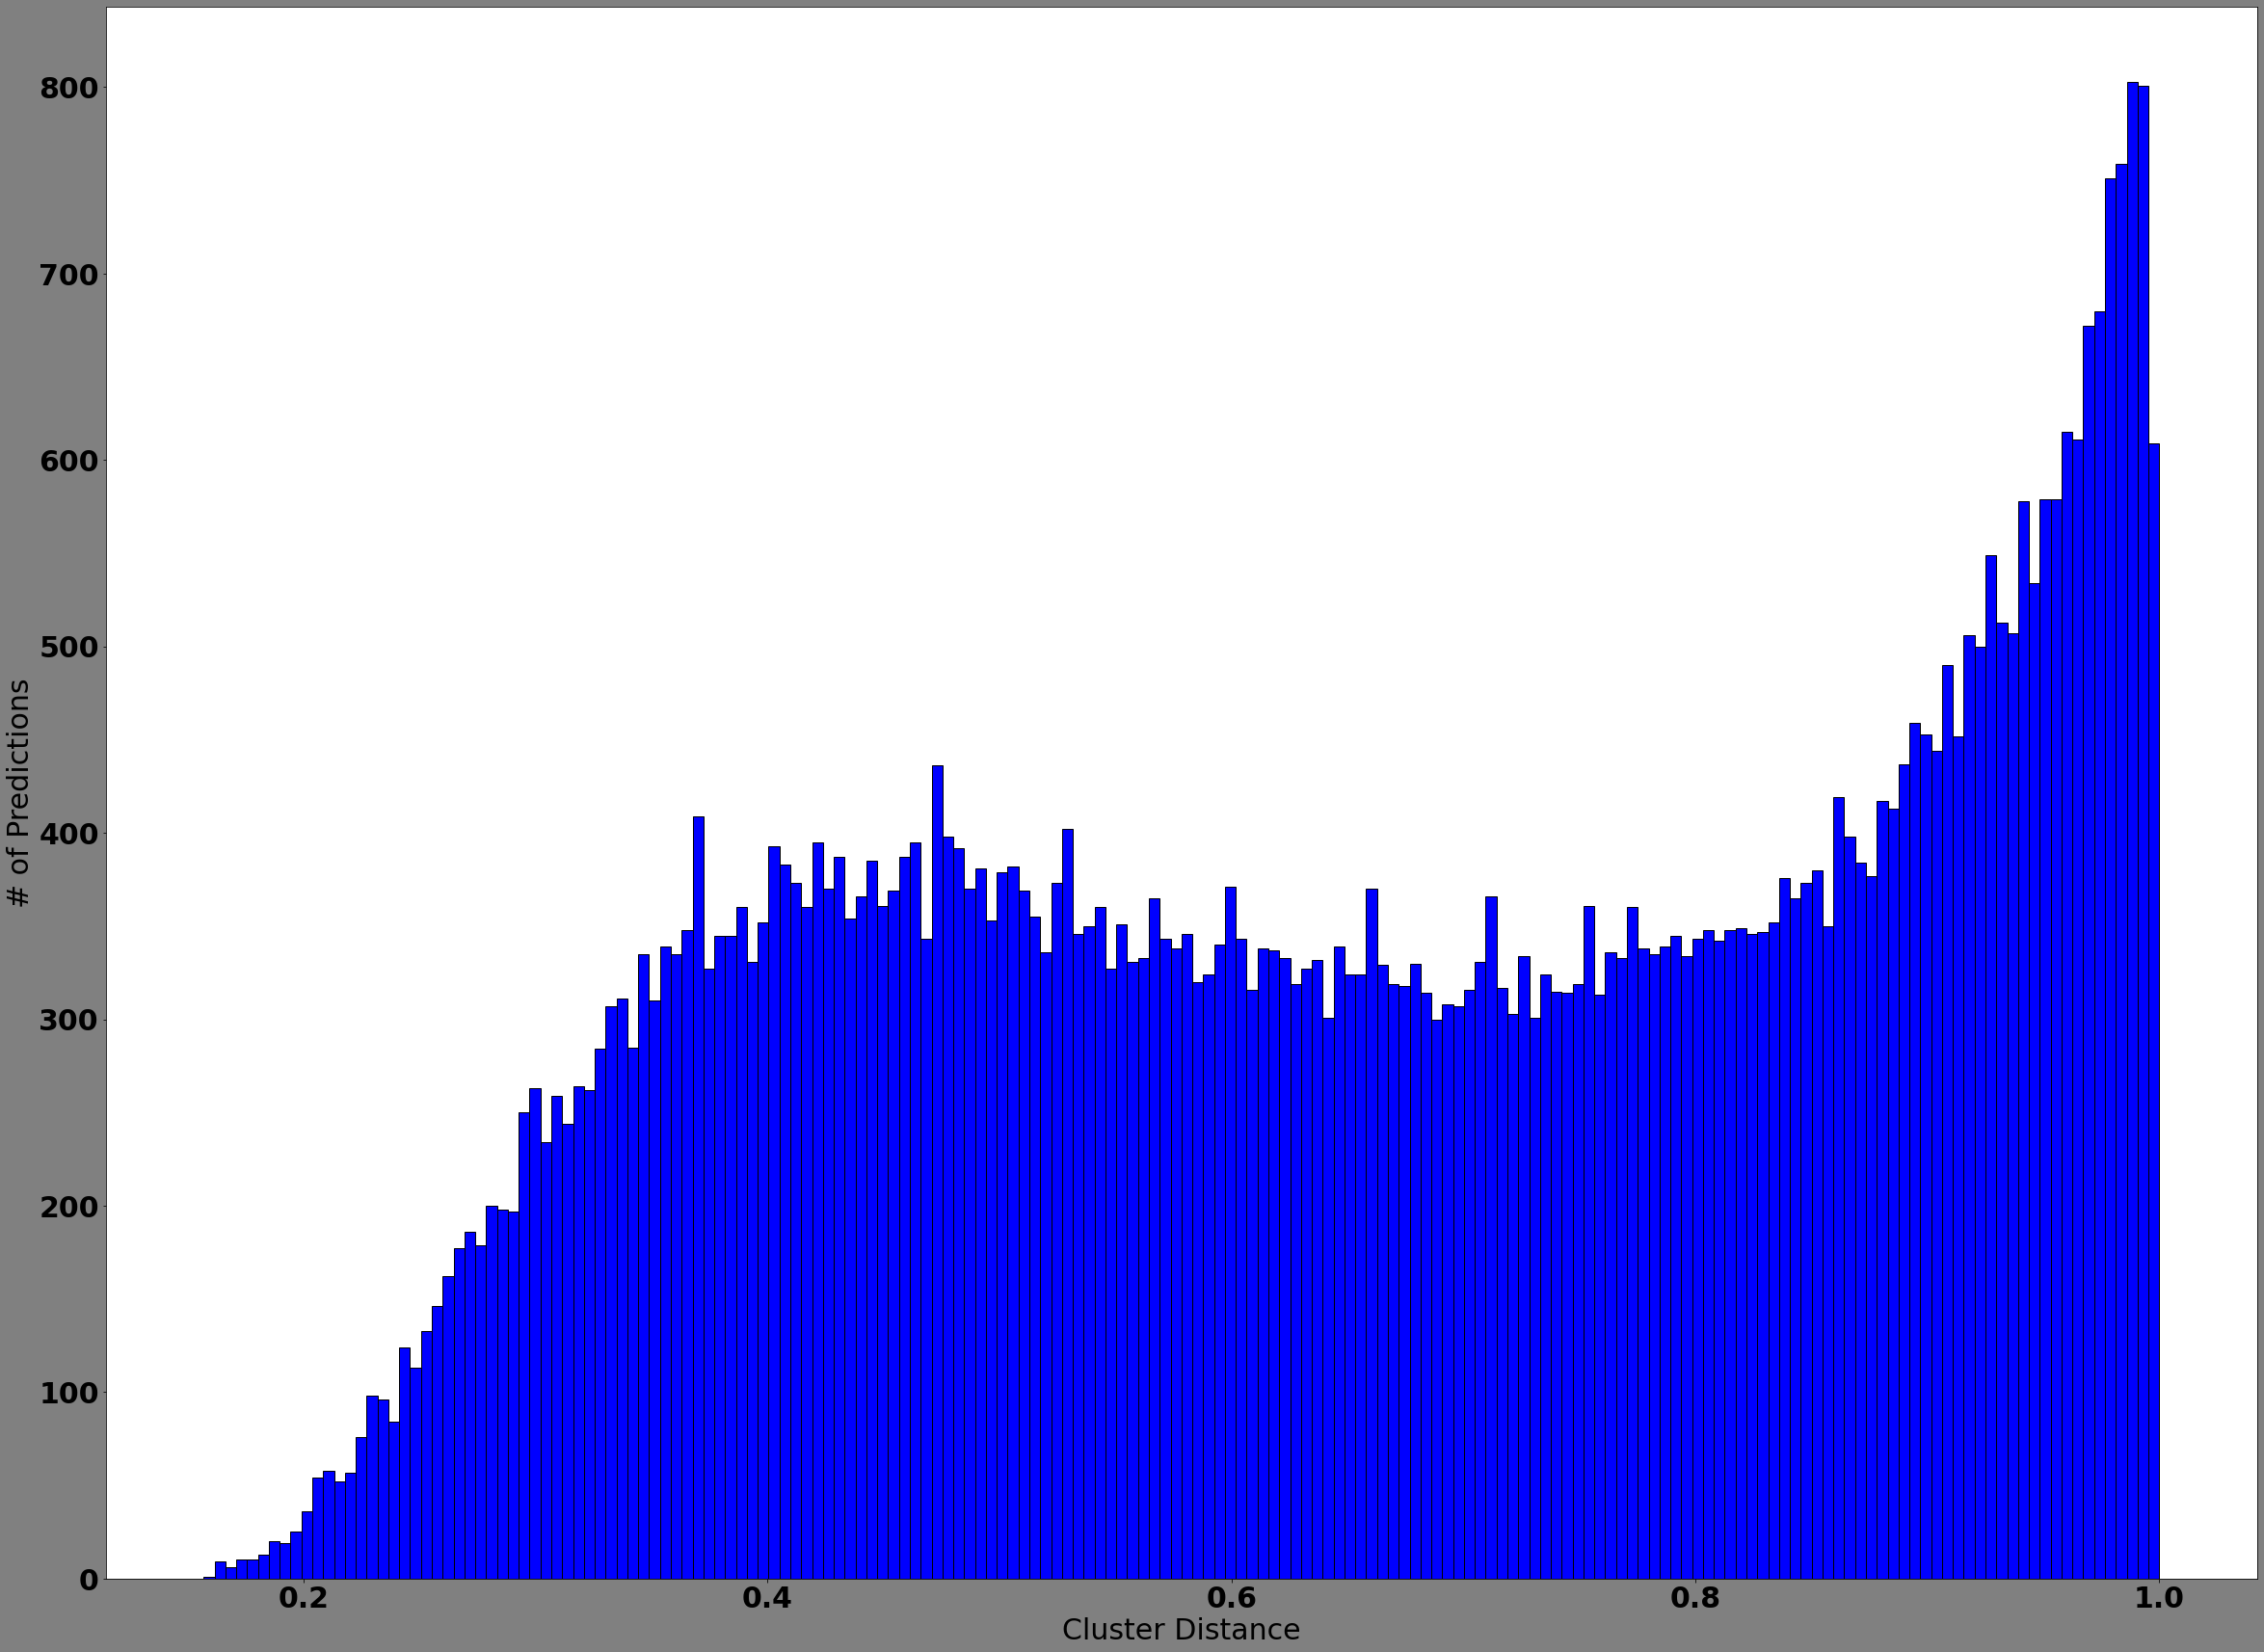

In [128]:
preds = model1.predict(fashtrainX, verbose = 1)
p = np.amax(preds, axis = 1)
title = "Confidence Values for fashion_mnist dataset"
plot_class_pdf(p, title)

Mean: 1.4713122844696045
Variance: 0.1328030228614807
Standard Deviation: 0.3644214868545532


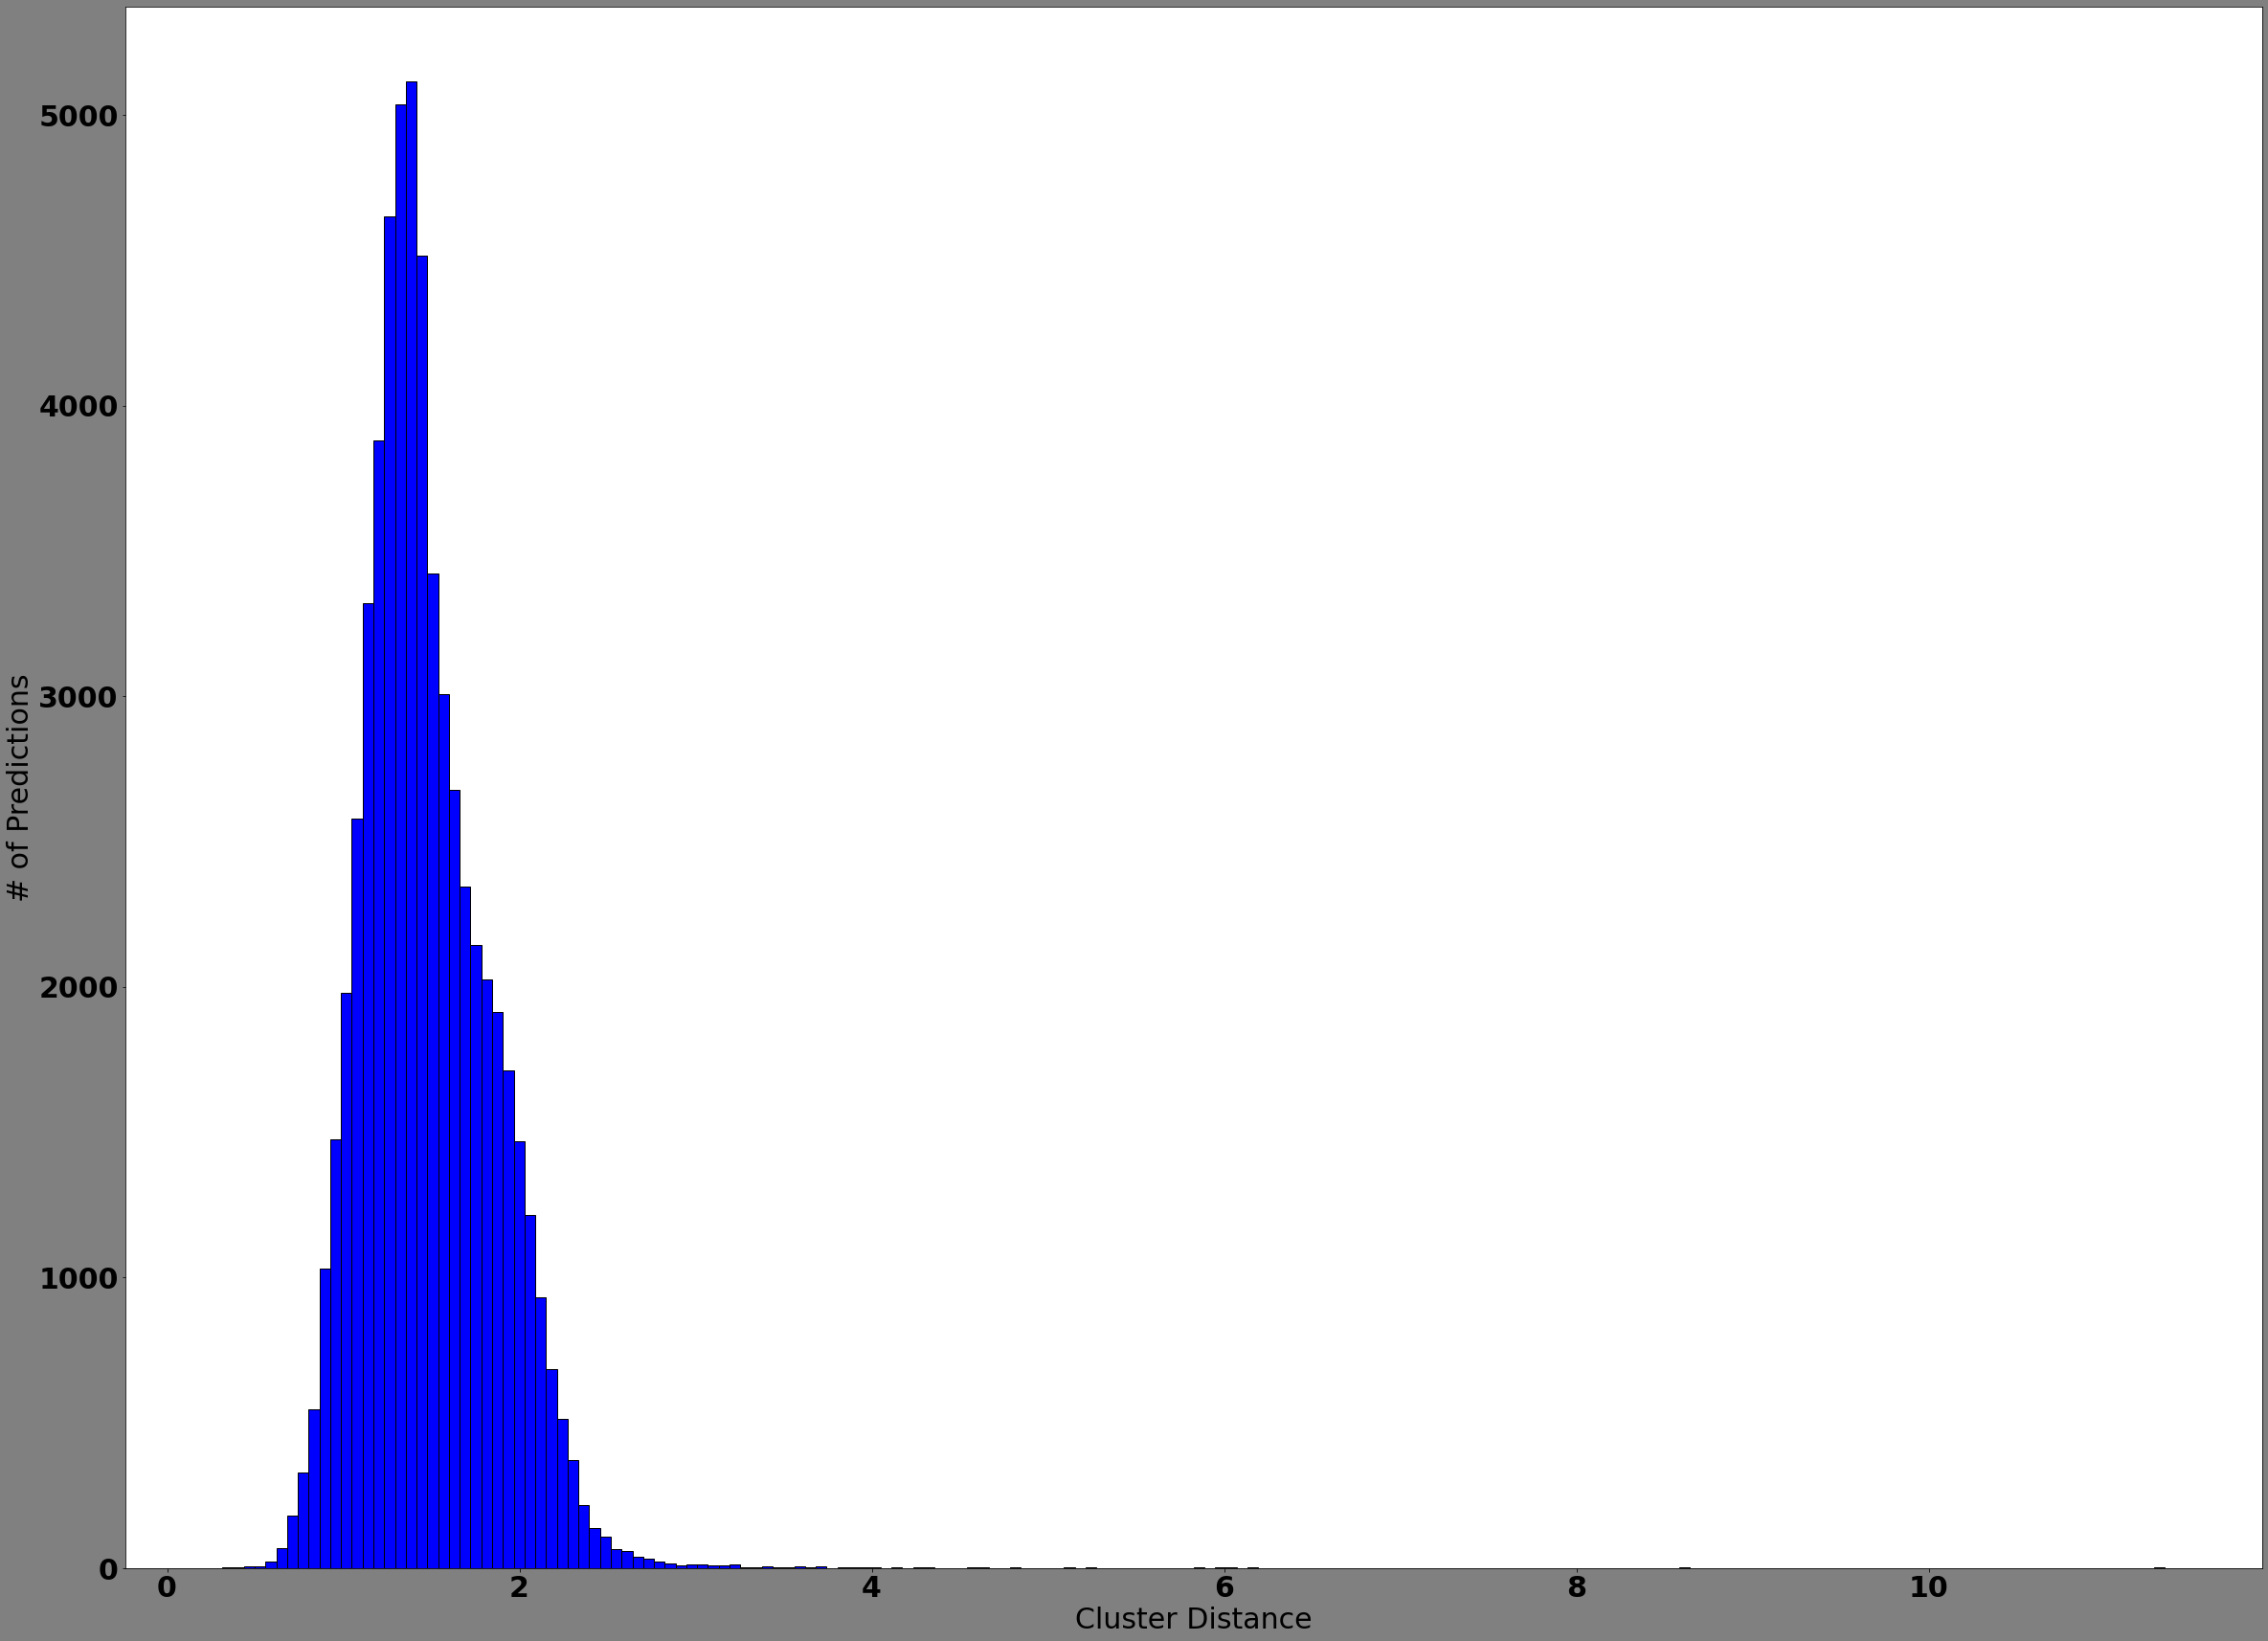

In [129]:
title = "Cluster distance for fashion_mnist Dataset"
plot_class_pdf(l, title)